# Comparing evaluation through detection and tracking metrics


#### Requirements
Firts you need to evaluate the outputs of the detectors and trackers with the commands:
```
python evaluation/mAP/main.py
python evaluation/scripts/run_mot_challenge.py --BENCHMARK <dataset_name> --USE_PARALLEL True --NUM_PARALLEL_CORES 4 --TRACKERS_TO_EVAL <tracker_name>
```

And generate a table with all the results. For that use the following command:
```
python evaluation/create_table.py
```

> You might need to use the `eval` environment to run the programs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from IPython.display import display, HTML
from scipy.spatial import distance

import auxiliar as aux
import analysis as anly

In [2]:
path = '../outputs/evaluation/'
file_name = 'all_metrics.csv'

tb = pd.read_csv(path + file_name, sep=",")

In [3]:
tb_20 = aux.select_dataset(tb, 'MOT20')
tb_17 = aux.select_dataset(tb, 'MOT17')
tb_vd = aux.select_dataset(tb, 'VisDrone2019-MOT-val')

In [4]:
tb_20 = aux.select_list(tb_20, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17 = aux.select_list(tb_17, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17 = aux.select_list(tb_17, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb = aux.select_list(tb, ['sort', 'deep_sort', 'sst', 'uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_20_sort      = aux.select_list(tb_20, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_deep_sort = aux.select_list(tb_20, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_sst       = aux.select_list(tb_20, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_20_uma       = aux.select_list(tb_20, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_17_sort      = aux.select_list(tb_17, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_deep_sort = aux.select_list(tb_17, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_sst       = aux.select_list(tb_17, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_17_uma       = aux.select_list(tb_17, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])

tb_vd_sort      = aux.select_list(tb_vd, ['sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_vd_deep_sort = aux.select_list(tb_vd, ['deep_sort'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_vd_sst       = aux.select_list(tb_vd, ['sst'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])
tb_vd_uma       = aux.select_list(tb_vd, ['uma'], ['gt', 'public', 'faster_rcnn', 'faster_rcnn-fine-tune', 'faster_rcnn-mod-1', 'faster_rcnn-mod-2', 'faster_rcnn-mod-3', 'faster_rcnn-mod-4'])


## Detectors evaluation

Basic evaluation information of the detectors used.

In [5]:
tb_20_sort.groupby('Detector').mean()

mAP   Precision      Recall         TP  \
Detector                                                               
faster_rcnn             50.014541   74.071830   53.425707  143924.00   
faster_rcnn-fine-tune   69.750049   80.669018   70.767616  179473.50   
faster_rcnn-mod-1       31.869323   75.665106   33.146615   97518.50   
faster_rcnn-mod-2       42.985582   87.967776   44.685280  122450.25   
faster_rcnn-mod-3       19.978839   76.247346   22.652875   47128.50   
faster_rcnn-mod-4        5.947220   99.567044    5.970576    8111.25   
gt                     100.000000  100.000000  100.000000  318609.75   
public                  52.575443   99.300485   52.837978  164085.00   

                             FP  GT detections         FN   HOTA(0)   LocA(0)  \
Detector                                                                        
faster_rcnn            33218.00      318609.75  174685.75  0.385168  0.669104   
faster_rcnn-fine-tune  23403.00      318609.75  139136.25  0.400142  0.780929   
faster_rcnn-mod-1      23601.50      318609.75  221091.25  0.205523  0.683618   
faster_rcnn-mod-2      13676.50      318609.75  196159.50  0.349791  0.709164   
faster_rcnn-mod-3      12696.50      318609.75  271481.25  0.130403  0.744163   
faster_rcnn-mod-4         58.75      318609.75  310498.50  0.078393  0.807986   
gt                         0.00      318609.75       0.00  0.994169  0.979074   
public                  1200.75      318609.75  154524.75  0.400296  0.886560   

                       HOTALocA(0)  ...      Nd      Nt      Id      It  \
Detector                            ...                                   
faster_rcnn               0.255475  ...  0.7200  0.6125  0.5950  0.6500   
faster_rcnn-fine-tune     0.311026  ...  0.6525  0.6875  0.7675  0.7600   
faster_rcnn-mod-1         0.140219  ...  0.4575  0.3225  0.6025  0.6625   
faster_rcnn-mod-2         0.248094  ...  0.5250  0.4475  0.6750  0.7050   
faster_rcnn-mod-3         0.097205  ...  0.3250  0.2075  0.6225  0.7200   
faster_rcnn-mod-4         0.064383  ...  0.0650  0.0450  0.8225  0.8425   
gt                        0.973365  ...  1.0000  0.9975  1.0000  0.9800   
public                    0.355866  ...  0.5425  0.4925  0.8875  0.8950   

                       Einter    Id.1    It.1       Y       C  IDSW_score  
Detector                                                                   
faster_rcnn            0.7650  0.7800  0.8800  0.1000  0.7275      0.9250  
faster_rcnn-fine-tune  0.7775  0.8000  0.8850  0.0850  0.7875      0.9000  
faster_rcnn-mod-1      0.5475  0.7500  0.8700  0.1175  0.4650      0.9250  
faster_rcnn-mod-2      0.6425  0.8350  0.8975  0.0625  0.5975      0.9650  
faster_rcnn-mod-3      0.3600  0.7825  0.8700  0.0875  0.3125      0.8700  
faster_rcnn-mod-4      0.1350  0.8850  0.9400  0.0525  0.0850      0.9650  
gt                     0.9975  0.9500  0.9500  0.0000  0.9975      1.0000  
public                 0.6675  0.8950  0.9250  0.0325  0.6525      0.9775  

[8 rows x 303 columns]

In [6]:
tb_17_sort.groupby('Detector').mean()

mAP   Precision      Recall            TP  \
Detector                                                                  
faster_rcnn             60.607164   32.746377   68.942208  13500.571429   
faster_rcnn-fine-tune   75.201363   32.880830   81.686811  16220.000000   
faster_rcnn-mod-1       41.869426   32.969989   45.718327   9098.142857   
faster_rcnn-mod-2       55.669865   66.893877   59.354641  11186.571429   
faster_rcnn-mod-3       42.699252   57.271248   49.243894   8374.285714   
faster_rcnn-mod-4       30.366657   96.685175   30.940537   4454.142857   
gt                     100.000000  100.000000  100.000000  20997.000000   
public                  47.279869   93.470599   47.465455   9127.857143   

                                 FP  GT detections            FN   HOTA(0)  \
Detector                                                                     
faster_rcnn            23330.000000        20997.0   7496.428571  0.412000   
faster_rcnn-fine-tune  28605.428571        20997.0   4777.000000  0.368528   
faster_rcnn-mod-1      15197.428571        20997.0  11898.857143  0.322796   
faster_rcnn-mod-2       4731.857143        20997.0   9810.428571  0.498595   
faster_rcnn-mod-3       5522.285714        20997.0  12622.714286  0.233249   
faster_rcnn-mod-4        173.142857        20997.0  16542.857143  0.328937   
gt                         0.000000        20997.0      0.000000  0.908861   
public                   534.857143        20997.0  11869.142857  0.485636   

                        LocA(0)  HOTALocA(0)  ...        Nd        Nt  \
Detector                                      ...                       
faster_rcnn            0.672423     0.279810  ...  0.505714  0.737143   
faster_rcnn-fine-tune  0.698508     0.260136  ...  0.387143  0.564286   
faster_rcnn-mod-1      0.658551     0.212962  ...  0.582857  0.700000   
faster_rcnn-mod-2      0.730611     0.365981  ...  0.772857  0.691429   
faster_rcnn-mod-3      0.743157     0.173181  ...  0.668571  0.537143   
faster_rcnn-mod-4      0.813453     0.268191  ...  0.338571  0.297143   
gt                     0.949629     0.863610  ...  1.000000  0.978571   
public                 0.857514     0.416808  ...  0.517143  0.462857   

                             Id        It    Einter      Id.1      It.1  \
Detector                                                                  
faster_rcnn            0.597143  0.564286  0.802857  0.645714  0.784286   
faster_rcnn-fine-tune  0.697143  0.667143  0.720000  0.630000  0.760000   
faster_rcnn-mod-1      0.465714  0.468571  0.755714  0.637143  0.797143   
faster_rcnn-mod-2      0.611429  0.661429  0.811429  0.778571  0.854286   
faster_rcnn-mod-3      0.592857  0.688571  0.587143  0.761429  0.838571   
faster_rcnn-mod-4      0.824286  0.830000  0.430000  0.874286  0.901429   
gt                     1.000000  0.952857  0.982857  0.882857  0.890000   
public                 0.838571  0.860000  0.622857  0.852857  0.881429   

                              Y         C  IDSW_score  
Detector                                               
faster_rcnn            0.138571  0.844286    0.792857  
faster_rcnn-fine-tune  0.130000  0.720000    0.825714  
faster_rcnn-mod-1      0.161429  0.795714    0.750000  
faster_rcnn-mod-2      0.077143  0.787143    0.932857  
faster_rcnn-mod-3      0.075714  0.641429    0.807143  
faster_rcnn-mod-4      0.025714  0.412857    0.981429  
gt                     0.004286  0.978571    1.000000  
public                 0.028571  0.604286    0.981429  

[8 rows x 303 columns]

## Comparing detector and tracker outputs

Each detector and tracker applies different and various techniques to do their work. In this section we study the associative between trackers ussing different detectors outputs and the same ones.

In [7]:
aux.search(tb, 'uma', 'gt')

Tracker Detector          Dataset name              Set id         mAP  \
98      uma       gt                 MOT17            MOT17-02  100.000000   
99      uma       gt                 MOT17            MOT17-04  100.000000   
100     uma       gt                 MOT17            MOT17-05  100.000000   
101     uma       gt                 MOT17            MOT17-09  100.000000   
102     uma       gt                 MOT17            MOT17-10  100.000000   
103     uma       gt                 MOT17            MOT17-11  100.000000   
104     uma       gt                 MOT17            MOT17-13  100.000000   
280     uma       gt                 MOT20            MOT20-01  100.000000   
281     uma       gt                 MOT20            MOT20-02  100.000000   
282     uma       gt                 MOT20            MOT20-03  100.000000   
283     uma       gt                 MOT20            MOT20-05  100.000000   
429     uma       gt  VisDrone2019-MOT-val  uav0000086_00000_v    6.483713   
430     uma       gt  VisDrone2019-MOT-val  uav0000117_02622_v    0.528811   
431     uma       gt  VisDrone2019-MOT-val  uav0000137_00458_v    1.771001   
432     uma       gt  VisDrone2019-MOT-val  uav0000182_00000_v    2.448334   
433     uma       gt  VisDrone2019-MOT-val  uav0000268_05773_v   21.579025   
434     uma       gt  VisDrone2019-MOT-val  uav0000305_00000_v    3.714681   
435     uma       gt  VisDrone2019-MOT-val  uav0000339_00001_v    2.090301   

     Precision      Recall      TP  FP  GT detections  ...   Nd    Nt   Id  \
98       100.0  100.000000   26960   0          26960  ...  1.0  0.95  1.0   
99       100.0  100.000000   66005   0          66005  ...  1.0  0.94  1.0   
100      100.0  100.000000    7754   0           7754  ...  1.0  0.93  1.0   
101      100.0  100.000000    5839   0           5839  ...  1.0  0.94  1.0   
102      100.0  100.000000   14240   0          14240  ...  1.0  0.97  1.0   
103      100.0  100.000000    9518   0           9518  ...  1.0  0.96  1.0   
104      100.0  100.000000   16663   0          16663  ...  1.0  0.96  1.0   
280      100.0  100.000000   22444   0          22444  ...  1.0  0.98  1.0   
281      100.0  100.000000  169891   0         169891  ...  1.0  0.98  1.0   
282      100.0  100.000000  337404   0         337404  ...  1.0  0.98  1.0   
283      100.0  100.000000  744700   0         744700  ...  1.0  0.98  1.0   
429      100.0    6.483713    1453   0          22410  ...  1.0  0.97  1.0   
430      100.0    0.528811      87   0          16452  ...  1.0  0.95  1.0   
431      100.0    1.771001     374   0          21118  ...  1.0  0.96  1.0   
432      100.0    2.448334     263   0          10742  ...  1.0  0.96  1.0   
433      100.0   21.579025    2930   0          13578  ...  1.0  0.91  1.0   
434      100.0    3.714681     188   0           5061  ...  1.0  0.93  1.0   
435      100.0    2.090301     225   0          10764  ...  1.0  0.93  1.0   

       It  Einter  Id.1  It.1     Y     C  IDSW_score  
98   0.86    0.88  0.97  0.92 -0.05  0.97        0.95  
99   0.90    0.96  0.98  0.97 -0.01  0.97        1.00  
100  0.87    0.90  0.85  0.84 -0.02  0.96        0.95  
101  0.87    0.91  0.93  0.91 -0.02  0.97        0.96  
102  0.86    0.96  0.83  0.82 -0.01  0.98        0.98  
103  0.86    0.95  0.91  0.89 -0.01  0.98        0.99  
104  0.86    0.96  0.71  0.71 -0.00  0.98        0.99  
280  0.87    0.96  0.94  0.93 -0.01  0.99        0.98  
281  0.87    0.96  0.95  0.94 -0.02  0.99        0.98  
282  0.86    0.97  0.95  0.94 -0.01  0.99        0.99  
283  0.86    0.97  0.96  0.95 -0.02  0.99        0.99  
429  0.83    0.97  0.90  0.89 -0.01  0.99        0.99  
430  0.84    0.95  0.78  0.78 -0.00  0.97        0.98  
431  0.87    0.95  0.76  0.76  0.00  0.98        0.96  
432  0.85    0.96  0.80  0.79 -0.01  0.98        0.99  
433  0.82    0.90  0.81  0.81  0.00  0.97        0.92  
434  0.89    0.92  0.77  0.78  0.02  0.96        0.93  
435  0.84    0.94  0.73  0.73 

## Comparing metrics

Metrics are used to score detectors and trackers, while deciding which ones perform better in the given scenarios. In this section we want to study the correlation between metrics and see if there is any case where the metrics are similar.

As we can see in the matrix of results there are some interesting results we want to discuss.

In detection metrics, *mAP* and *Recall* are high correlated.
 - precision and recall mostly opposite.
 - Precision and FP are opposite -> following the precision formula it has sense.
 - Recall and mAP are opposite of FN -> With the formula it has sense.
 
Tracking metrics:
 - HOTA and IDF1 are very similar. ATA is also similar to both.
 - MOTP is more similar to ATA than to MOTA.
 - MOTA is the opposite of IDSW -> ????

Mixed:
 - IDSW is similar to FP.
 - HOTA has a direct relation with mAP.
 - MOTA has a direct relation with Precision.

# Correlation matix wil ALL

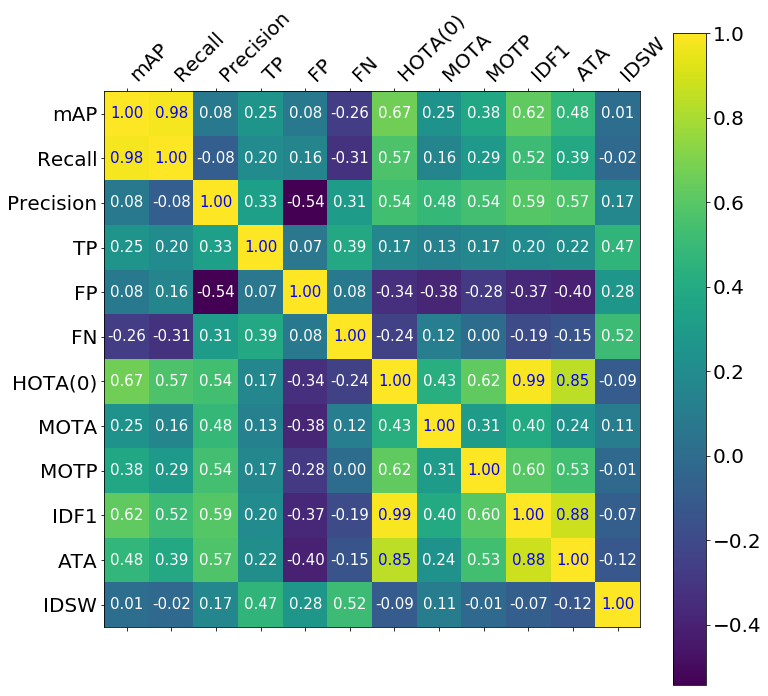

In [8]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix.png')

# MOT17

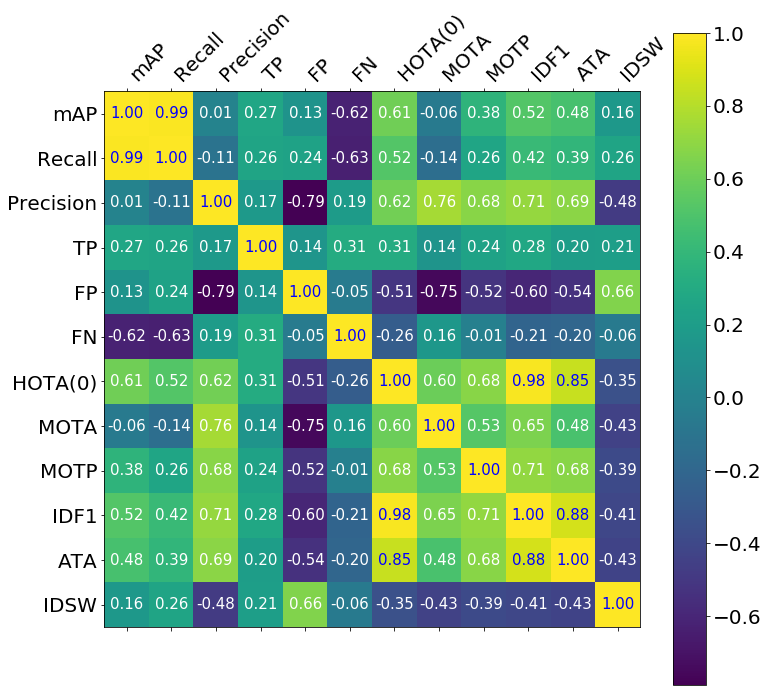

In [9]:
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT17.png')

### Matrix for each tracker (MOT17)

SORT


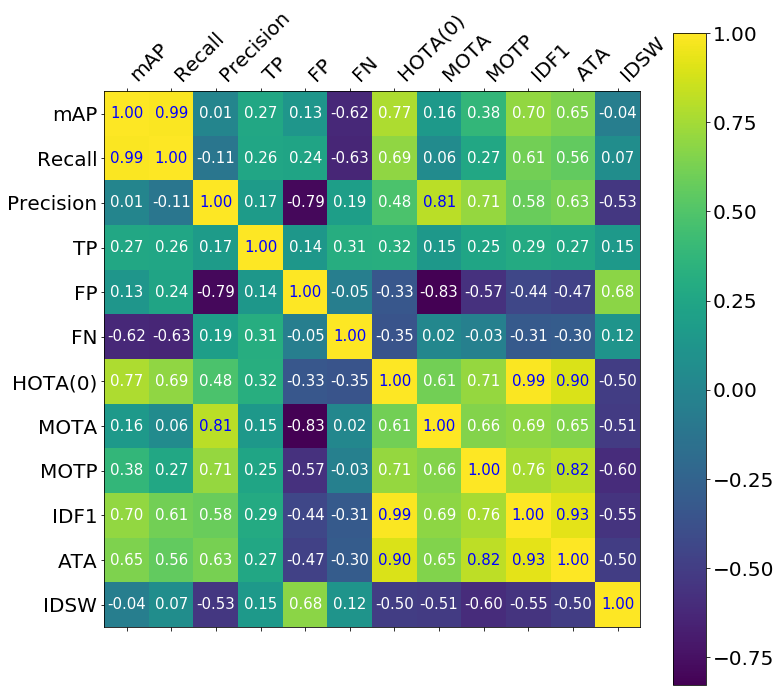

DEEP_SORT


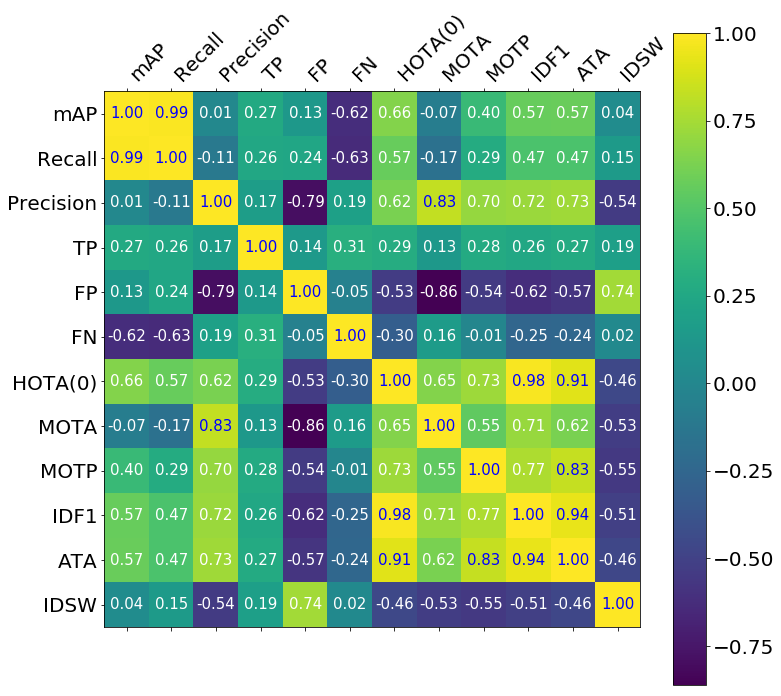

SST


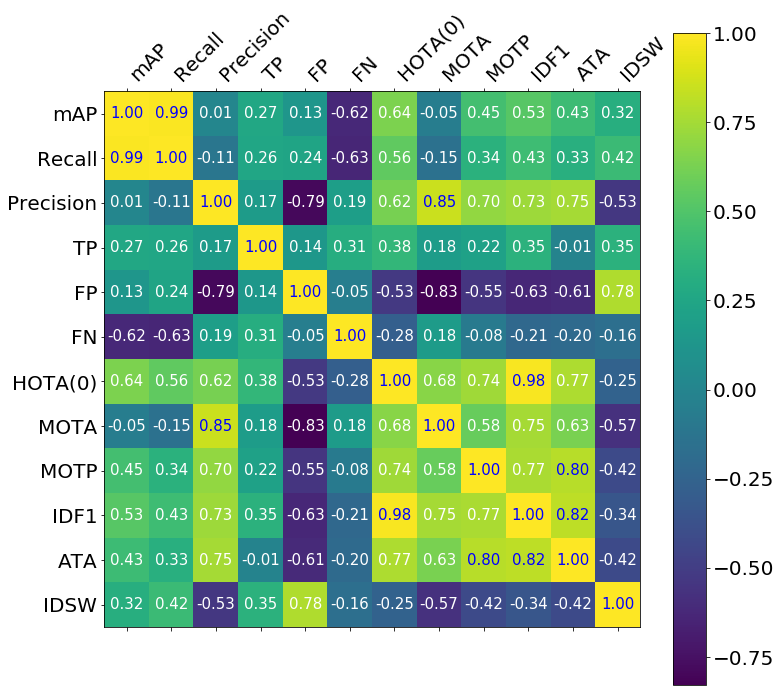

UMA


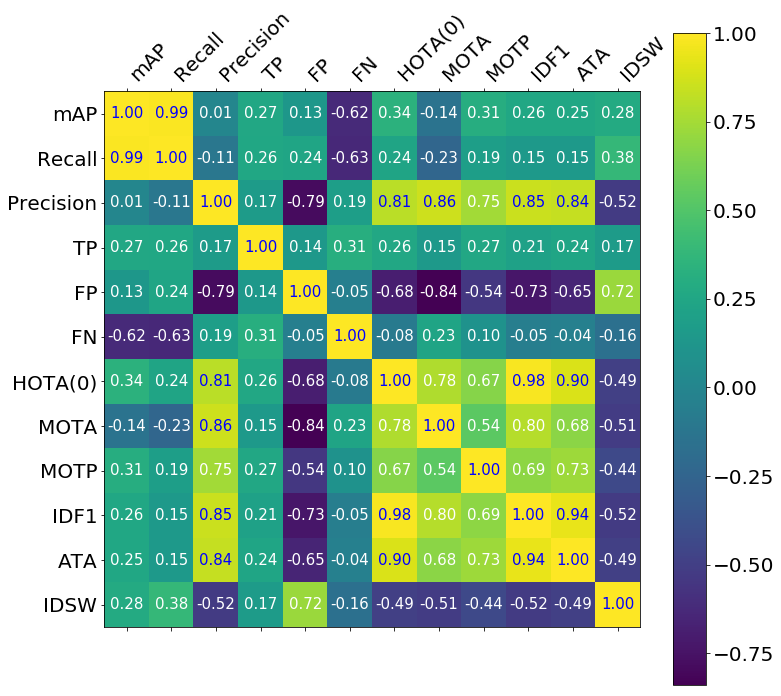

In [10]:
for trk in tb_17['Tracker'].unique():
    
    tb_search = aux.search(tb_17, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT17_' + trk + '.png')

# MOT20

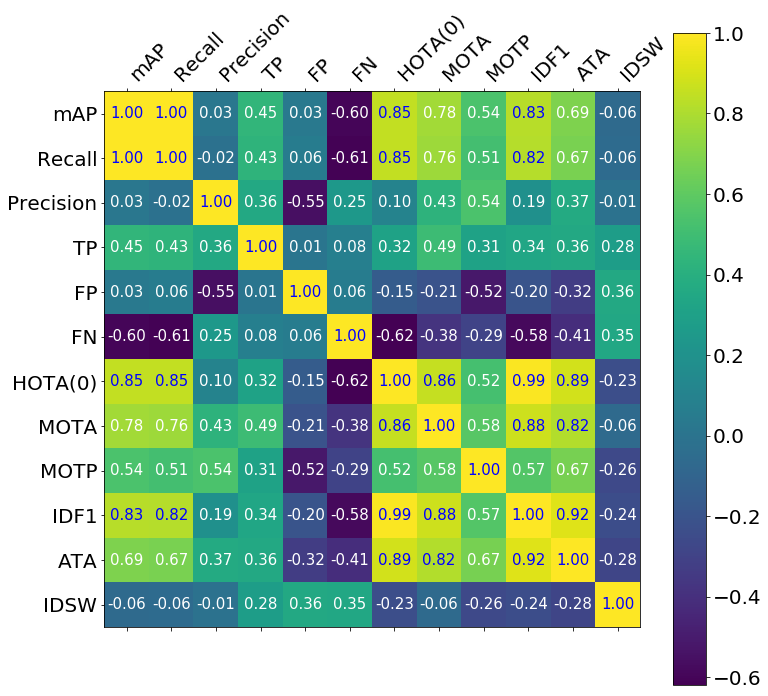

In [11]:
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT20.png')

### Matrix for each tracker (MOT20)

SORT


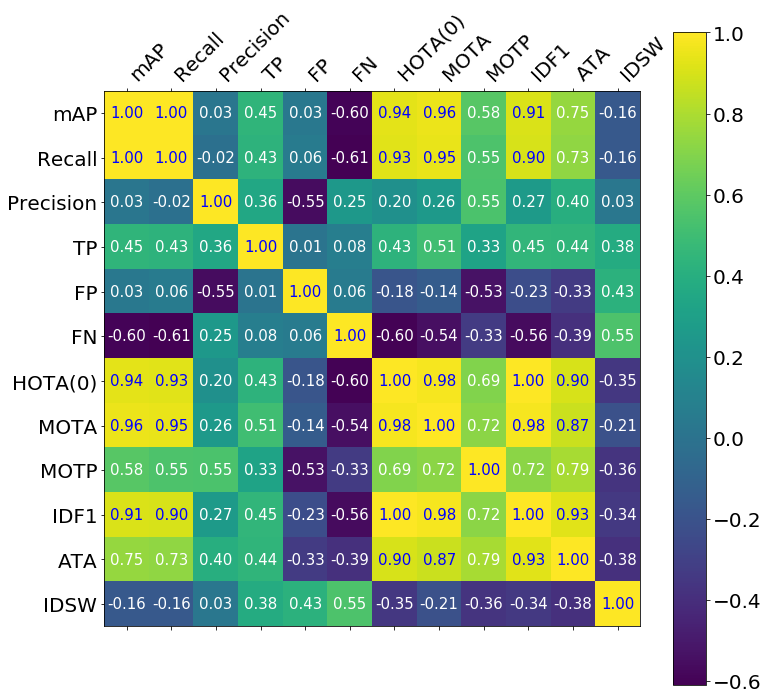

DEEP_SORT


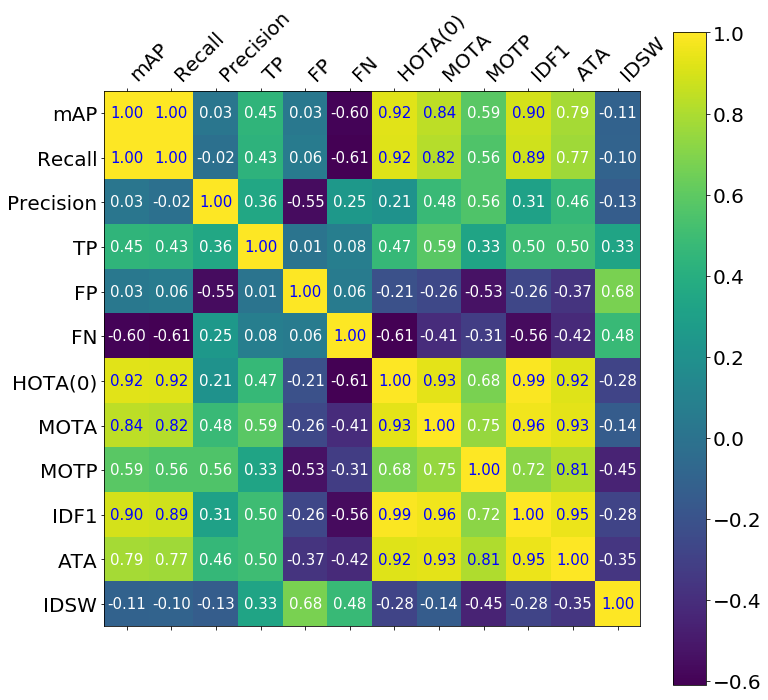

SST


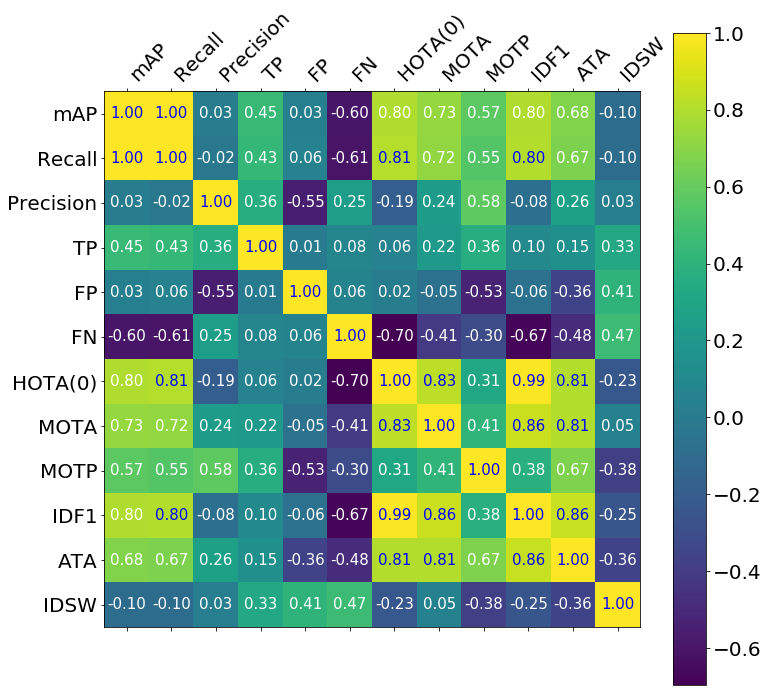

UMA


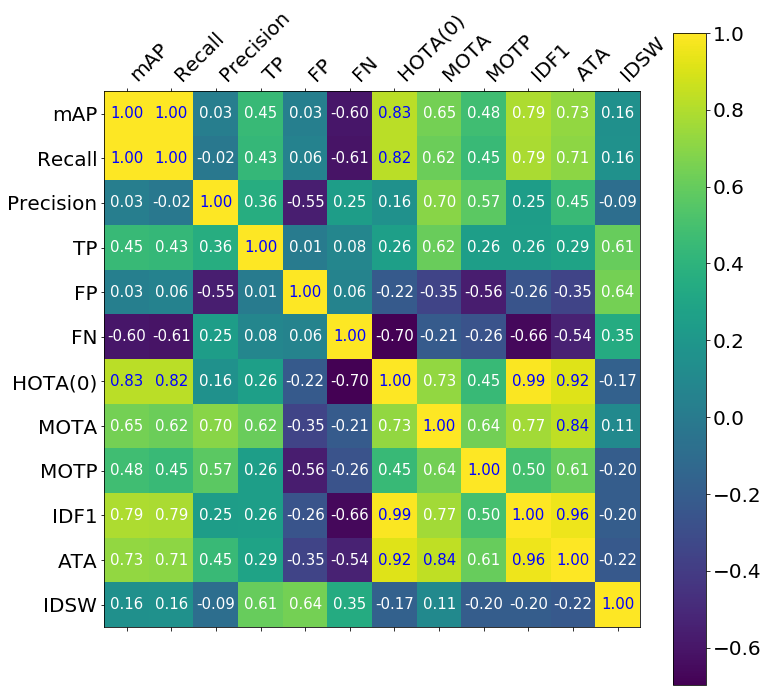

In [12]:
for trk in tb_20['Tracker'].unique():
    
    tb_search = aux.search(tb_20, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_MOT20_' + trk + '.png')

# VisDrone - val

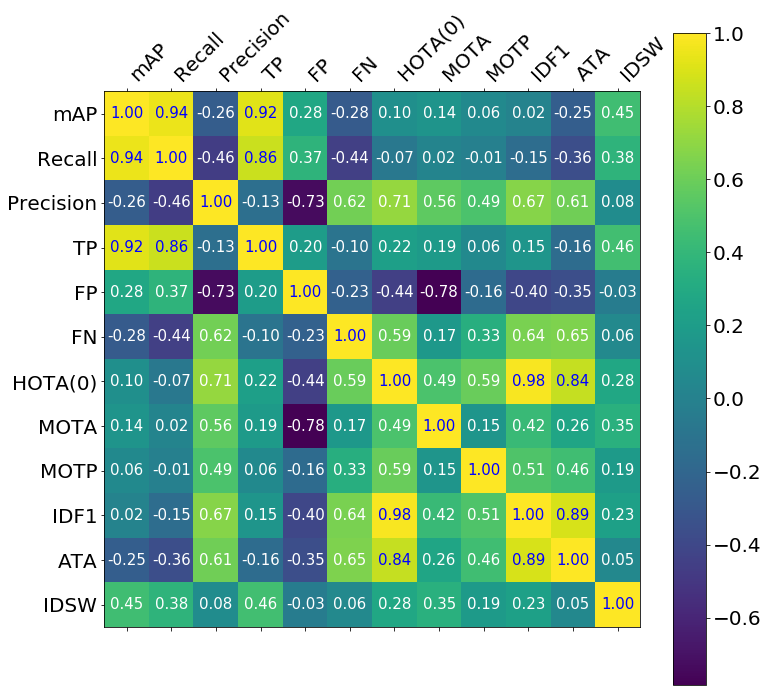

In [13]:
result_m = aux.correlation_metrics(tb_vd, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_VisDrone-val.png')

DEEP_SORT


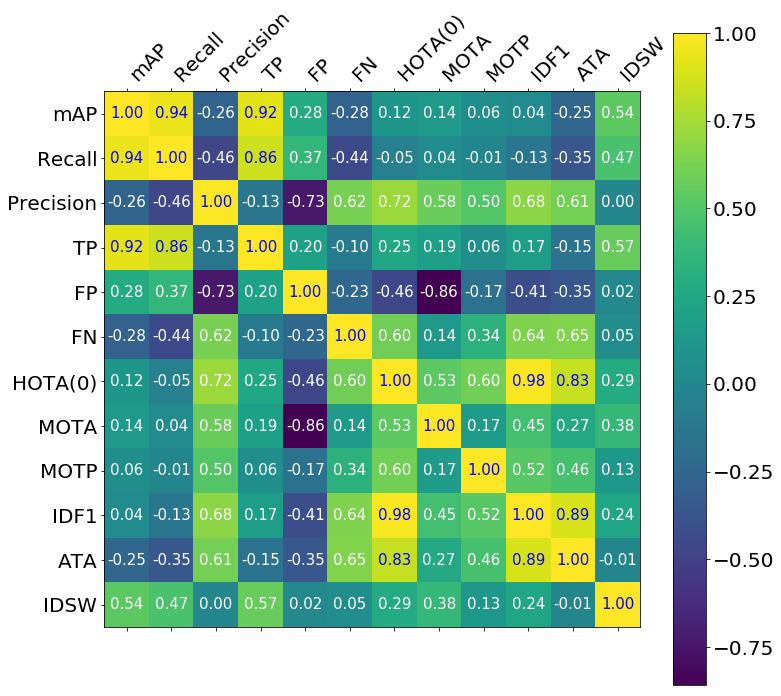

UMA


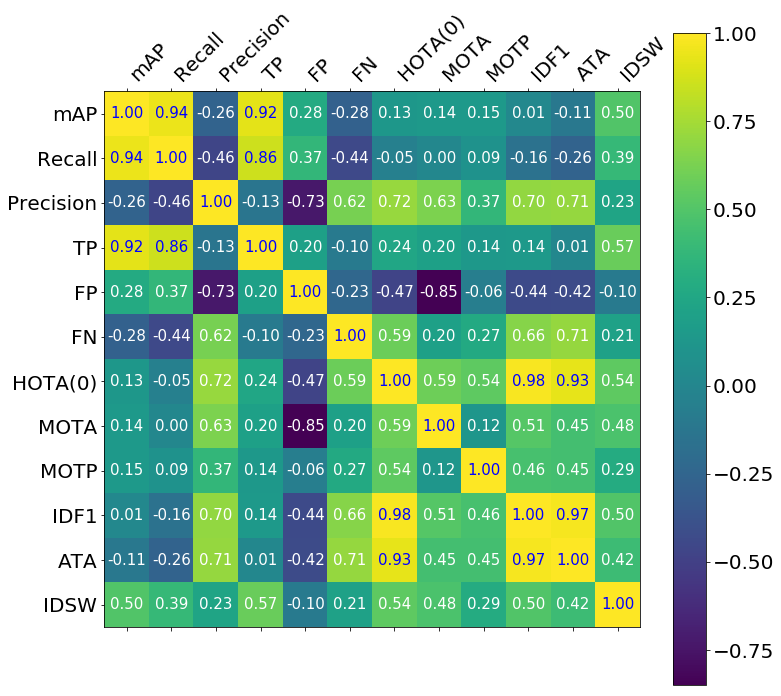

SST


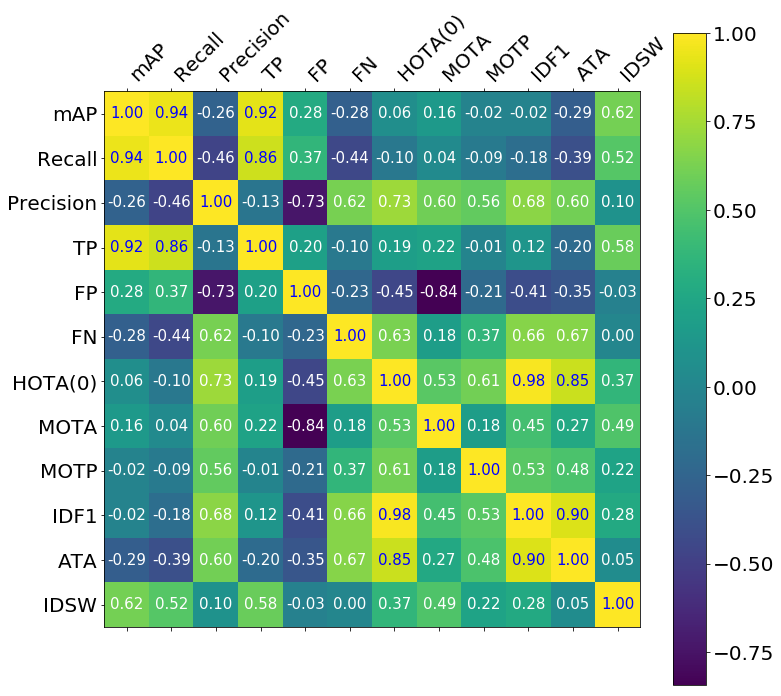

SORT


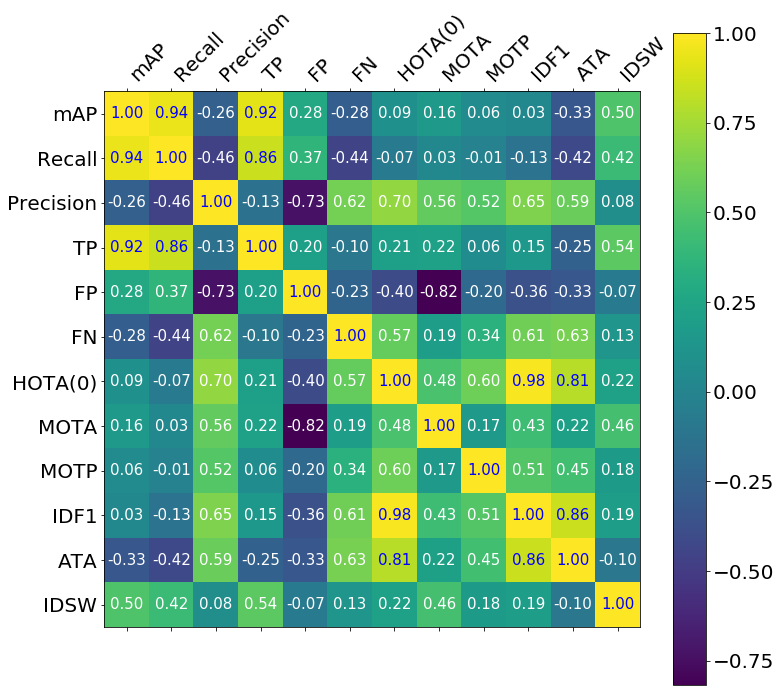

In [14]:
for trk in tb_vd['Tracker'].unique():
    
    tb_search = aux.search(tb_vd, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_VisDrone-val_' + trk + '.png')

# New metric experiments

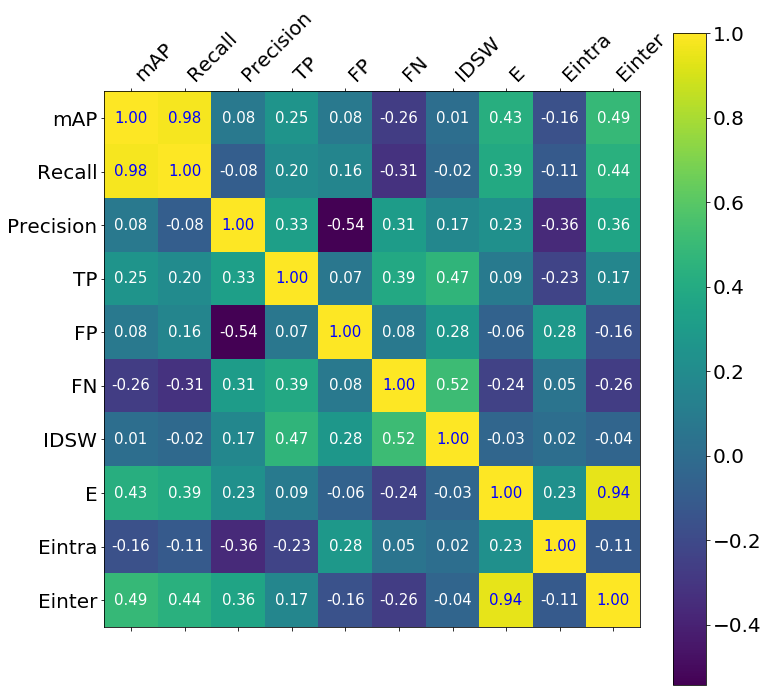

In [15]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'E', 'Eintra', 'Einter']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_1.png')

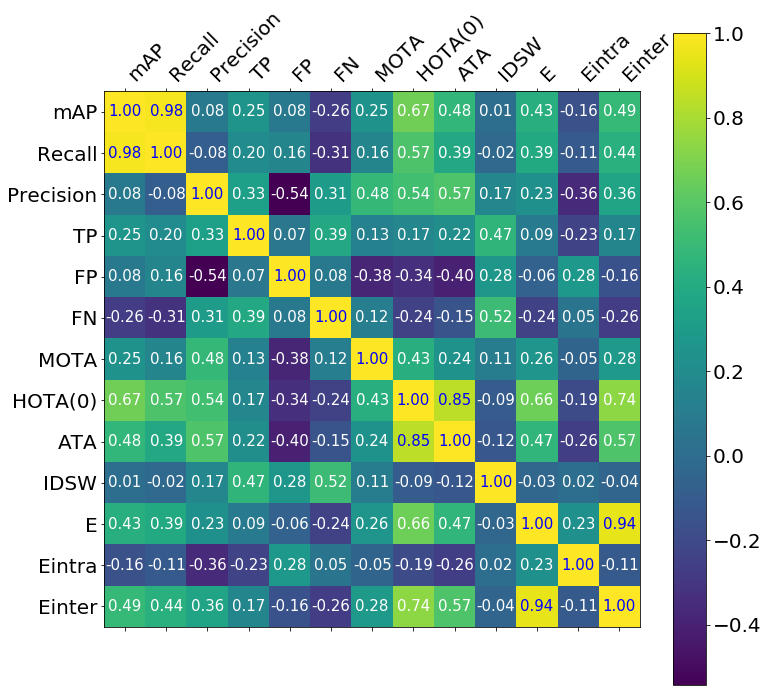

In [16]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_E.png')

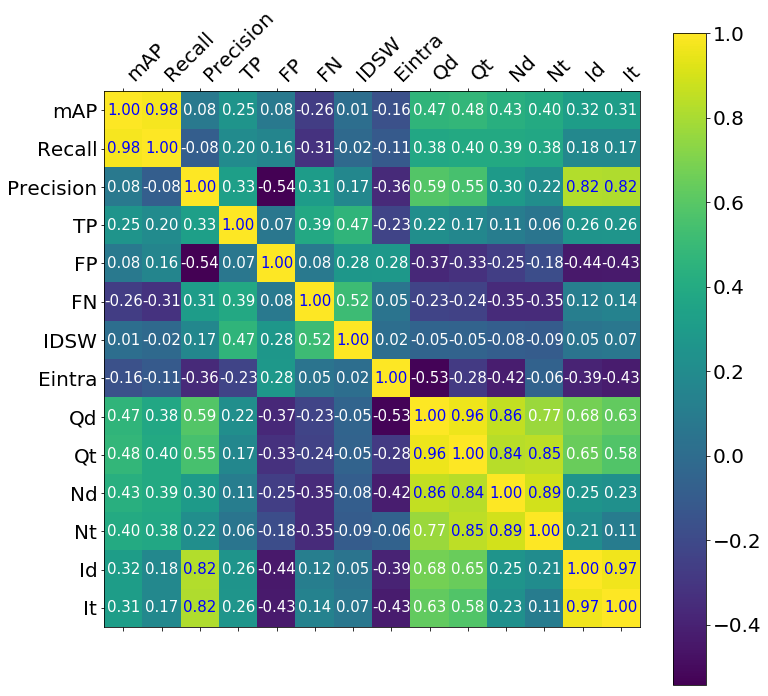

In [17]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'IDSW', 'Eintra', 'Qd', 'Qt', 'Nd', 'Nt', 'Id', 'It']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_Eintra.png')

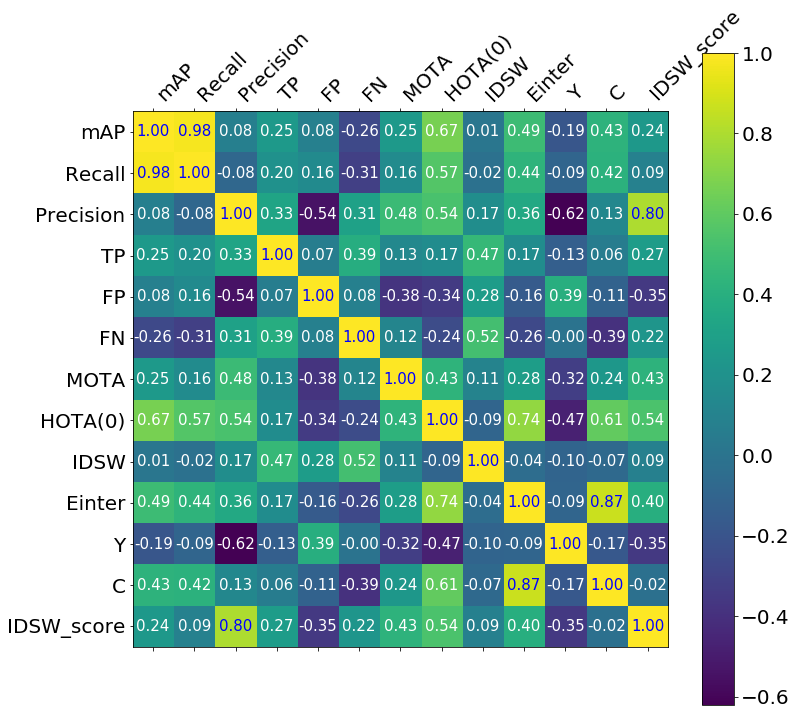

In [18]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)','IDSW', 'Einter', 'Y', 'C', 'IDSW_score']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_Einter.png')

In [19]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']

## MOT17

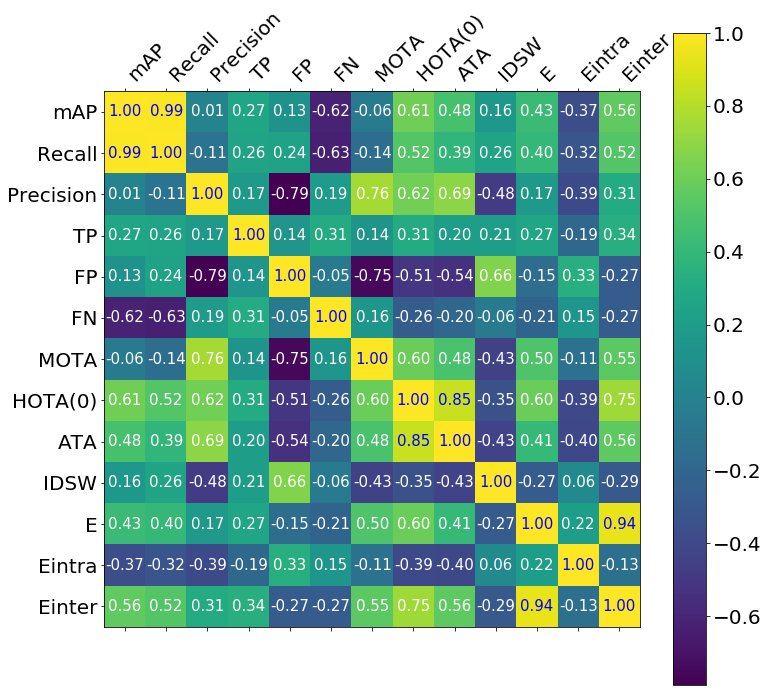

In [20]:
result_m = aux.correlation_metrics(tb_17, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT17.png')

SORT


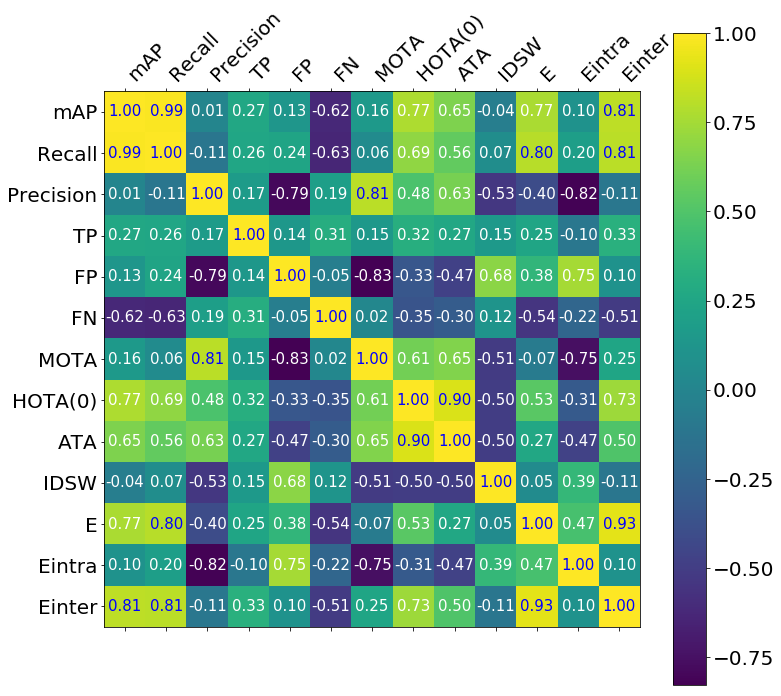

DEEP_SORT


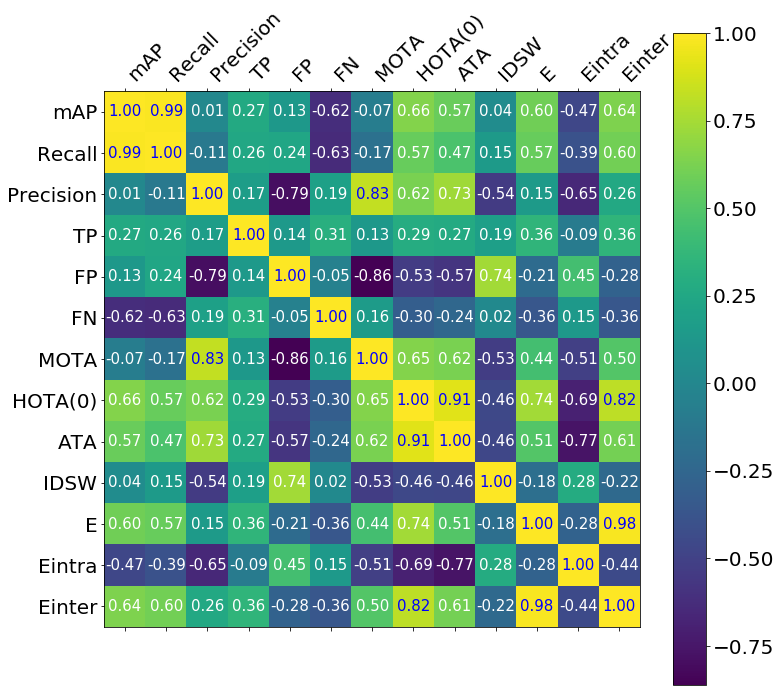

SST


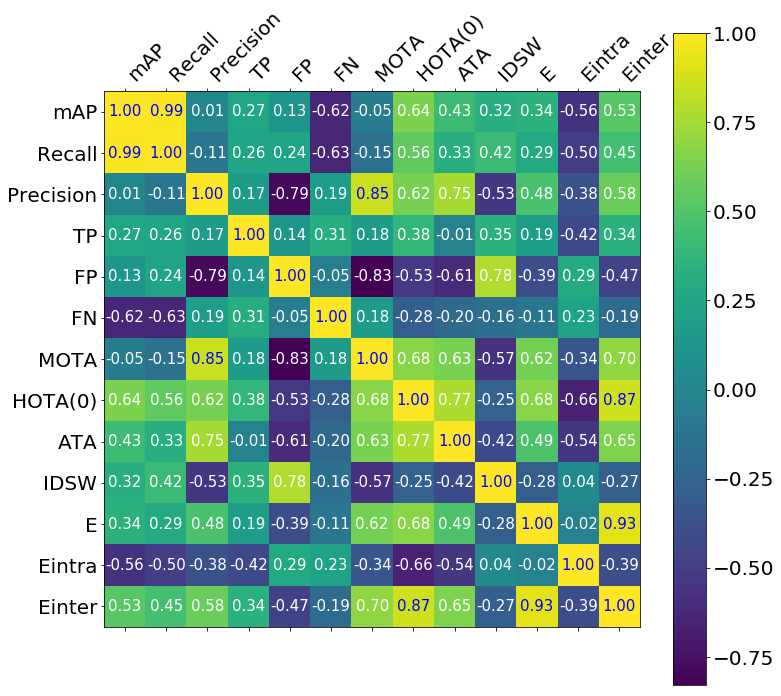

UMA


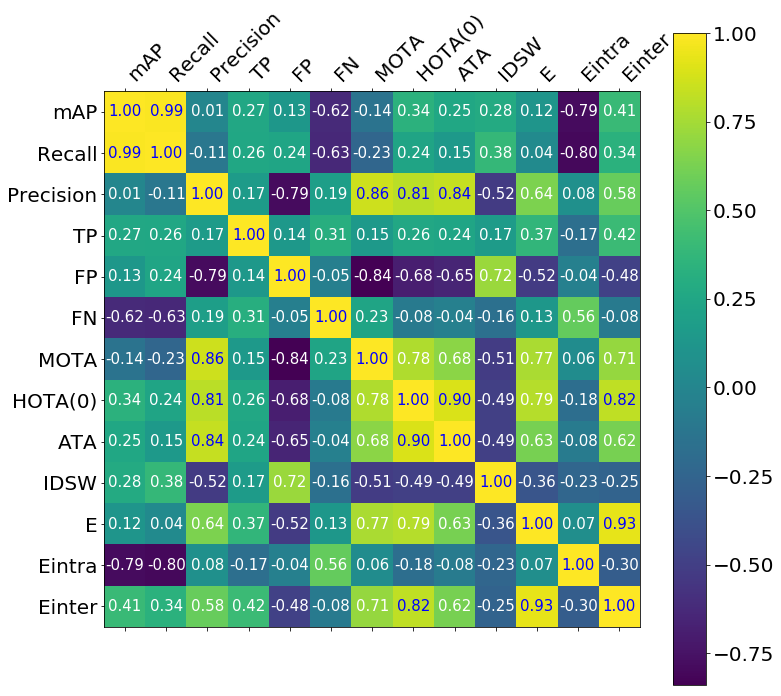

In [21]:
for trk in tb_17['Tracker'].unique():
    
    tb_search = aux.search(tb_17, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT17_' + trk + '.png')

## MOT20

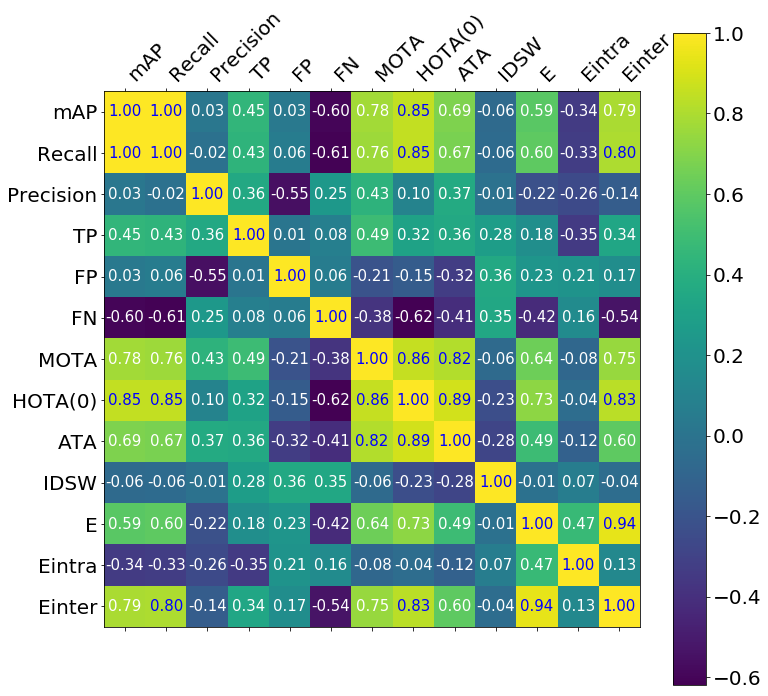

In [22]:
result_m = aux.correlation_metrics(tb_20, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT20.png')

SORT


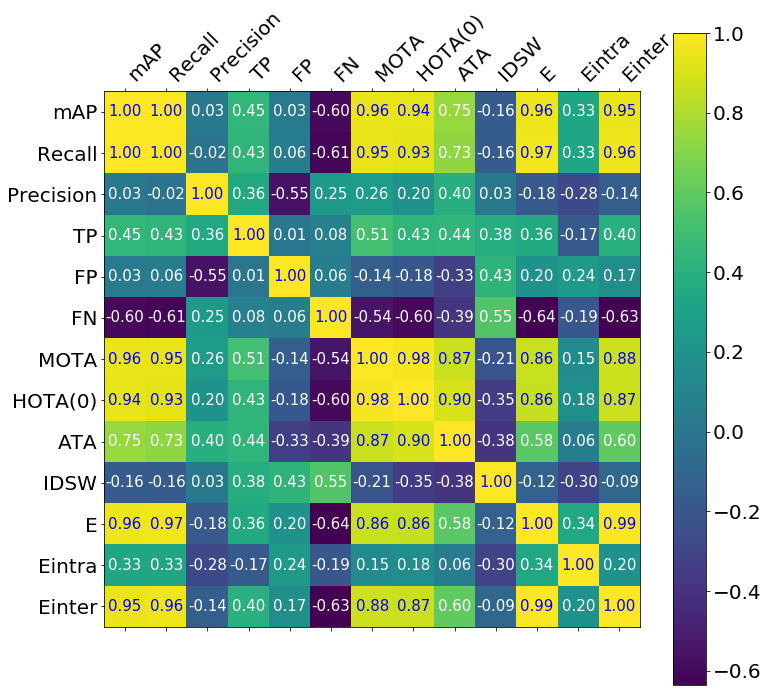

DEEP_SORT


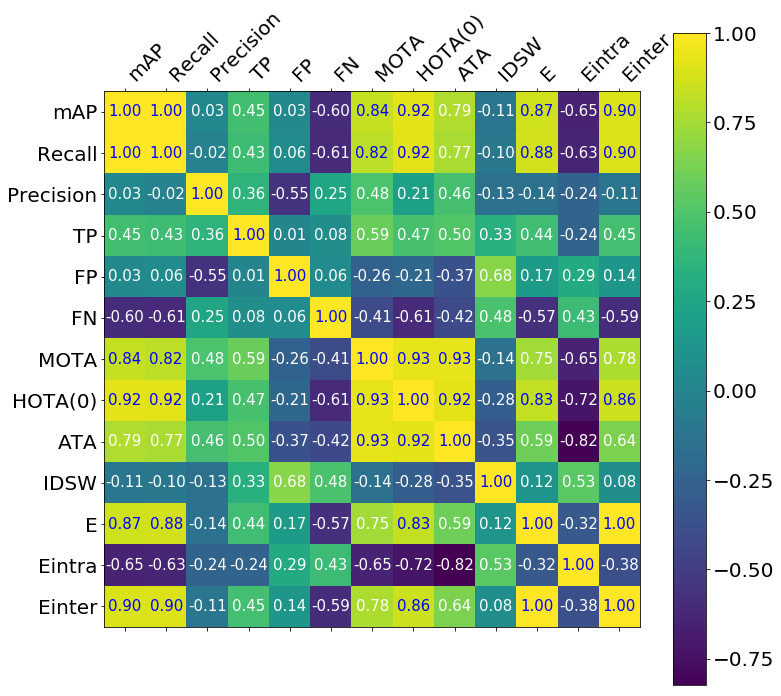

SST


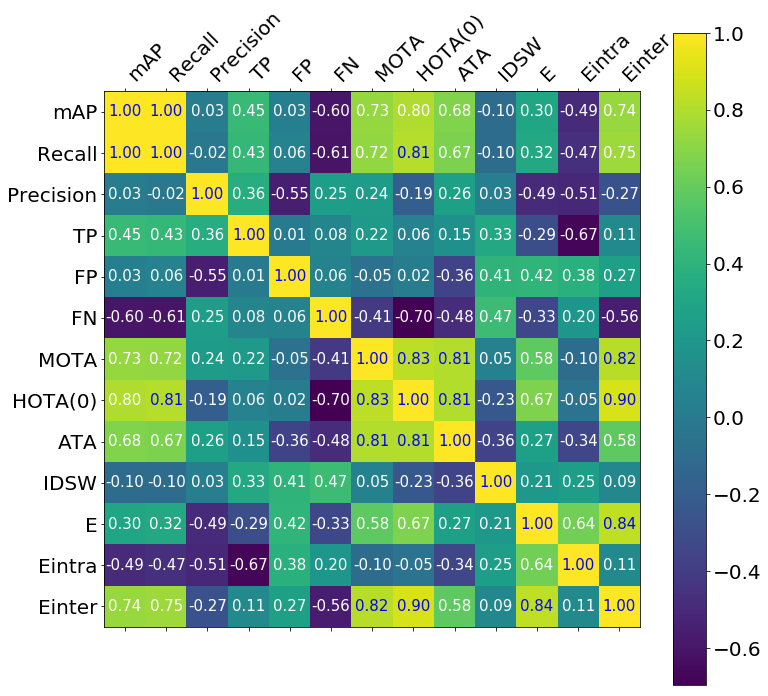

UMA


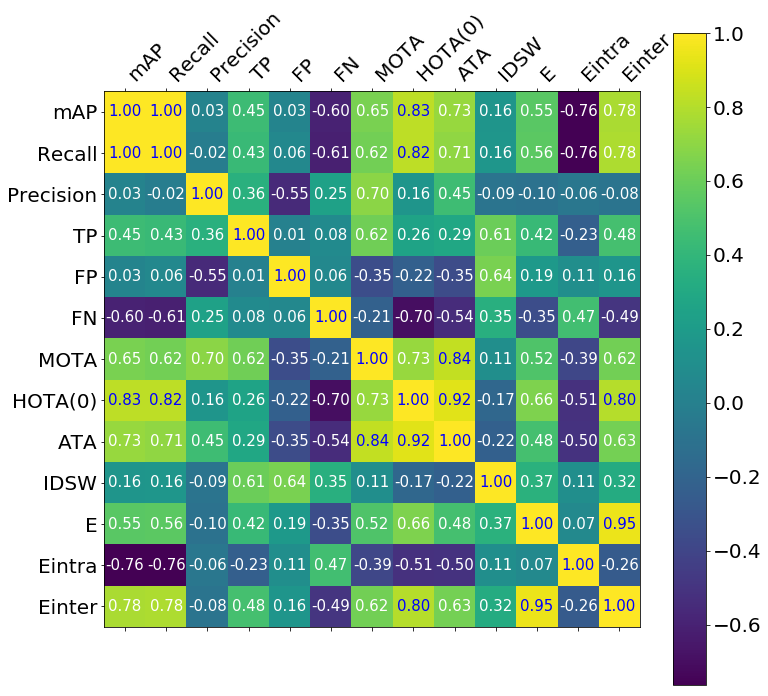

In [23]:
for trk in tb_20['Tracker'].unique():
    
    tb_search = aux.search(tb_20, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_MOT20_' + trk + '.png')

## VisDrone - val

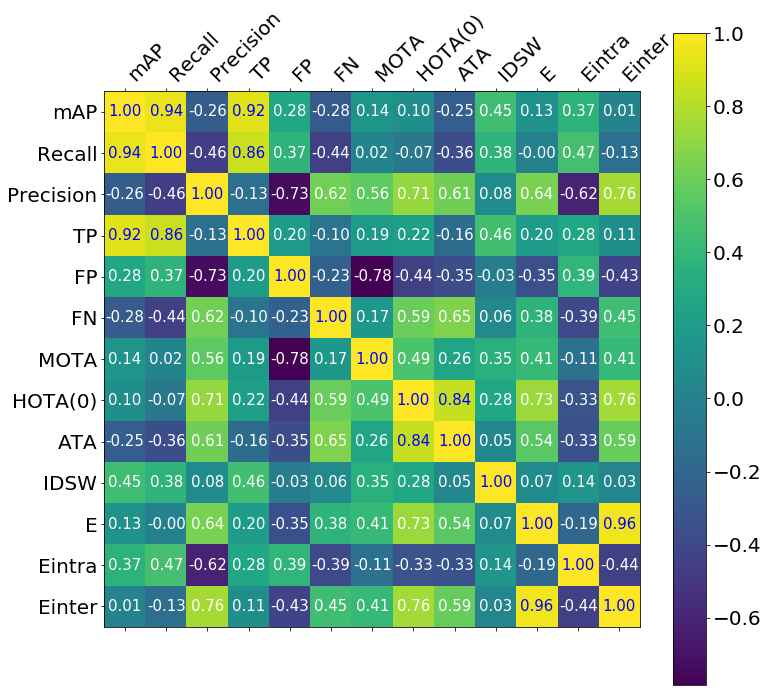

In [24]:
result_m = aux.correlation_metrics(tb_vd, metrics)

aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_VisDrone-val.png')

DEEP_SORT


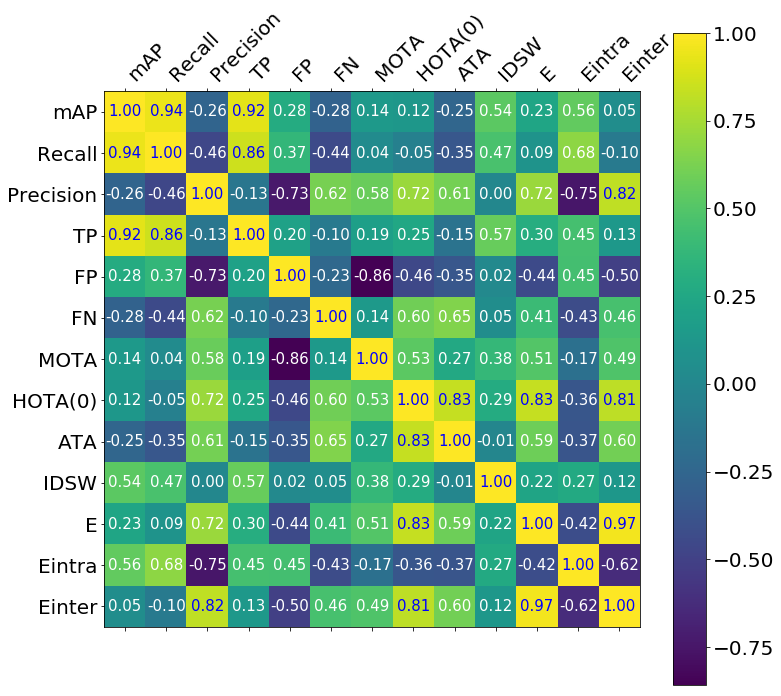

UMA


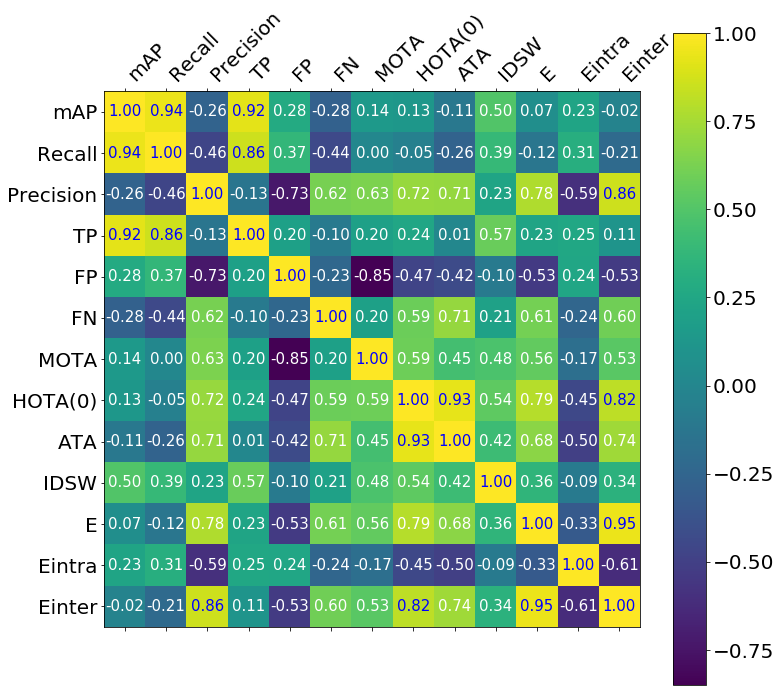

SST


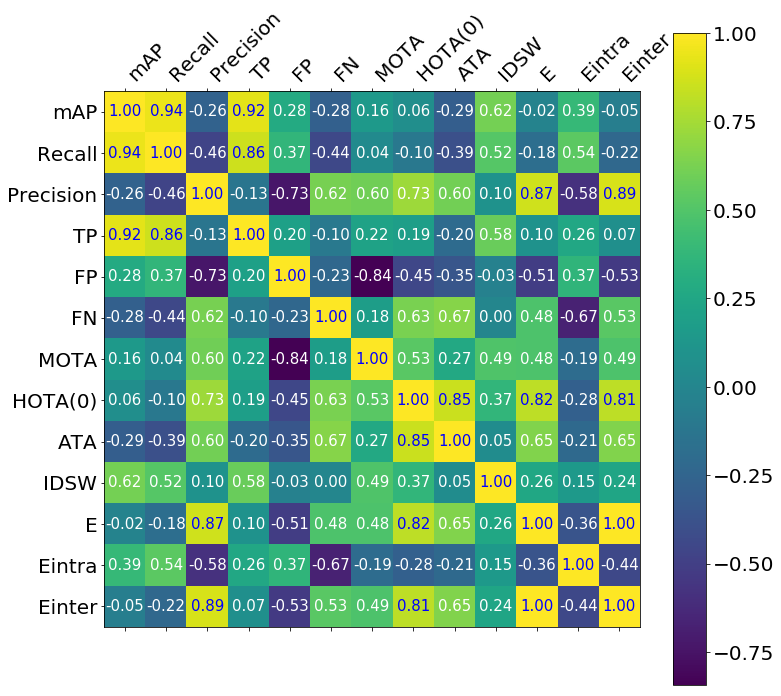

SORT


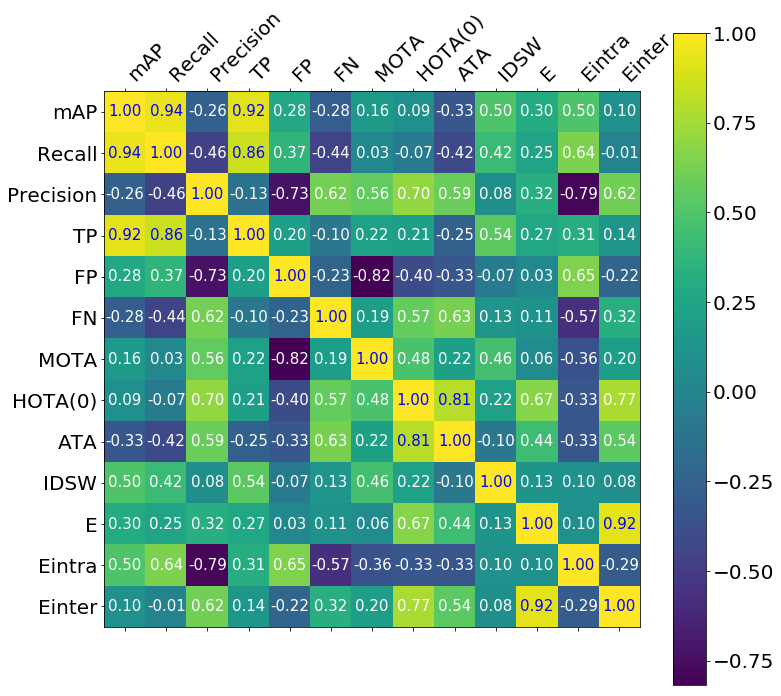

In [25]:
for trk in tb_vd['Tracker'].unique():
    
    tb_search = aux.search(tb_vd, trk)
    result_m = aux.correlation_metrics(tb_search, metrics)
    
    print(trk.upper())

    aux.plot_matrix(result_m, metrics, file_name='correlation_matrix_new_VisDrone-val_' + trk + '.png')

## Matrix with more metrics

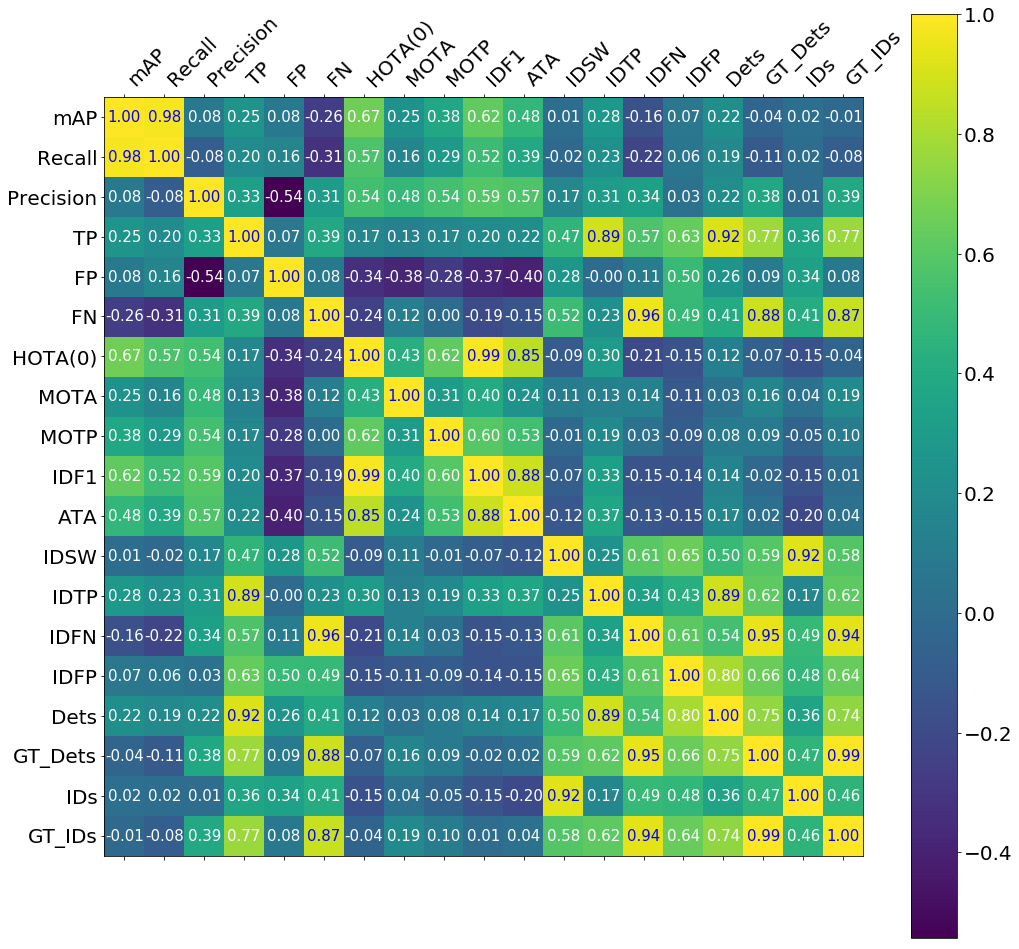

In [26]:
metrics = ['mAP', 'Recall', 'Precision', 'TP', 'FP', 'FN', 'HOTA(0)', 'MOTA', 'MOTP', 'IDF1', 'ATA', 'IDSW', 'IDTP', 'IDFN', 'IDFP', 'Dets', 'GT_Dets', 'IDs', 'GT_IDs']
result_m = aux.correlation_metrics(tb, metrics)

aux.plot_matrix(result_m, metrics, figsize=(17, 17), file_name='correlation_matrix_more_aux.png')

# Table

In [27]:
m = tb[(tb['Set id'] == 'MOT17-02')]

m[['Detector', 'Tracker', 'mAP', 'Recall', 'Precision', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter']]

Detector    Tracker         mAP      Recall   Precision  \
210                     gt       sort  100.000000  100.000000  100.000000   
217                 public       sort   28.748089   28.816766   94.905937   
168            faster_rcnn       sort   41.686243   51.439169   37.103031   
175  faster_rcnn-fine-tune       sort   59.510762   71.880564   33.888257   
182      faster_rcnn-mod-1       sort   23.691040   26.583828   35.385603   
189      faster_rcnn-mod-2       sort   34.116557   37.147626   67.935151   
196      faster_rcnn-mod-3       sort   19.327699   22.551929   61.933381   
203      faster_rcnn-mod-4       sort   10.390821   10.408012   99.257163   
42                      gt  deep_sort  100.000000  100.000000  100.000000   
49                  public  deep_sort   28.748089   28.816766   94.905937   
0              faster_rcnn  deep_sort   41.686243   51.439169   37.103031   
7    faster_rcnn-fine-tune  deep_sort   59.510762   71.880564   33.888257   
14       faster_rcnn-mod-1  deep_sort   23.691040   26.583828   35.385603   
21       faster_rcnn-mod-2  deep_sort   34.116557   37.147626   67.935151   
28       faster_rcnn-mod-3  deep_sort   19.327699   22.551929   61.933381   
35       faster_rcnn-mod-4  deep_sort   10.390821   10.408012   99.257163   
154                     gt        sst  100.000000  100.000000  100.000000   
161                 public        sst   28.748089   28.816766   94.905937   
112            faster_rcnn        sst   41.686243   51.439169   37.103031   
119  faster_rcnn-fine-tune        sst   59.510762   71.880564   33.888257   
126      faster_rcnn-mod-1        sst   23.691040   26.583828   35.385603   
133      faster_rcnn-mod-2        sst   34.116557   37.147626   67.935151   
140      faster_rcnn-mod-3        sst   19.327699   22.551929   61.933381   
147      faster_rcnn-mod-4        sst   10.390821   10.408012   99.257163   
98                      gt        uma  100.000000  100.000000  100.000000   
105                 public        uma   28.748089   28.816766   94.905937   
56             faster_rcnn        uma   41.686243   51.439169   37.103031   
63   faster_rcnn-fine-tune        uma   59.510762   71.880564   33.888257   
70       faster_rcnn-mod-1        uma   23.691040   26.583828   35.385603   
77       faster_rcnn-mod-2        uma   34.116557   37.147626   67.935151   
84       faster_rcnn-mod-3        uma   19.327699   22.551929   61.933381   
91       faster_rcnn-mod-4        uma   10.390821   10.408012   99.257163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  
210  0.909962  0.954888  0.924040     0  0.97   -0.02    0.99  
217  0.320435  0.343676  0.144317    86  0.45   -0.01    0.46  
168 -0.226952  0.310986  0.018570   482  0.78    0.05    0.73  
175 -0.540983  0.296513  0.013484  1039  0.81    0.10    0.71  
182 -0.179000  0.199457  0.018413   184  0.54   -0.05    0.59  
189  0.231150  0.356260  0.064070   187  0.59   -0.03    0.63  
196  0.162801  0.142026  0.015174   437  0.31   -0.05    0.36  
203  0.123406  0.207228  0.089216    49  0.17   -0.01    0.18  
42   0.906194  0.926147  0.828662    12  0.96   -0.03    0.99  
49   0.328508  0.387584  0.209152    62  0.47   -0.01    0.47  
0   -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65  
7   -1.545665  0.259144  0.045136  1408  0.54   -0.01    0.55  
14  -0.377375  0.252752  0.035206   170  0.65   -0.00    0.65  
21   0.176578  0.395774  0.122142   190  0.67   -0.00    0.67  
28   0.105592  0.288022  0.101663   272  0.46    0.00    0.46  
35   0.144341  0.272083  0.183191    12  0.20   -0.00    0.20  
154  0.983747  0.764423  0.387991   298  0.48   -0.31    0.79  
161  0.324848  0.384787  0.139245   112  0.45    0.00    0.44  
112 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46  
119 -0.930036  0.285409  0.006422  2147  0.49    0.05    0.44  
126 -0.433507  0.230145  0.025359   334  0.46   -0.00    0.46  
133  0.167268  0.386653  0.060871   325  0.57   -0.00    0.57  
140 

## Search special cases

In [28]:
accept = anly.search_correlation(tb, {'HOTA(0)':0.05, 'MOTA':0.05}, ['and'])

for corr in accept:

    a = pd.DataFrame([corr[0], corr[1]])
    
    display(a[['Set id', 'Detector', 'Tracker', 'mAP', 'Recall', 'Precision', 'MOTA', 'HOTA(0)', 'ATA', 'IDSW', 'E', 'Eintra', 'Einter', 'IDSW_score']])

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
210  MOT17-02       gt       sort  100.0   100.0      100.0  0.909962   
42   MOT17-02       gt  deep_sort  100.0   100.0      100.0  0.906194   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
210  0.954888  0.924040     0  0.97   -0.02    0.99         1.0  
42   0.926147  0.828662    12  0.96   -0.03    0.99         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
217  MOT17-02   public       sort  28.748089  28.816766  94.905937  0.320435   
49   MOT17-02   public  deep_sort  28.748089  28.816766  94.905937  0.328508   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
217  0.343676  0.144317    86  0.45   -0.01    0.46        0.98  
49   0.387584  0.209152    62  0.47   -0.01    0.47        0.98

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
217  MOT17-02   public    sort  28.748089  28.816766  94.905937  0.320435   
161  MOT17-02   public     sst  28.748089  28.816766  94.905937  0.324848   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
217  0.343676  0.144317    86  0.45   -0.01    0.46        0.98  
161  0.384787  0.139245   112  0.45    0.00    0.44        0.97

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
49   MOT17-02   public  deep_sort  28.748089  28.816766  94.905937  0.328508   
161  MOT17-02   public        sst  28.748089  28.816766  94.905937  0.324848   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
49   0.387584  0.209152    62  0.47   -0.01    0.47        0.98  
161  0.384787  0.139245   112  0.45    0.00    0.44        0.97

Set id     Detector    Tracker        mAP     Recall  Precision  \
0    MOT17-02  faster_rcnn  deep_sort  41.686243  51.439169  37.103031   
112  MOT17-02  faster_rcnn        sst  41.686243  51.439169  37.103031   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
0   -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65        0.66  
112 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46        0.54

Set id           Detector    Tracker        mAP     Recall  Precision  \
0   MOT17-02        faster_rcnn  deep_sort  41.686243  51.439169  37.103031   
70  MOT17-02  faster_rcnn-mod-1        uma  23.691040  26.583828  35.385603   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
0  -0.752651  0.301014  0.046176   588  0.65   -0.01    0.65        0.66  
70 -0.707712  0.287322  0.107424   155  0.70    0.02    0.68        0.61

Set id           Detector    Tracker        mAP     Recall  Precision  \
21   MOT17-02  faster_rcnn-mod-2  deep_sort  34.116557  37.147626  67.935151   
133  MOT17-02  faster_rcnn-mod-2        sst  34.116557  37.147626  67.935151   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
21   0.176578  0.395774  0.122142   190  0.67    -0.0    0.67        0.89  
133  0.167268  0.386653  0.060871   325  0.57    -0.0    0.57        0.83

Set id           Detector    Tracker        mAP     Recall  Precision  \
28  MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  22.551929  61.933381   
35  MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821  10.408012  99.257163   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
28  0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
35  0.144341  0.272083  0.183191    12  0.20    -0.0    0.20        1.00

Set id           Detector    Tracker        mAP     Recall  Precision  \
28   MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  22.551929  61.933381   
140  MOT17-02  faster_rcnn-mod-3        sst  19.327699  22.551929  61.933381   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
28   0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
140  0.108014  0.319179  0.059084   293  0.30    -0.0    0.30        0.63

Set id           Detector    Tracker        mAP     Recall  Precision  \
28   MOT17-02  faster_rcnn-mod-3  deep_sort  19.327699  22.551929  61.933381   
147  MOT17-02  faster_rcnn-mod-4        sst  10.390821  10.408012  99.257163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
28   0.105592  0.288022  0.101663   272  0.46     0.0    0.46        0.76  
147  0.140251  0.266045  0.144347    25  0.18    -0.0    0.18        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
35   MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821  10.408012  99.257163   
140  MOT17-02  faster_rcnn-mod-3        sst  19.327699  22.551929  61.933381   

         MOTA   HOTA(0)       ATA  IDSW    E  Eintra  Einter  IDSW_score  
35   0.144341  0.272083  0.183191    12  0.2    -0.0     0.2        1.00  
140  0.108014  0.319179  0.059084   293  0.3    -0.0     0.3        0.63

Set id           Detector    Tracker        mAP     Recall  Precision  \
35   MOT17-02  faster_rcnn-mod-4  deep_sort  10.390821  10.408012  99.257163   
147  MOT17-02  faster_rcnn-mod-4        sst  10.390821  10.408012  99.257163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
35   0.144341  0.272083  0.183191    12  0.20    -0.0    0.20        1.00  
147  0.140251  0.266045  0.144347    25  0.18    -0.0    0.18        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
112  MOT17-02        faster_rcnn     sst  41.686243  51.439169  37.103031   
70   MOT17-02  faster_rcnn-mod-1     uma  23.691040  26.583828  35.385603   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
112 -0.751843  0.297848  0.013806  1209  0.46    0.00    0.46        0.54  
70  -0.707712  0.287322  0.107424   155  0.70    0.02    0.68        0.61

Set id           Detector Tracker        mAP     Recall  Precision  \
133  MOT17-02  faster_rcnn-mod-2     sst  34.116557  37.147626  67.935151   
91   MOT17-02  faster_rcnn-mod-4     uma  10.390821  10.408012  99.257163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
133  0.167268  0.386653  0.060871   325  0.57   -0.00    0.57        0.83  
91   0.168936  0.342128  0.253245     2  0.25    0.01    0.23        1.00

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
211  MOT17-04       gt       sort  100.0   100.0      100.0  0.710411   
43   MOT17-04       gt  deep_sort  100.0   100.0      100.0  0.709401   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
211  0.878817  0.911521     0  0.98   -0.01     1.0         1.0  
43   0.877694  0.910226     0  0.97   -0.02     1.0         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
218  MOT17-04   public       sort  42.893776  42.895235  99.672604  0.539984   
50   MOT17-04   public  deep_sort  42.893776  42.895235  99.672604  0.545808   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
218  0.544565  0.281323    86  0.59   -0.01     0.6         1.0  
50   0.580281  0.367510    49  0.60   -0.00     0.6         1.0

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
218  MOT17-04   public    sort  42.893776  42.895235  99.672604  0.539984   
162  MOT17-04   public     sst  42.893776  42.895235  99.672604  0.547869   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
218  0.544565  0.281323    86  0.59   -0.01    0.60         1.0  
162  0.563715  0.308978    79  0.60    0.01    0.59         1.0

Set id               Detector Tracker        mAP     Recall  Precision  \
169  MOT17-04            faster_rcnn    sort  54.103815  61.207484  56.480588   
64   MOT17-04  faster_rcnn-fine-tune     uma  71.994412  72.664192  77.600880   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
169  0.076792  0.519879  0.043214   351  0.88    0.01    0.87        0.84  
64   0.031962  0.536223  0.243032   449  0.82   -0.06    0.88        0.87

Set id           Detector Tracker       mAP     Recall  Precision  \
204  MOT17-04  faster_rcnn-mod-4    sort  15.17361  15.663965  95.272761   
148  MOT17-04  faster_rcnn-mod-4     sst  15.17361  15.663965  95.272761   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
204  0.140190  0.227020  0.058077   149  0.25   -0.01    0.27        0.98  
148  0.157579  0.264722  0.099846    82  0.27   -0.00    0.27        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
50   MOT17-04   public  deep_sort  42.893776  42.895235  99.672604  0.545808   
162  MOT17-04   public        sst  42.893776  42.895235  99.672604  0.547869   

      HOTA(0)       ATA  IDSW    E  Eintra  Einter  IDSW_score  
50   0.580281  0.367510    49  0.6   -0.00    0.60         1.0  
162  0.563715  0.308978    79  0.6    0.01    0.59         1.0

Set id     Detector    Tracker        mAP     Recall  Precision  \
1    MOT17-04  faster_rcnn  deep_sort  54.103815  61.207484  56.480588   
113  MOT17-04  faster_rcnn        sst  54.103815  61.207484  56.480588   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
1   -0.195113  0.497010  0.105905   385  0.80   -0.01    0.82        0.79  
113 -0.145699  0.524348  0.033439   945  0.68    0.00    0.68        0.70

Set id           Detector    Tracker        mAP     Recall  Precision  \
1   MOT17-04        faster_rcnn  deep_sort  54.103815  61.207484  56.480588   
71  MOT17-04  faster_rcnn-mod-1        uma  39.248966  42.895235  60.990479   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
1  -0.195113  0.497010  0.105905   385  0.80   -0.01    0.82        0.79  
71 -0.171100  0.517919  0.222654   125  0.91    0.05    0.86        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
15   MOT17-04  faster_rcnn-mod-1  deep_sort  39.248966  42.895235  60.990479   
127  MOT17-04  faster_rcnn-mod-1        sst  39.248966  42.895235  60.990479   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
15  -0.072734  0.419256  0.094817   168  0.79    0.01    0.79        0.86  
127 -0.050066  0.404505  0.060816   331  0.69   -0.00    0.69        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
15  MOT17-04  faster_rcnn-mod-1  deep_sort  39.248966  42.895235  60.990479   
85  MOT17-04  faster_rcnn-mod-3        uma  30.042432  34.601924  68.844009   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
15 -0.072734  0.419256  0.094817   168  0.79    0.01    0.79        0.86  
85 -0.104716  0.369293  0.176362   334  0.74    0.06    0.69        0.71

Set id               Detector    Tracker        mAP     Recall  \
22   MOT17-04      faster_rcnn-mod-2  deep_sort  46.556512  50.109840   
120  MOT17-04  faster_rcnn-fine-tune        sst  71.994412  72.664192   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
22    77.50621  0.278361  0.585937  0.201438   139  0.79     0.0    0.79   
120   77.60088  0.250983  0.593237  0.077174  1158  0.76    -0.0    0.76   

     IDSW_score  
22         0.95  
120        0.79

Set id           Detector    Tracker        mAP    Recall  Precision  \
22   MOT17-04  faster_rcnn-mod-2  deep_sort  46.556512  50.10984   77.50621   
134  MOT17-04  faster_rcnn-mod-2        sst  46.556512  50.10984   77.50621   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
22   0.278361  0.585937  0.201438   139  0.79     0.0    0.79        0.95  
134  0.287718  0.574938  0.107593   332  0.71    -0.0    0.71        0.92

Set id           Detector    Tracker        mAP     Recall  Precision  \
29  MOT17-04  faster_rcnn-mod-3  deep_sort  30.042432  34.601924  68.844009   
36  MOT17-04  faster_rcnn-mod-4  deep_sort  15.173610  15.663965  95.272761   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
29  0.116450  0.335240  0.107195   517  0.61    0.01     0.6         0.8  
36  0.160166  0.292481  0.158236    30  0.30    0.00     0.3         1.0

Set id           Detector    Tracker       mAP     Recall  Precision  \
36   MOT17-04  faster_rcnn-mod-4  deep_sort  15.17361  15.663965  95.272761   
148  MOT17-04  faster_rcnn-mod-4        sst  15.17361  15.663965  95.272761   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
36   0.160166  0.292481  0.158236    30  0.30     0.0    0.30        1.00  
148  0.157579  0.264722  0.099846    82  0.27    -0.0    0.27        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
113  MOT17-04        faster_rcnn     sst  54.103815  61.207484  56.480588   
71   MOT17-04  faster_rcnn-mod-1     uma  39.248966  42.895235  60.990479   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
113 -0.145699  0.524348  0.033439   945  0.68    0.00    0.68        0.70  
71  -0.171100  0.517919  0.222654   125  0.91    0.05    0.86        0.85

Set id               Detector Tracker        mAP     Recall  Precision  \
120  MOT17-04  faster_rcnn-fine-tune     sst  71.994412  72.664192   77.60088   
134  MOT17-04      faster_rcnn-mod-2     sst  46.556512  50.109840   77.50621   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
120  0.250983  0.593237  0.077174  1158  0.76    -0.0    0.76        0.79  
134  0.287718  0.574938  0.107593   332  0.71    -0.0    0.71        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
120  MOT17-04  faster_rcnn-fine-tune     sst  71.994412  72.664192   77.60088   
78   MOT17-04      faster_rcnn-mod-2     uma  46.556512  50.109840   77.50621   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
120  0.250983  0.593237  0.077174  1158  0.76   -0.00    0.76        0.79  
78   0.206889  0.578332  0.274107   133  0.87    0.03    0.83        0.92

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
212  MOT17-05       gt       sort  100.0   100.0      100.0  0.865404   
44   MOT17-05       gt  deep_sort  100.0   100.0      100.0  0.864392   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
212  0.890944  0.712960    20  0.83   -0.13    0.96        1.00  
44   0.844225  0.612803    36  0.84   -0.13    0.97        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
191  MOT17-05  faster_rcnn-mod-2       sort  60.860086  65.127676  62.039312   
37   MOT17-05  faster_rcnn-mod-4  deep_sort  43.161828  44.389992  93.761918   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
191  0.398728  0.583206  0.202417   126  0.84   -0.01    0.85        0.92  
37   0.435593  0.572278  0.329738    20  0.62   -0.02    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
191  MOT17-05  faster_rcnn-mod-2    sort  60.860086  65.127676  62.039312   
149  MOT17-05  faster_rcnn-mod-4     sst  43.161828  44.389992  93.761918   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
191  0.398728  0.583206  0.202417   126  0.84   -0.01    0.85        0.92  
149  0.441810  0.568384  0.278139   105  0.59   -0.00    0.59        0.96

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
51   MOT17-05   public  deep_sort  47.641404  47.755997  96.231809  0.491976   
163  MOT17-05   public        sst  47.641404  47.755997  96.231809  0.497904   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
51   0.597254  0.392926    28  0.62   -0.02    0.64        0.99  
163  0.583515  0.334480   109  0.62    0.00    0.61        0.97

Set id           Detector    Tracker        mAP     Recall  Precision  \
37   MOT17-05  faster_rcnn-mod-4  deep_sort  43.161828  44.389992  93.761918   
149  MOT17-05  faster_rcnn-mod-4        sst  43.161828  44.389992  93.761918   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
37   0.435593  0.572278  0.329738    20  0.62   -0.02    0.64        0.98  
149  0.441810  0.568384  0.278139   105  0.59   -0.00    0.59        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
107  MOT17-05             public     uma  47.641404  47.755997  96.231809   
93   MOT17-05  faster_rcnn-mod-4     uma  43.161828  44.389992  93.761918   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
107  0.518867  0.659632  0.472925    41  0.69    0.02    0.67        0.97  
93   0.469279  0.652966  0.428103    33  0.71    0.03    0.68        0.98

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
220  MOT17-09   public       sort  51.792453  51.806816  99.212857  0.530329   
52   MOT17-09   public  deep_sort  51.792453  51.806816  99.212857  0.556056   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
220  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
52   0.520900  0.372510    14  0.67   -0.02    0.68        1.00

Set id           Detector    Tracker        mAP     Recall  Precision  \
220  MOT17-09             public       sort  51.792453  51.806816  99.212857   
38   MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
220  0.530329  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
38   0.527700  0.522987  0.367636    14  0.67   -0.00    0.67        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
220  MOT17-09             public    sort  51.792453  51.806816  99.212857   
150  MOT17-09  faster_rcnn-mod-4     sst  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
220  0.530329  0.477923  0.259457    32  0.64   -0.02    0.66        0.99  
150  0.527324  0.511866  0.218502    59  0.64   -0.00    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
171  MOT17-09        faster_rcnn    sort  67.048168  72.306902  31.096708   
143  MOT17-09  faster_rcnn-mod-3     sst  57.719206  65.730433  48.294954   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
171  0.056150  0.473520  0.038059    96  0.97    0.13    0.84        0.86  
143  0.062911  0.490842  0.079794   256  0.47    0.00    0.47        0.54

Set id           Detector Tracker        mAP     Recall  Precision  \
192  MOT17-09  faster_rcnn-mod-2    sort  64.642429  67.014900  64.432735   
164  MOT17-09             public     sst  51.792453  51.806816  99.212857   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
192  0.599624  0.591042  0.173272    54  0.90    0.01    0.89        0.93  
164  0.556432  0.545199  0.309508    38  0.67    0.00    0.67        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
192  MOT17-09  faster_rcnn-mod-2    sort  64.642429  67.014900  64.432735   
94   MOT17-09  faster_rcnn-mod-4     uma  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
192  0.599624  0.591042  0.173272    54  0.90    0.01    0.89        0.93  
94   0.602254  0.637004  0.503068    17  0.78    0.05    0.74        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
52  MOT17-09             public  deep_sort  51.792453  51.806816  99.212857   
38  MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  50.231204  97.864531   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
52  0.556056  0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
38  0.527700  0.522987  0.367636    14  0.67   -0.00    0.67        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
52   MOT17-09   public  deep_sort  51.792453  51.806816  99.212857  0.556056   
164  MOT17-09   public        sst  51.792453  51.806816  99.212857  0.556432   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
52   0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
164  0.545199  0.309508    38  0.67    0.00    0.67        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
52   MOT17-09             public  deep_sort  51.792453  51.806816  99.212857   
150  MOT17-09  faster_rcnn-mod-4        sst  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
52   0.556056  0.520900  0.372510    14  0.67   -0.02    0.68        1.00  
150  0.527324  0.511866  0.218502    59  0.64   -0.00    0.64        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
3   MOT17-09        faster_rcnn  deep_sort  67.048168  72.306902  31.096708   
17  MOT17-09  faster_rcnn-mod-1  deep_sort  44.240166  46.086659  27.941024   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
3  -0.604131  0.416854  0.048045   120  0.66    0.01    0.65        0.85  
17 -0.564319  0.374385  0.066305    51  0.67    0.01    0.66        0.73

Set id           Detector    Tracker        mAP     Recall  Precision  \
3   MOT17-09        faster_rcnn  deep_sort  67.048168  72.306902  31.096708   
87  MOT17-09  faster_rcnn-mod-3        uma  57.719206  65.730433  48.294954   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
3  -0.604131  0.416854  0.048045   120  0.66    0.01    0.65        0.85  
87 -0.554742  0.392423  0.199243   199  0.43   -0.12    0.55        0.71

Set id           Detector    Tracker        mAP     Recall  Precision  \
17  MOT17-09  faster_rcnn-mod-1  deep_sort  44.240166  46.086659  27.941024   
87  MOT17-09  faster_rcnn-mod-3        uma  57.719206  65.730433  48.294954   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
17 -0.564319  0.374385  0.066305    51  0.67    0.01    0.66        0.73  
87 -0.554742  0.392423  0.199243   199  0.43   -0.12    0.55        0.71

Set id           Detector    Tracker        mAP     Recall  Precision  \
24   MOT17-09  faster_rcnn-mod-2  deep_sort  64.642429  67.014900  64.432735   
164  MOT17-09             public        sst  51.792453  51.806816  99.212857   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
24   0.525634  0.586620  0.189608    55  0.87    -0.0    0.87        0.90  
164  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99

Set id           Detector    Tracker        mAP   Recall  Precision  \
24   MOT17-09  faster_rcnn-mod-2  deep_sort  64.642429  67.0149  64.432735   
136  MOT17-09  faster_rcnn-mod-2        sst  64.642429  67.0149  64.432735   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
24   0.525634  0.586620  0.189608    55  0.87    -0.0    0.87        0.90  
136  0.479624  0.611473  0.104272   135  0.77    -0.0    0.77        0.83

Set id           Detector    Tracker        mAP     Recall  Precision  \
38   MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  50.231204  97.864531   
164  MOT17-09             public        sst  51.792453  51.806816  99.212857   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
38   0.527700  0.522987  0.367636    14  0.67    -0.0    0.67        0.99  
164  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
38   MOT17-09  faster_rcnn-mod-4  deep_sort  49.426002  50.231204  97.864531   
150  MOT17-09  faster_rcnn-mod-4        sst  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
38   0.527700  0.522987  0.367636    14  0.67    -0.0    0.67        0.99  
150  0.527324  0.511866  0.218502    59  0.64    -0.0    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
164  MOT17-09             public     sst  51.792453  51.806816  99.212857   
150  MOT17-09  faster_rcnn-mod-4     sst  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
164  0.556432  0.545199  0.309508    38  0.67     0.0    0.67        0.99  
150  0.527324  0.511866  0.218502    59  0.64    -0.0    0.64        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
108  MOT17-09             public     uma  51.792453  51.806816  99.212857   
94   MOT17-09  faster_rcnn-mod-4     uma  49.426002  50.231204  97.864531   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
108  0.629671  0.685312  0.628067     8  0.74    0.01    0.73        0.99  
94   0.602254  0.637004  0.503068    17  0.78    0.05    0.74        0.99

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
214  MOT17-10       gt       sort  100.0   100.0      100.0  0.974297   
46   MOT17-10       gt  deep_sort  100.0   100.0      100.0  0.980762   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
214  0.887750  0.660438    45  0.90   -0.08    0.99         1.0  
46   0.917225  0.804598    17  0.91   -0.08    0.99         1.0

Set id           Detector    Tracker        mAP     Recall  Precision  \
186  MOT17-10  faster_rcnn-mod-1       sort  51.725326  55.955056  34.094994   
32   MOT17-10  faster_rcnn-mod-3  deep_sort  43.512026  51.397472  57.077127   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
186  0.095335  0.370596  0.027283   209  0.98    0.12    0.87        0.76  
32   0.113794  0.404553  0.127831   396  0.67    0.01    0.67        0.64

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
53   MOT17-10   public  deep_sort  58.885698  59.389045   87.17658  0.496222   
165  MOT17-10   public        sst  58.885698  59.389045   87.17658  0.479554   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
53   0.541744  0.249741   163  0.77   -0.01    0.78        0.95  
165  0.530361  0.164437   326  0.71    0.01    0.71        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
18  MOT17-10  faster_rcnn-mod-1  deep_sort  51.725326  55.955056  34.094994   
88  MOT17-10  faster_rcnn-mod-3        uma  43.512026  51.397472  57.077127   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
18 -0.415375  0.407539  0.037912   224  0.84    0.06    0.79        0.74  
88 -0.378768  0.401722  0.162166   331  0.57   -0.07    0.63        0.66

Set id           Detector    Tracker        mAP     Recall  Precision  \
32   MOT17-10  faster_rcnn-mod-3  deep_sort  43.512026  51.397472  57.077127   
144  MOT17-10  faster_rcnn-mod-3        sst  43.512026  51.397472  57.077127   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
32   0.113794  0.404553  0.127831   396  0.67    0.01    0.67        0.64  
144  0.106940  0.438714  0.074164   491  0.43    0.00    0.43        0.50

Set id           Detector    Tracker       mAP     Recall  Precision  \
39   MOT17-10  faster_rcnn-mod-4  deep_sort  24.99377  25.428371  96.431425   
151  MOT17-10  faster_rcnn-mod-4        sst  24.99377  25.428371  96.431425   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
39   0.276657  0.360097  0.216079    17  0.44     0.0    0.44        1.00  
151  0.266220  0.341924  0.149676    53  0.38    -0.0    0.38        0.98

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
215  MOT17-11       gt       sort  100.0   100.0      100.0  0.979017   
47   MOT17-11       gt  deep_sort  100.0   100.0      100.0  0.978275   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
215  0.969785  0.867037     7  0.92   -0.07    0.98         1.0  
47   0.970744  0.882957     2  0.92   -0.07    0.99         1.0

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
222  MOT17-11   public       sort  60.102493  60.191217  95.372066  0.554684   
54   MOT17-11   public  deep_sort  60.102493  60.191217  95.372066  0.571111   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
222  0.549020  0.295536    53  0.71   -0.03    0.73        0.99  
54   0.588907  0.362398    34  0.74   -0.01    0.75        0.99

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
222  MOT17-11   public    sort  60.102493  60.191217  95.372066  0.554684   
166  MOT17-11   public     sst  60.102493  60.191217  95.372066  0.569097   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
222  0.549020  0.295536    53  0.71   -0.03    0.73        0.99  
166  0.570539  0.305052    67  0.74    0.00    0.73        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
173  MOT17-11        faster_rcnn    sort  67.183533  74.122715  23.260798   
89   MOT17-11  faster_rcnn-mod-3     uma  57.056801  62.786300  58.963986   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
173 -0.357143  0.480671  0.035124   158  0.97    0.16    0.82        0.88  
89  -0.374311  0.470536  0.169458   182  0.50   -0.14    0.64        0.79

Set id               Detector    Tracker        mAP     Recall  \
180  MOT17-11  faster_rcnn-fine-tune       sort  84.047280  89.745745   
5    MOT17-11            faster_rcnn  deep_sort  67.183533  74.122715   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
180  16.403265 -1.292285  0.372019  0.020035   404  0.74    0.12    0.62   
5    23.260798 -1.307546  0.397970  0.039101   142  0.64    0.03    0.61   

     IDSW_score  
180        0.89  
5          0.87

Set id               Detector Tracker        mAP     Recall  Precision  \
180  MOT17-11  faster_rcnn-fine-tune    sort  84.047280  89.745745  16.403265   
131  MOT17-11      faster_rcnn-mod-1     sst  42.072711  45.019962  21.560833   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
180 -1.292285  0.372019  0.020035   404  0.74    0.12    0.62        0.89  
131 -1.250848  0.352441  0.026324   137  0.41    0.00    0.40        0.60

Set id           Detector Tracker       mAP     Recall  Precision  \
208  MOT17-11  faster_rcnn-mod-4    sort  51.03177  51.828115  96.536204   
152  MOT17-11  faster_rcnn-mod-4     sst  51.03177  51.828115  96.536204   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
208  0.480076  0.507004  0.254496    31  0.65   -0.03    0.67        0.99  
152  0.501378  0.546671  0.258987    25  0.68   -0.00    0.68        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
54   MOT17-11   public  deep_sort  60.102493  60.191217  95.372066  0.571111   
166  MOT17-11   public        sst  60.102493  60.191217  95.372066  0.569097   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
54   0.588907  0.362398    34  0.74   -0.01    0.75        0.99  
166  0.570539  0.305052    67  0.74    0.00    0.73        0.98

Set id           Detector    Tracker       mAP     Recall  Precision  \
40  MOT17-11  faster_rcnn-mod-4  deep_sort  51.03177  51.828115  96.536204   
96  MOT17-11  faster_rcnn-mod-4        uma  51.03177  51.828115  96.536204   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
40  0.500106  0.609458  0.332476    11  0.69   -0.01    0.70        1.00  
96  0.502331  0.619543  0.330117    22  0.72   -0.01    0.73        0.99

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
216  MOT17-13       gt       sort  100.0   100.0      100.0  0.538825   
48   MOT17-13       gt  deep_sort  100.0   100.0      100.0  0.533843   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
216  0.793573  0.762137    10  0.87   -0.11    0.97         1.0  
48   0.751528  0.701078     9  0.87   -0.11    0.98         1.0

Set id Detector Tracker    mAP  Recall  Precision      MOTA   HOTA(0)  \
216  MOT17-13       gt    sort  100.0   100.0      100.0  0.538825  0.793573   
104  MOT17-13       gt     uma  100.0   100.0      100.0  0.518468  0.749240   

          ATA  IDSW     E  Eintra  Einter  IDSW_score  
216  0.762137    10  0.87   -0.11    0.97        1.00  
104  0.674815    61  0.80   -0.17    0.96        0.99

Set id Detector Tracker        mAP     Recall  Precision      MOTA  \
223  MOT17-13   public    sort  40.895173  41.403109  81.722341  0.458340   
167  MOT17-13   public     sst  40.895173  41.403109  81.722341  0.409036   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
223  0.513108  0.205431   181  0.51   -0.05    0.56        0.96  
167  0.559805  0.237407   559  0.51    0.00    0.50        0.83

Set id           Detector    Tracker        mAP     Recall  Precision  \
202  MOT17-13  faster_rcnn-mod-3       sort  40.771876  47.386425  58.449922   
41   MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  18.634100  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
202 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
41  -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
202  MOT17-13  faster_rcnn-mod-3    sort  40.771876  47.386425  58.449922   
153  MOT17-13  faster_rcnn-mod-4     sst  18.388796  18.634100  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
202 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
153 -0.064594  0.202299  0.099185    68  0.33   -0.00    0.33        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
202  MOT17-13  faster_rcnn-mod-3    sort  40.771876  47.386425  58.449922   
97   MOT17-13  faster_rcnn-mod-4     uma  18.388796  18.634100  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
202 -0.086068  0.238661  0.050663   409  0.57   -0.05    0.62        0.81  
97  -0.060213  0.262213  0.166814     1  0.46    0.03    0.43        0.99

Set id           Detector    Tracker        mAP   Recall  Precision  \
209  MOT17-13  faster_rcnn-mod-4       sort  18.388796  18.6341  97.672224   
41   MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  18.6341  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
209 -0.061244  0.168097  0.081149    25  0.29   -0.04    0.32        0.98  
41  -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99

Set id           Detector Tracker        mAP   Recall  Precision  \
209  MOT17-13  faster_rcnn-mod-4    sort  18.388796  18.6341  97.672224   
153  MOT17-13  faster_rcnn-mod-4     sst  18.388796  18.6341  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
209 -0.061244  0.168097  0.081149    25  0.29   -0.04    0.32        0.98  
153 -0.064594  0.202299  0.099185    68  0.33   -0.00    0.33        0.96

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
48   MOT17-13       gt  deep_sort  100.0   100.0      100.0  0.533843   
104  MOT17-13       gt        uma  100.0   100.0      100.0  0.518468   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
48   0.751528  0.701078     9  0.87   -0.11    0.98        1.00  
104  0.749240  0.674815    61  0.80   -0.17    0.96        0.99

Set id Detector    Tracker        mAP     Recall  Precision      MOTA  \
55   MOT17-13   public  deep_sort  40.895173  41.403109  81.722341  0.454561   
167  MOT17-13   public        sst  40.895173  41.403109  81.722341  0.409036   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
55   0.569496  0.316998   128  0.59   -0.02    0.61        0.94  
167  0.559805  0.237407   559  0.51    0.00    0.50        0.83

Set id               Detector    Tracker        mAP     Recall  \
20   MOT17-13      faster_rcnn-mod-1  deep_sort  51.506577  58.800936   
125  MOT17-13  faster_rcnn-fine-tune        sst  76.004695  83.154294   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
20   27.456915 -2.045181  0.306720  0.051485   210  0.62    0.03    0.59   
125  34.137328 -2.014946  0.332113  0.027378  1724  0.41    0.01    0.41   

     IDSW_score  
20         0.72  
125        0.69

Set id           Detector    Tracker        mAP   Recall  Precision  \
41   MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  18.6341  97.672224   
153  MOT17-13  faster_rcnn-mod-4        sst  18.388796  18.6341  97.672224   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
41  -0.068459  0.218088  0.125938     6  0.37    -0.0    0.38        0.99  
153 -0.064594  0.202299  0.099185    68  0.33    -0.0    0.33        0.96

Set id           Detector    Tracker        mAP   Recall  Precision  \
41  MOT17-13  faster_rcnn-mod-4  deep_sort  18.388796  18.6341  97.672224   
97  MOT17-13  faster_rcnn-mod-4        uma  18.388796  18.6341  97.672224   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
41 -0.068459  0.218088  0.125938     6  0.37   -0.00    0.38        0.99  
97 -0.060213  0.262213  0.166814     1  0.46    0.03    0.43        0.99

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
344  MOT20-01       gt       sort  100.0   100.0      100.0  0.994263   
248  MOT20-01       gt  deep_sort  100.0   100.0      100.0  0.991444   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
344  0.994329  0.985178     0  0.97   -0.02    0.99         1.0  
248  0.964930  0.914178     3  0.95   -0.04    0.99         1.0

Set id Detector    Tracker        mAP    Recall  Precision      MOTA  \
348  MOT20-01   public       sort  55.815239  55.92586  99.540048  0.527730   
252  MOT20-01   public  deep_sort  55.815239  55.92586  99.540048  0.565979   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
348  0.493122  0.216287   165  0.67   -0.03    0.69        0.98  
252  0.531738  0.330623   117  0.71   -0.01    0.72        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
320  MOT20-01        faster_rcnn    sort  57.594396  62.390839  58.147164   
268  MOT20-01  faster_rcnn-mod-2     uma  49.509424  51.407949  84.335940   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
320  0.349975  0.499262  0.057676   507  0.87   -0.01    0.87        0.87  
268  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
324  MOT20-01  faster_rcnn-fine-tune    sort  85.540897  87.805204  59.503608   
332  MOT20-01      faster_rcnn-mod-2    sort  49.509424  51.407949  84.335940   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
324  0.459889  0.471258  0.053332   888  0.97    0.12    0.85        0.81  
332  0.430096  0.460810  0.120060   264  0.67   -0.04    0.71        0.96

Set id               Detector    Tracker        mAP     Recall  \
324  MOT20-01  faster_rcnn-fine-tune       sort  85.540897  87.805204   
236  MOT20-01      faster_rcnn-mod-2  deep_sort  49.509424  51.407949   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
324  59.503608  0.459889  0.471258  0.053332   888  0.97    0.12    0.85   
236  84.335940  0.428435  0.515897  0.181479   268  0.75   -0.00    0.75   

     IDSW_score  
324        0.81  
236        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
324  MOT20-01  faster_rcnn-fine-tune    sort  85.540897  87.805204  59.503608   
300  MOT20-01      faster_rcnn-mod-2     sst  49.509424  51.407949  84.335940   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
324  0.459889  0.471258  0.053332   888  0.97    0.12    0.85        0.81  
300  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91

Set id           Detector Tracker        mAP     Recall  Precision  \
328  MOT20-01  faster_rcnn-mod-1    sort  33.042870  34.116022  67.683196   
316  MOT20-01             public     sst  55.815239  55.925860  99.540048   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
328  0.200755  0.269903  0.043816   271  0.52   -0.06    0.58        0.92  
316  0.193608  0.272656  0.138614    66 -0.03   -0.33    0.30        0.98

Set id           Detector Tracker       mAP     Recall  Precision  \
328  MOT20-01  faster_rcnn-mod-1    sort  33.04287  34.116022  67.683196   
276  MOT20-01  faster_rcnn-mod-4     uma  10.72352  10.728925  99.834163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
328  0.200755  0.269903  0.043816   271  0.52   -0.06    0.58        0.92  
276  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
332  MOT20-01  faster_rcnn-mod-2    sort  49.509424  51.407949   84.33594   
300  MOT20-01  faster_rcnn-mod-2     sst  49.509424  51.407949   84.33594   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
332  0.430096  0.460810  0.120060   264  0.67   -0.04    0.71        0.96  
300  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91

Set id           Detector Tracker       mAP     Recall  Precision  \
340  MOT20-01  faster_rcnn-mod-4    sort  10.72352  10.728925  99.834163   
308  MOT20-01  faster_rcnn-mod-4     sst  10.72352  10.728925  99.834163   

         MOTA  HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
340  0.088374  0.14427  0.054312    76  0.17   -0.02    0.19        0.96  
308  0.117464  0.18051  0.098281    68  0.18   -0.00    0.18        0.97

Set id Detector    Tracker        mAP    Recall  Precision      MOTA  \
252  MOT20-01   public  deep_sort  55.815239  55.92586  99.540048  0.565979   
284  MOT20-01   public        uma  55.815239  55.92586  99.540048  0.594565   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
252  0.531738  0.330623   117  0.71   -0.01    0.72        0.99  
284  0.540953  0.392344   151  0.75    0.00    0.75        0.98

Set id               Detector    Tracker        mAP     Recall  \
224  MOT20-01            faster_rcnn  deep_sort  57.594396  62.390839   
228  MOT20-01  faster_rcnn-fine-tune  deep_sort  85.540897  87.805204   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
224  58.147164  0.151334  0.481309  0.087597   623  0.83    0.01    0.82   
228  59.503608  0.170106  0.455186  0.135760   859  0.73   -0.01    0.74   

     IDSW_score  
224        0.76  
228        0.84

Set id               Detector    Tracker        mAP     Recall  \
224  MOT20-01            faster_rcnn  deep_sort  57.594396  62.390839   
292  MOT20-01  faster_rcnn-fine-tune        sst  85.540897  87.805204   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
224  58.147164  0.151334  0.481309  0.087597   623  0.83    0.01    0.82   
292  59.503608  0.185707  0.490220  0.056784  1766  0.60    0.01    0.58   

     IDSW_score  
224        0.76  
292        0.71

Set id               Detector    Tracker        mAP     Recall  \
228  MOT20-01  faster_rcnn-fine-tune  deep_sort  85.540897  87.805204   
292  MOT20-01  faster_rcnn-fine-tune        sst  85.540897  87.805204   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
228  59.503608  0.170106  0.455186  0.135760   859  0.73   -0.01    0.74   
292  59.503608  0.185707  0.490220  0.056784  1766  0.60    0.01    0.58   

     IDSW_score  
228        0.84  
292        0.71

Set id           Detector    Tracker        mAP     Recall  Precision  \
232  MOT20-01  faster_rcnn-mod-1  deep_sort  33.042870  34.116022  67.683196   
240  MOT20-01  faster_rcnn-mod-3  deep_sort  27.205039  31.643201  67.560883   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
232  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
240  0.203624  0.351471  0.138096   424  0.56     0.0    0.55        0.74

Set id           Detector    Tracker       mAP     Recall  Precision  \
232  MOT20-01  faster_rcnn-mod-1  deep_sort  33.04287  34.116022  67.683196   
296  MOT20-01  faster_rcnn-mod-1        sst  33.04287  34.116022  67.683196   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
232  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
296  0.142979  0.337689  0.102147   520  0.54    -0.0    0.55        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
232  MOT20-01  faster_rcnn-mod-1  deep_sort  33.042870  34.116022  67.683196   
304  MOT20-01  faster_rcnn-mod-3        sst  27.205039  31.643201  67.560883   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
232  0.187217  0.387393  0.102307   207  0.70     0.0    0.70        0.92  
304  0.198541  0.373443  0.125367   563  0.36    -0.0    0.36        0.60

Set id           Detector    Tracker        mAP     Recall  Precision  \
236  MOT20-01  faster_rcnn-mod-2  deep_sort  49.509424  51.407949   84.33594   
300  MOT20-01  faster_rcnn-mod-2        sst  49.509424  51.407949   84.33594   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
236  0.428435  0.515897  0.181479   268  0.75    -0.0    0.75        0.95  
300  0.413739  0.507219  0.207504   488  0.68    -0.0    0.68        0.91

Set id           Detector    Tracker        mAP     Recall  Precision  \
236  MOT20-01  faster_rcnn-mod-2  deep_sort  49.509424  51.407949   84.33594   
268  MOT20-01  faster_rcnn-mod-2        uma  49.509424  51.407949   84.33594   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
236  0.428435  0.515897  0.181479   268  0.75   -0.00    0.75        0.95  
268  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id           Detector    Tracker        mAP     Recall  Precision  \
240  MOT20-01  faster_rcnn-mod-3  deep_sort  27.205039  31.643201  67.560883   
304  MOT20-01  faster_rcnn-mod-3        sst  27.205039  31.643201  67.560883   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
240  0.203624  0.351471  0.138096   424  0.56     0.0    0.55        0.74  
304  0.198541  0.373443  0.125367   563  0.36    -0.0    0.36        0.60

Set id           Detector    Tracker       mAP     Recall  Precision  \
244  MOT20-01  faster_rcnn-mod-4  deep_sort  10.72352  10.728925  99.834163   
308  MOT20-01  faster_rcnn-mod-4        sst  10.72352  10.728925  99.834163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
244  0.125214  0.211104  0.136978    21  0.23     0.0    0.23        0.99  
308  0.117464  0.180510  0.098281    68  0.18    -0.0    0.18        0.97

Set id           Detector Tracker        mAP     Recall  Precision  \
316  MOT20-01             public     sst  55.815239  55.925860  99.540048   
276  MOT20-01  faster_rcnn-mod-4     uma  10.723520  10.728925  99.834163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
316  0.193608  0.272656  0.138614    66 -0.03   -0.33    0.30        0.98  
276  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker       mAP     Recall  Precision  \
296  MOT20-01  faster_rcnn-mod-1     sst  33.04287  34.116022  67.683196   
276  MOT20-01  faster_rcnn-mod-4     uma  10.72352  10.728925  99.834163   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
296  0.142979  0.337689  0.102147   520  0.54   -0.00    0.55        0.84  
276  0.161500  0.300626  0.198582    23  0.32    0.03    0.29        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
300  MOT20-01  faster_rcnn-mod-2     sst  49.509424  51.407949   84.33594   
268  MOT20-01  faster_rcnn-mod-2     uma  49.509424  51.407949   84.33594   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
300  0.413739  0.507219  0.207504   488  0.68   -0.00    0.68        0.91  
268  0.391746  0.536244  0.239992   350  0.83    0.04    0.79        0.92

Set id               Detector Tracker        mAP     Recall  Precision  \
256  MOT20-01            faster_rcnn     uma  57.594396  62.390839  58.147164   
260  MOT20-01  faster_rcnn-fine-tune     uma  85.540897  87.805204  59.503608   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
256 -0.143231  0.415389  0.122378   943  0.66   -0.08    0.74        0.78  
260 -0.133468  0.371616  0.153763  1203  0.58   -0.09    0.67        0.82

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
345  MOT20-02       gt       sort  100.0   100.0      100.0  0.995463   
249  MOT20-02       gt  deep_sort  100.0   100.0      100.0  0.994908   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
345  0.993076  0.989225     0  0.97   -0.02     1.0         1.0  
249  0.964227  0.933749    17  0.96   -0.03     1.0         1.0

Set id Detector    Tracker       mAP     Recall  Precision      MOTA  \
349  MOT20-02   public       sort  52.53596  52.633748  99.535826  0.492064   
253  MOT20-02   public  deep_sort  52.53596  52.633748  99.535826  0.526302   

      HOTA(0)      ATA  IDSW     E  Eintra  Einter  IDSW_score  
349  0.398557  0.13104  1078  0.66   -0.02    0.68        0.99  
253  0.441230  0.23997   771  0.70   -0.00    0.71        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
321  MOT20-02        faster_rcnn    sort  54.657601  59.190304  64.872170   
333  MOT20-02  faster_rcnn-mod-2    sort  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
321  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
333  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70        0.97

Set id               Detector    Tracker        mAP     Recall  \
321  MOT20-02            faster_rcnn       sort  54.657601  59.190304   
229  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  84.278155   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
321  64.872170  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86   
229  66.575067  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   

     IDSW_score  
321        0.91  
229        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
321  MOT20-02        faster_rcnn       sort  54.657601  59.190304  64.872170   
237  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
321  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
237  0.389804  0.438831  0.153930  1261  0.73    0.00    0.73        0.96

Set id               Detector Tracker        mAP     Recall  Precision  \
321  MOT20-02            faster_rcnn    sort  54.657601  59.190304  64.872170   
293  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  84.278155  66.575067   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
321  0.374100  0.414424  0.039718   2720  0.85   -0.01    0.86        0.91  
293  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
321  MOT20-02        faster_rcnn    sort  54.657601  59.190304  64.872170   
301  MOT20-02  faster_rcnn-mod-2     sst  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
321  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
301  0.382062  0.433251  0.123178  2238  0.67   -0.00    0.67        0.94

Set id           Detector Tracker        mAP     Recall  Precision  \
321  MOT20-02        faster_rcnn    sort  54.657601  59.190304  64.872170   
269  MOT20-02  faster_rcnn-mod-2     uma  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
321  0.374100  0.414424  0.039718  2720  0.85   -0.01    0.86        0.91  
269  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id               Detector    Tracker        mAP     Recall  \
325  MOT20-02  faster_rcnn-fine-tune       sort  82.639025  84.278155   
253  MOT20-02                 public  deep_sort  52.535960  52.633748   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
325  66.575067  0.544183  0.403416  0.030808  4837  0.97    0.08    0.89   
253  99.535826  0.526302  0.441230  0.239970   771  0.70   -0.00    0.71   

     IDSW_score  
325        0.86  
253        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
325  MOT20-02  faster_rcnn-fine-tune    sort  82.639025  84.278155  66.575067   
285  MOT20-02                 public     uma  52.535960  52.633748  99.535826   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
325  0.544183  0.403416  0.030808  4837  0.97    0.08    0.89        0.86  
285  0.553954  0.416803  0.256115  1023  0.73    0.00    0.73        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
329  MOT20-02  faster_rcnn-mod-1       sort  31.379914  32.750411  69.152374   
241  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
329  0.180029  0.204220  0.025903  1877  0.53   -0.06    0.59        0.93  
241  0.172009  0.240695  0.090326  2382  0.54    0.00    0.54        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
329  MOT20-02  faster_rcnn-mod-1    sort  31.379914  32.750411  69.152374   
277  MOT20-02  faster_rcnn-mod-4     uma   9.809259   9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
329  0.180029  0.204220  0.025903  1877  0.53   -0.06    0.59        0.93  
277  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id               Detector    Tracker        mAP     Recall  \
333  MOT20-02      faster_rcnn-mod-2       sort  45.470407  47.409221   
229  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  84.278155   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
333  86.030142  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70   
229  66.575067  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   

     IDSW_score  
333        0.97  
229        0.85

Set id               Detector Tracker        mAP     Recall  Precision  \
333  MOT20-02      faster_rcnn-mod-2    sort  45.470407  47.409221  86.030142   
293  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  84.278155  66.575067   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
333  0.388175  0.382156  0.083174   1387  0.67   -0.03    0.70        0.97  
293  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76

Set id           Detector Tracker        mAP     Recall  Precision  \
333  MOT20-02  faster_rcnn-mod-2    sort  45.470407  47.409221  86.030142   
269  MOT20-02  faster_rcnn-mod-2     uma  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
333  0.388175  0.382156  0.083174  1387  0.67   -0.03    0.70        0.97  
269  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id           Detector    Tracker       mAP    Recall  Precision  \
341  MOT20-02  faster_rcnn-mod-4       sort  9.809259  9.892814  98.853076   
245  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
341  0.078285  0.120387  0.046884   431  0.17   -0.02    0.19        0.96  
245  0.106842  0.161458  0.119441   143  0.23    0.00    0.23        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
341  MOT20-02  faster_rcnn-mod-4    sort  9.809259  9.892814  98.853076   
309  MOT20-02  faster_rcnn-mod-4     sst  9.809259  9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
341  0.078285  0.120387  0.046884   431  0.17   -0.02    0.19        0.96  
309  0.101168  0.149502  0.078918   442  0.18   -0.00    0.18        0.97

Set id Detector    Tracker       mAP     Recall  Precision      MOTA  \
253  MOT20-02   public  deep_sort  52.53596  52.633748  99.535826  0.526302   
285  MOT20-02   public        uma  52.53596  52.633748  99.535826  0.553954   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
253  0.441230  0.239970   771  0.70    -0.0    0.71        0.99  
285  0.416803  0.256115  1023  0.73     0.0    0.73        0.98

Set id     Detector    Tracker        mAP     Recall  Precision  \
225  MOT20-02  faster_rcnn  deep_sort  54.657601  59.190304   64.87217   
289  MOT20-02  faster_rcnn        sst  54.657601  59.190304   64.87217   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
225  0.235935  0.418419  0.069444  3607  0.83    0.01    0.82        0.82  
289  0.204760  0.440856  0.064550  7706  0.67    0.00    0.67        0.73

Set id               Detector    Tracker        mAP     Recall  \
229  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  84.278155   
293  MOT20-02  faster_rcnn-fine-tune        sst  82.639025  84.278155   

     Precision      MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  \
229  66.575067  0.341556  0.382467  0.084753   5470  0.78   -0.01    0.79   
293  66.575067  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66   

     IDSW_score  
229        0.85  
293        0.76

Set id               Detector    Tracker        mAP     Recall  \
229  MOT20-02  faster_rcnn-fine-tune  deep_sort  82.639025  84.278155   
269  MOT20-02      faster_rcnn-mod-2        uma  45.470407  47.409221   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
229  66.575067  0.341556  0.382467  0.084753  5470  0.78   -0.01    0.79   
269  86.030142  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77   

     IDSW_score  
229        0.85  
269        0.94

Set id           Detector    Tracker        mAP     Recall  Precision  \
233  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  32.750411  69.152374   
241  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
233  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
241  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76

Set id           Detector    Tracker        mAP     Recall  Precision  \
233  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  32.750411  69.152374   
317  MOT20-02             public        sst  52.535960  52.633748  99.535826   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
233  0.174174  0.279741  0.063746  1522  0.69    0.00    0.68        0.91  
317  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
233  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  32.750411  69.152374   
297  MOT20-02  faster_rcnn-mod-1        sst  31.379914  32.750411  69.152374   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
233  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
297  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85

Set id           Detector    Tracker        mAP     Recall  Precision  \
233  MOT20-02  faster_rcnn-mod-1  deep_sort  31.379914  32.750411  69.152374   
305  MOT20-02  faster_rcnn-mod-3        sst  26.199630  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
233  0.174174  0.279741  0.063746  1522  0.69     0.0    0.68        0.91  
305  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id               Detector    Tracker        mAP     Recall  \
237  MOT20-02      faster_rcnn-mod-2  deep_sort  45.470407  47.409221   
293  MOT20-02  faster_rcnn-fine-tune        sst  82.639025  84.278155   

     Precision      MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  \
237  86.030142  0.389804  0.438831  0.153930   1261  0.73    0.00    0.73   
293  66.575067  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66   

     IDSW_score  
237        0.96  
293        0.76

Set id           Detector    Tracker        mAP     Recall  Precision  \
237  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  47.409221  86.030142   
301  MOT20-02  faster_rcnn-mod-2        sst  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
237  0.389804  0.438831  0.153930  1261  0.73     0.0    0.73        0.96  
301  0.382062  0.433251  0.123178  2238  0.67    -0.0    0.67        0.94

Set id           Detector    Tracker        mAP     Recall  Precision  \
237  MOT20-02  faster_rcnn-mod-2  deep_sort  45.470407  47.409221  86.030142   
269  MOT20-02  faster_rcnn-mod-2        uma  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)      ATA  IDSW     E  Eintra  Einter  IDSW_score  
237  0.389804  0.438831  0.15393  1261  0.73    0.00    0.73        0.96  
269  0.370093  0.391688  0.17245  1825  0.79    0.02    0.77        0.94

Set id           Detector    Tracker       mAP     Recall  Precision  \
241  MOT20-02  faster_rcnn-mod-3  deep_sort  26.19963  30.006887  69.928123   
317  MOT20-02             public        sst  52.53596  52.633748  99.535826   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
241  0.172009  0.240695  0.090326  2382  0.54    0.00    0.54        0.76  
317  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
241  MOT20-02  faster_rcnn-mod-3  deep_sort  26.199630  30.006887  69.928123   
297  MOT20-02  faster_rcnn-mod-1        sst  31.379914  32.750411  69.152374   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
241  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76  
297  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85

Set id           Detector    Tracker       mAP     Recall  Precision  \
241  MOT20-02  faster_rcnn-mod-3  deep_sort  26.19963  30.006887  69.928123   
305  MOT20-02  faster_rcnn-mod-3        sst  26.19963  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
241  0.172009  0.240695  0.090326  2382  0.54     0.0    0.54        0.76  
305  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id           Detector    Tracker       mAP    Recall  Precision  \
245  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  9.892814  98.853076   
309  MOT20-02  faster_rcnn-mod-4        sst  9.809259  9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
245  0.106842  0.161458  0.119441   143  0.23     0.0    0.23        0.99  
309  0.101168  0.149502  0.078918   442  0.18    -0.0    0.18        0.97

Set id           Detector    Tracker       mAP    Recall  Precision  \
245  MOT20-02  faster_rcnn-mod-4  deep_sort  9.809259  9.892814  98.853076   
277  MOT20-02  faster_rcnn-mod-4        uma  9.809259  9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
245  0.106842  0.161458  0.119441   143  0.23    0.00    0.23        0.99  
277  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id           Detector Tracker       mAP     Recall  Precision  \
317  MOT20-02             public     sst  52.53596  52.633748  99.535826   
305  MOT20-02  faster_rcnn-mod-3     sst  26.19963  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
317  0.212896  0.259346  0.123284   442  0.09   -0.28    0.36        0.99  
305  0.173702  0.281595  0.074111  2794  0.37   -0.00    0.37        0.63

Set id               Detector Tracker        mAP     Recall  Precision  \
293  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  84.278155  66.575067   
301  MOT20-02      faster_rcnn-mod-2     sst  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
293  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76  
301  0.382062  0.433251  0.123178   2238  0.67   -0.00    0.67        0.94

Set id               Detector Tracker        mAP     Recall  Precision  \
293  MOT20-02  faster_rcnn-fine-tune     sst  82.639025  84.278155  66.575067   
269  MOT20-02      faster_rcnn-mod-2     uma  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
293  0.366138  0.431630  0.021502  10566  0.67    0.01    0.66        0.76  
269  0.370093  0.391688  0.172450   1825  0.79    0.02    0.77        0.94

Set id           Detector Tracker        mAP     Recall  Precision  \
297  MOT20-02  faster_rcnn-mod-1     sst  31.379914  32.750411  69.152374   
305  MOT20-02  faster_rcnn-mod-3     sst  26.199630  30.006887  69.928123   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
297  0.140699  0.257437  0.048462  3184  0.55    -0.0    0.55        0.85  
305  0.173702  0.281595  0.074111  2794  0.37    -0.0    0.37        0.63

Set id               Detector Tracker        mAP     Recall  Precision  \
297  MOT20-02      faster_rcnn-mod-1     sst  31.379914  32.750411  69.152374   
261  MOT20-02  faster_rcnn-fine-tune     uma  82.639025  84.278155  66.575067   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
297  0.140699  0.257437  0.048462  3184  0.55   -0.00    0.55        0.85  
261  0.110746  0.300454  0.111915  7298  0.64   -0.08    0.72        0.84

Set id           Detector Tracker        mAP     Recall  Precision  \
297  MOT20-02  faster_rcnn-mod-1     sst  31.379914  32.750411  69.152374   
265  MOT20-02  faster_rcnn-mod-1     uma  31.379914  32.750411  69.152374   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
297  0.140699  0.257437  0.048462  3184  0.55   -0.00    0.55        0.85  
265  0.093090  0.301079  0.102347  1610  0.85    0.06    0.79        0.87

Set id           Detector Tracker        mAP     Recall  Precision  \
301  MOT20-02  faster_rcnn-mod-2     sst  45.470407  47.409221  86.030142   
269  MOT20-02  faster_rcnn-mod-2     uma  45.470407  47.409221  86.030142   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
301  0.382062  0.433251  0.123178  2238  0.67   -0.00    0.67        0.94  
269  0.370093  0.391688  0.172450  1825  0.79    0.02    0.77        0.94

Set id           Detector Tracker       mAP    Recall  Precision  \
309  MOT20-02  faster_rcnn-mod-4     sst  9.809259  9.892814  98.853076   
277  MOT20-02  faster_rcnn-mod-4     uma  9.809259  9.892814  98.853076   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
309  0.101168  0.149502  0.078918   442  0.18   -0.00    0.18        0.97  
277  0.132543  0.186668  0.144409   174  0.30    0.02    0.27        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
261  MOT20-02  faster_rcnn-fine-tune     uma  82.639025  84.278155  66.575067   
265  MOT20-02      faster_rcnn-mod-1     uma  31.379914  32.750411  69.152374   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
261  0.110746  0.300454  0.111915  7298  0.64   -0.08    0.72        0.84  
265  0.093090  0.301079  0.102347  1610  0.85    0.06    0.79        0.87

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
346  MOT20-03       gt       sort  100.0   100.0      100.0  0.994009   
250  MOT20-03       gt  deep_sort  100.0   100.0      100.0  0.985210   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
346  0.993976  0.974619     1  0.97   -0.03    1.00         1.0  
250  0.977811  0.919184    67  0.94   -0.05    0.99         1.0

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
350  MOT20-03       public    sort  51.219551  51.836078  98.618528  0.440575   
322  MOT20-03  faster_rcnn    sort  52.431689  55.216891  83.764888  0.425342   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
350  0.365273  0.076027  4182  0.60   -0.06    0.66        0.97  
322  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
322  MOT20-03        faster_rcnn    sort  52.431689  55.216891  83.764888   
334  MOT20-03  faster_rcnn-mod-2    sort  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
334  0.387913  0.368101  0.078660  3166  0.64   -0.04    0.68        0.97

Set id           Detector    Tracker        mAP     Recall  Precision  \
322  MOT20-03        faster_rcnn       sort  52.431689  55.216891  83.764888   
238  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
238  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
322  MOT20-03        faster_rcnn    sort  52.431689  55.216891  83.764888   
302  MOT20-03  faster_rcnn-mod-2     sst  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
302  0.383325  0.363217  0.038479  9088  0.62   -0.01    0.63        0.92

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
322  MOT20-03  faster_rcnn    sort  52.431689  55.216891  83.764888  0.425342   
258  MOT20-03  faster_rcnn     uma  52.431689  55.216891  83.764888  0.398408   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
258  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector Tracker        mAP     Recall  Precision  \
322  MOT20-03        faster_rcnn    sort  52.431689  55.216891  83.764888   
270  MOT20-03  faster_rcnn-mod-2     uma  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
322  0.425342  0.412753  0.075382  3643  0.73   -0.04    0.77        0.96  
270  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id               Detector Tracker        mAP     Recall  Precision  \
326  MOT20-03  faster_rcnn-fine-tune    sort  66.560589  66.662814  97.024847   
286  MOT20-03                 public     uma  51.219551  51.836078  98.618528   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
326  0.598566  0.488878  0.110044  3264  0.76   -0.05    0.80        0.97  
286  0.614112  0.467928  0.305293  2234  0.89    0.06    0.82        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
330  MOT20-03  faster_rcnn-mod-1    sort  38.209466  39.931655  80.950149   
298  MOT20-03  faster_rcnn-mod-1     sst  38.209466  39.931655  80.950149   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
330  0.244145  0.231800  0.032171   4397  0.54   -0.06    0.60        0.93  
298  0.243989  0.252168  0.021337  13150  0.55   -0.00    0.55        0.83

Set id           Detector Tracker        mAP     Recall  Precision  \
334  MOT20-03  faster_rcnn-mod-2    sort  46.555215  48.484310  89.426068   
290  MOT20-03        faster_rcnn     sst  52.431689  55.216891  83.764888   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
334  0.387913  0.368101  0.078660   3166  0.64   -0.04    0.68        0.97  
290  0.377832  0.354048  0.025497  11615  0.61   -0.04    0.65        0.88

Set id           Detector Tracker        mAP    Recall  Precision  \
334  MOT20-03  faster_rcnn-mod-2    sort  46.555215  48.48431  89.426068   
302  MOT20-03  faster_rcnn-mod-2     sst  46.555215  48.48431  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
334  0.387913  0.368101  0.078660  3166  0.64   -0.04    0.68        0.97  
302  0.383325  0.363217  0.038479  9088  0.62   -0.01    0.63        0.92

Set id           Detector    Tracker       mAP    Recall  Precision  \
342  MOT20-03  faster_rcnn-mod-4       sort  2.709028  2.713364  99.629992   
246  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
246  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
342  MOT20-03  faster_rcnn-mod-4    sort   2.709028   2.713364  99.629992   
318  MOT20-03             public     sst  51.219551  51.836078  98.618528   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
318  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98

Set id           Detector Tracker       mAP    Recall  Precision  \
342  MOT20-03  faster_rcnn-mod-4    sort  2.709028  2.713364  99.629992   
310  MOT20-03  faster_rcnn-mod-4     sst  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
310  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96

Set id           Detector Tracker       mAP    Recall  Precision  \
342  MOT20-03  faster_rcnn-mod-4    sort  2.709028  2.713364  99.629992   
278  MOT20-03  faster_rcnn-mod-4     uma  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
342  0.015986  0.035699  0.010215   311  0.10   -0.01    0.11        0.96  
278  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector    Tracker        mAP     Recall  Precision  \
226  MOT20-03        faster_rcnn  deep_sort  52.431689  55.216891  83.764888   
238  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
226  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
238  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96

Set id     Detector    Tracker        mAP     Recall  Precision  \
226  MOT20-03  faster_rcnn  deep_sort  52.431689  55.216891  83.764888   
258  MOT20-03  faster_rcnn        uma  52.431689  55.216891  83.764888   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
226  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
258  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
226  MOT20-03        faster_rcnn  deep_sort  52.431689  55.216891  83.764888   
270  MOT20-03  faster_rcnn-mod-2        uma  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
226  0.426512  0.469804  0.206770  3634  0.82    0.01    0.81        0.92  
270  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id           Detector    Tracker        mAP     Recall  Precision  \
234  MOT20-03  faster_rcnn-mod-1  deep_sort  38.209466  39.931655  80.950149   
266  MOT20-03  faster_rcnn-mod-1        uma  38.209466  39.931655  80.950149   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
234  0.293396  0.356184  0.135881  3201  0.73    0.02    0.72        0.92  
266  0.295577  0.368361  0.192130  2719  0.92    0.08    0.84        0.90

Set id           Detector    Tracker        mAP     Recall  Precision  \
238  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  48.484310  89.426068   
258  MOT20-03        faster_rcnn        uma  52.431689  55.216891  83.764888   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
238  0.422231  0.455960  0.240237  2549  0.76    0.01    0.75        0.96  
258  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90

Set id           Detector    Tracker        mAP    Recall  Precision  \
238  MOT20-03  faster_rcnn-mod-2  deep_sort  46.555215  48.48431  89.426068   
270  MOT20-03  faster_rcnn-mod-2        uma  46.555215  48.48431  89.426068   

         MOTA  HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
238  0.422231  0.45596  0.240237  2549  0.76    0.01    0.75        0.96  
270  0.430542  0.43582  0.245825  2202  0.89    0.06    0.83        0.96

Set id           Detector    Tracker        mAP     Recall  Precision  \
242  MOT20-03  faster_rcnn-mod-3  deep_sort  19.172133  20.928916  82.907729   
306  MOT20-03  faster_rcnn-mod-3        sst  19.172133  20.928916  82.907729   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
242  0.167306  0.203963  0.103706  2345  0.45    0.01    0.44        0.86  
306  0.152226  0.212331  0.073078  3827  0.30   -0.00    0.31        0.77

Set id           Detector    Tracker        mAP     Recall  Precision  \
242  MOT20-03  faster_rcnn-mod-3  deep_sort  19.172133  20.928916  82.907729   
274  MOT20-03  faster_rcnn-mod-3        uma  19.172133  20.928916  82.907729   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
242  0.167306  0.203963  0.103706  2345  0.45    0.01    0.44        0.86  
274  0.131095  0.196515  0.116113  2480  0.62    0.06    0.57        0.78

Set id           Detector    Tracker        mAP     Recall  Precision  \
246  MOT20-03  faster_rcnn-mod-4  deep_sort   2.709028   2.713364  99.629992   
318  MOT20-03             public        sst  51.219551  51.836078  98.618528   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
246  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99  
318  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98

Set id           Detector    Tracker       mAP    Recall  Precision  \
246  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  2.713364  99.629992   
310  MOT20-03  faster_rcnn-mod-4        sst  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
246  0.027071  0.061648  0.027315    97  0.11     0.0    0.11        0.99  
310  0.024482  0.052615  0.017497   335  0.06    -0.0    0.06        0.96

Set id           Detector    Tracker       mAP    Recall  Precision  \
246  MOT20-03  faster_rcnn-mod-4  deep_sort  2.709028  2.713364  99.629992   
278  MOT20-03  faster_rcnn-mod-4        uma  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
246  0.027071  0.061648  0.027315    97  0.11    0.00    0.11        0.99  
278  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
318  MOT20-03             public     sst  51.219551  51.836078  98.618528   
310  MOT20-03  faster_rcnn-mod-4     sst   2.709028   2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
318  0.004087  0.015744  0.002695    94 -0.36   -0.46    0.09        0.98  
310  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96

Set id           Detector Tracker        mAP     Recall  Precision  \
290  MOT20-03        faster_rcnn     sst  52.431689  55.216891  83.764888   
302  MOT20-03  faster_rcnn-mod-2     sst  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
290  0.377832  0.354048  0.025497  11615  0.61   -0.04    0.65        0.88  
302  0.383325  0.363217  0.038479   9088  0.62   -0.01    0.63        0.92

Set id           Detector Tracker        mAP     Recall  Precision  \
306  MOT20-03  faster_rcnn-mod-3     sst  19.172133  20.928916  82.907729   
274  MOT20-03  faster_rcnn-mod-3     uma  19.172133  20.928916  82.907729   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
306  0.152226  0.212331  0.073078  3827  0.30   -0.00    0.31        0.77  
274  0.131095  0.196515  0.116113  2480  0.62    0.06    0.57        0.78

Set id           Detector Tracker       mAP    Recall  Precision  \
310  MOT20-03  faster_rcnn-mod-4     sst  2.709028  2.713364  99.629992   
278  MOT20-03  faster_rcnn-mod-4     uma  2.709028  2.713364  99.629992   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
310  0.024482  0.052615  0.017497   335  0.06   -0.00    0.06        0.96  
278  0.043614  0.082412  0.032589   112  0.16    0.01    0.14        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
258  MOT20-03        faster_rcnn     uma  52.431689  55.216891  83.764888   
270  MOT20-03  faster_rcnn-mod-2     uma  46.555215  48.484310  89.426068   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
258  0.398408  0.444888  0.237616  3230  0.91    0.04    0.87        0.90  
270  0.430542  0.435820  0.245825  2202  0.89    0.06    0.83        0.96

Set id Detector    Tracker    mAP  Recall  Precision      MOTA  \
347  MOT20-05       gt       sort  100.0   100.0      100.0  0.995244   
251  MOT20-05       gt  deep_sort  100.0   100.0      100.0  0.985652   

      HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
347  0.995296  0.978052     5  0.97   -0.02     1.0         1.0  
251  0.977347  0.929791    60  0.95   -0.04     1.0         1.0

Set id           Detector Tracker        mAP     Recall  Precision  \
323  MOT20-05        faster_rcnn    sort  35.374478  36.904794  89.503097   
335  MOT20-05  faster_rcnn-mod-2    sort  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
323  0.273045  0.214234  0.033581  7702  0.51   -0.05    0.56        0.96  
335  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96

Set id     Detector Tracker        mAP     Recall  Precision      MOTA  \
323  MOT20-05  faster_rcnn    sort  35.374478  36.904794  89.503097  0.273045   
291  MOT20-05  faster_rcnn     sst  35.374478  36.904794  89.503097  0.256297   

      HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
323  0.214234  0.033581   7702  0.51   -0.05    0.56        0.96  
291  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector Tracker        mAP     Recall  Precision  \
323  MOT20-05        faster_rcnn    sort  35.374478  36.904794  89.503097   
303  MOT20-05  faster_rcnn-mod-2     sst  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
323  0.273045  0.214234  0.033581   7702  0.51   -0.05    0.56        0.96  
303  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
323  MOT20-05        faster_rcnn    sort  35.374478  36.904794  89.503097   
267  MOT20-05  faster_rcnn-mod-1     uma  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
323  0.273045  0.214234  0.033581  7702  0.51   -0.05    0.56        0.96  
267  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
327  MOT20-05  faster_rcnn-fine-tune    sort  44.259686  44.324292  99.572549   
259  MOT20-05            faster_rcnn     uma  35.374478  36.904794  89.503097   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
327  0.369501  0.237017  0.034057  10000  0.50   -0.08    0.57        0.96  
259  0.358639  0.260434  0.123101   6223  0.82    0.07    0.75        0.95

Set id               Detector Tracker        mAP     Recall  Precision  \
327  MOT20-05  faster_rcnn-fine-tune    sort  44.259686  44.324292  99.572549   
271  MOT20-05      faster_rcnn-mod-2     uma  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
327  0.369501  0.237017  0.034057  10000  0.50   -0.08    0.57        0.96  
271  0.335852  0.245042  0.114238   4962  0.74    0.06    0.67        0.97

Set id           Detector Tracker        mAP     Recall  Precision  \
331  MOT20-05  faster_rcnn-mod-1    sort  24.845043  25.788371  84.874707   
299  MOT20-05  faster_rcnn-mod-1     sst  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
331  0.146210  0.116168  0.016222   8184  0.36   -0.06    0.42        0.92  
299  0.163657  0.120348  0.007803  27580  0.37   -0.00    0.37        0.81

Set id           Detector    Tracker        mAP     Recall  Precision  \
335  MOT20-05  faster_rcnn-mod-2       sort  30.407283  31.439640  92.078955   
235  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
335  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96  
235  0.213518  0.211863  0.067217  6255  0.58    0.01    0.56        0.95

Set id           Detector Tracker        mAP     Recall  Precision  \
335  MOT20-05  faster_rcnn-mod-2    sort  30.407283  31.439640  92.078955   
291  MOT20-05        faster_rcnn     sst  35.374478  36.904794  89.503097   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
335  0.231940  0.188098  0.032128   6615  0.44   -0.04    0.48        0.96  
291  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector Tracker        mAP    Recall  Precision  \
335  MOT20-05  faster_rcnn-mod-2    sort  30.407283  31.43964  92.078955   
303  MOT20-05  faster_rcnn-mod-2     sst  30.407283  31.43964  92.078955   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
335  0.231940  0.188098  0.032128   6615  0.44   -0.04    0.48        0.96  
303  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
335  MOT20-05  faster_rcnn-mod-2    sort  30.407283  31.439640  92.078955   
267  MOT20-05  faster_rcnn-mod-1     uma  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
335  0.231940  0.188098  0.032128  6615  0.44   -0.04    0.48        0.96  
267  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort  7.338554  8.032496  84.592649   
343  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
343  0.002796  0.013215  0.003369   112  0.05   -0.00    0.05        0.98

Set id           Detector    Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3       sort  7.338554  8.032496  84.592649   
243  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20         0.9  
243  0.068029  0.101278  0.045601  1856  0.26    0.00    0.26         0.9

Set id           Detector    Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3       sort  7.338554  8.032496  84.592649   
247  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
247  0.005081  0.024086  0.007823    45  0.04   -0.00    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort   7.338554   8.032496  84.592649   
319  MOT20-05             public     sst  50.731024  50.956224  99.507538   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02     0.2        0.90  
319  0.002079  0.014322  0.002924    45 -0.34   -0.45     0.1        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort  7.338554  8.032496  84.592649   
307  MOT20-05  faster_rcnn-mod-3     sst  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
307  0.059343  0.098138  0.028875  3690  0.13   -0.00    0.13        0.78

Set id           Detector Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort  7.338554  8.032496  84.592649   
311  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
311  0.002310  0.014223  0.003298    71  0.04   -0.00    0.04        0.99

Set id           Detector Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort  7.338554  8.032496  84.592649   
275  MOT20-05  faster_rcnn-mod-3     uma  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
275  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector Tracker       mAP    Recall  Precision  \
339  MOT20-05  faster_rcnn-mod-3    sort  7.338554  8.032496  84.592649   
279  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
339  0.046085  0.052474  0.011419  2909  0.18   -0.02    0.20        0.90  
279  0.009394  0.035836  0.011727    46  0.03    0.00    0.03        0.99

Set id           Detector    Tracker       mAP  Recall  Precision  \
343  MOT20-05  faster_rcnn-mod-4       sort  0.547075  0.5472  99.950944   
247  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
343  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
247  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
343  MOT20-05  faster_rcnn-mod-4    sort   0.547075   0.547200  99.950944   
319  MOT20-05             public     sst  50.731024  50.956224  99.507538   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
343  0.002796  0.013215  0.003369   112  0.05   -0.00    0.05        0.98  
319  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99

Set id           Detector Tracker       mAP  Recall  Precision  \
343  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.5472  99.950944   
311  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
343  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
311  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99

Set id           Detector Tracker       mAP  Recall  Precision  \
343  MOT20-05  faster_rcnn-mod-4    sort  0.547075  0.5472  99.950944   
279  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
343  0.002796  0.013215  0.003369   112  0.05    -0.0    0.05        0.98  
279  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id               Detector    Tracker        mAP     Recall  \
255  MOT20-05                 public  deep_sort  50.731024  50.956224   
231  MOT20-05  faster_rcnn-fine-tune  deep_sort  44.259686  44.324292   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
255  99.507538  0.537016  0.423822  0.237615  4777  0.72    0.01    0.71   
231  99.572549  0.511223  0.388387  0.195546  4867  0.74    0.02    0.71   

     IDSW_score  
255        0.98  
231        0.98

Set id           Detector    Tracker        mAP     Recall  Precision  \
227  MOT20-05        faster_rcnn  deep_sort  35.374478  36.904794  89.503097   
239  MOT20-05  faster_rcnn-mod-2  deep_sort  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
227  0.322468  0.295549  0.108765  6435  0.65    0.01    0.64        0.95  
239  0.287426  0.267652  0.104479  4900  0.58    0.01    0.57        0.96

Set id     Detector    Tracker        mAP     Recall  Precision  \
227  MOT20-05  faster_rcnn  deep_sort  35.374478  36.904794  89.503097   
259  MOT20-05  faster_rcnn        uma  35.374478  36.904794  89.503097   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
227  0.322468  0.295549  0.108765  6435  0.65    0.01    0.64        0.95  
259  0.358639  0.260434  0.123101  6223  0.82    0.07    0.75        0.95

Set id           Detector    Tracker        mAP     Recall  Precision  \
235  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  25.788371  84.874707   
291  MOT20-05        faster_rcnn        sst  35.374478  36.904794  89.503097   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
235  0.213518  0.211863  0.067217   6255  0.58    0.01    0.56        0.95  
291  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86

Set id           Detector    Tracker        mAP     Recall  Precision  \
235  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  25.788371  84.874707   
303  MOT20-05  faster_rcnn-mod-2        sst  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
235  0.213518  0.211863  0.067217   6255  0.58    0.01    0.56        0.95  
303  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector    Tracker        mAP     Recall  Precision  \
235  MOT20-05  faster_rcnn-mod-1  deep_sort  24.845043  25.788371  84.874707   
267  MOT20-05  faster_rcnn-mod-1        uma  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
235  0.213518  0.211863  0.067217  6255  0.58    0.01    0.56        0.95  
267  0.256463  0.210666  0.093228  6629  0.81    0.09    0.73        0.95

Set id           Detector    Tracker        mAP    Recall  Precision  \
239  MOT20-05  faster_rcnn-mod-2  deep_sort  30.407283  31.43964  92.078955   
271  MOT20-05  faster_rcnn-mod-2        uma  30.407283  31.43964  92.078955   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
239  0.287426  0.267652  0.104479  4900  0.58    0.01    0.57        0.96  
271  0.335852  0.245042  0.114238  4962  0.74    0.06    0.67        0.97

Set id           Detector    Tracker       mAP    Recall  Precision  \
243  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  8.032496  84.592649   
307  MOT20-05  faster_rcnn-mod-3        sst  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
243  0.068029  0.101278  0.045601  1856  0.26     0.0    0.26        0.90  
307  0.059343  0.098138  0.028875  3690  0.13    -0.0    0.13        0.78

Set id           Detector    Tracker       mAP    Recall  Precision  \
243  MOT20-05  faster_rcnn-mod-3  deep_sort  7.338554  8.032496  84.592649   
275  MOT20-05  faster_rcnn-mod-3        uma  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
243  0.068029  0.101278  0.045601  1856  0.26    0.00    0.26        0.90  
275  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector    Tracker        mAP     Recall  Precision  \
247  MOT20-05  faster_rcnn-mod-4  deep_sort   0.547075   0.547200  99.950944   
319  MOT20-05             public        sst  50.731024  50.956224  99.507538   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
247  0.005081  0.024086  0.007823    45  0.04   -0.00    0.04        0.99  
319  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99

Set id           Detector    Tracker       mAP  Recall  Precision  \
247  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.5472  99.950944   
311  MOT20-05  faster_rcnn-mod-4        sst  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
247  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99  
311  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99

Set id           Detector    Tracker       mAP  Recall  Precision  \
247  MOT20-05  faster_rcnn-mod-4  deep_sort  0.547075  0.5472  99.950944   
279  MOT20-05  faster_rcnn-mod-4        uma  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
247  0.005081  0.024086  0.007823    45  0.04    -0.0    0.04        0.99  
279  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
319  MOT20-05             public     sst  50.731024  50.956224  99.507538   
311  MOT20-05  faster_rcnn-mod-4     sst   0.547075   0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
319  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99  
311  0.002310  0.014223  0.003298    71  0.04   -0.00    0.04        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
319  MOT20-05             public     sst  50.731024  50.956224  99.507538   
279  MOT20-05  faster_rcnn-mod-4     uma   0.547075   0.547200  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
319  0.002079  0.014322  0.002924    45 -0.34   -0.45    0.10        0.99  
279  0.009394  0.035836  0.011727    46  0.03    0.00    0.03        0.99

Set id           Detector Tracker        mAP     Recall  Precision  \
291  MOT20-05        faster_rcnn     sst  35.374478  36.904794  89.503097   
303  MOT20-05  faster_rcnn-mod-2     sst  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
291  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86  
303  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88

Set id           Detector Tracker        mAP     Recall  Precision  \
291  MOT20-05        faster_rcnn     sst  35.374478  36.904794  89.503097   
267  MOT20-05  faster_rcnn-mod-1     uma  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
291  0.256297  0.178365  0.009922  25002  0.41   -0.03    0.45        0.86  
267  0.256463  0.210666  0.093228   6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker        mAP     Recall  Precision  \
303  MOT20-05  faster_rcnn-mod-2     sst  30.407283  31.439640  92.078955   
267  MOT20-05  faster_rcnn-mod-1     uma  24.845043  25.788371  84.874707   

         MOTA   HOTA(0)       ATA   IDSW     E  Eintra  Einter  IDSW_score  
303  0.250744  0.179472  0.012843  20691  0.43   -0.00    0.43        0.88  
267  0.256463  0.210666  0.093228   6629  0.81    0.09    0.73        0.95

Set id           Detector Tracker       mAP    Recall  Precision  \
307  MOT20-05  faster_rcnn-mod-3     sst  7.338554  8.032496  84.592649   
275  MOT20-05  faster_rcnn-mod-3     uma  7.338554  8.032496  84.592649   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
307  0.059343  0.098138  0.028875  3690  0.13   -0.00    0.13        0.78  
275  0.066403  0.101288  0.052325  2687  0.39    0.03    0.35        0.84

Set id           Detector Tracker       mAP  Recall  Precision  \
311  MOT20-05  faster_rcnn-mod-4     sst  0.547075  0.5472  99.950944   
279  MOT20-05  faster_rcnn-mod-4     uma  0.547075  0.5472  99.950944   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
311  0.002310  0.014223  0.003298    71  0.04    -0.0    0.04        0.99  
279  0.009394  0.035836  0.011727    46  0.03     0.0    0.03        0.99

Set id               Detector Tracker        mAP     Recall  Precision  \
287  MOT20-05                 public     uma  50.731024  50.956224  99.507538   
263  MOT20-05  faster_rcnn-fine-tune     uma  44.259686  44.324292  99.572549   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
287  0.596463  0.334020  0.183156  5734  0.82    0.05    0.77        0.98  
263  0.598766  0.315995  0.153980  5754  0.92    0.09    0.82        0.98

Set id           Detector Tracker        mAP     Recall  Precision  \
259  MOT20-05        faster_rcnn     uma  35.374478  36.904794  89.503097   
271  MOT20-05  faster_rcnn-mod-2     uma  30.407283  31.439640  92.078955   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
259  0.358639  0.260434  0.123101  6223  0.82    0.07    0.75        0.95  
271  0.335852  0.245042  0.114238  4962  0.74    0.06    0.67        0.97

Set id Detector    Tracker       mAP    Recall  Precision  \
513  uav0000086_00000_v       gt       sort  6.483713  6.483713      100.0   
387  uav0000086_00000_v       gt  deep_sort  6.483713  6.483713      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
513  0.970736  0.978882  0.932706     2  0.96   -0.04    0.99         1.0  
387  0.969327  0.980510  0.930472     0  0.94   -0.05    0.99         1.0

Set id Detector Tracker       mAP    Recall  Precision  \
513  uav0000086_00000_v       gt    sort  6.483713  6.483713      100.0   
471  uav0000086_00000_v       gt     sst  6.483713  6.483713      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
513  0.970736  0.978882  0.932706     2  0.96   -0.04    0.99         1.0  
471  0.977314  0.980941  0.954071    26  0.99   -0.00    0.99         1.0

Set id           Detector Tracker        mAP     Recall  \
478  uav0000086_00000_v        faster_rcnn    sort  60.761878  68.839804   
506  uav0000086_00000_v  faster_rcnn-mod-4    sort  60.761878  68.839804   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
478  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   
506  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   

     IDSW_score  
478        0.81  
506        0.81

Set id           Detector    Tracker        mAP     Recall  \
478  uav0000086_00000_v        faster_rcnn       sort  60.761878  68.839804   
359  uav0000086_00000_v  faster_rcnn-mod-1  deep_sort  48.375183  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
478  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   
359  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   

     IDSW_score  
478        0.81  
359        0.83

Set id           Detector    Tracker        mAP     Recall  \
478  uav0000086_00000_v        faster_rcnn       sort  60.761878  68.839804   
366  uav0000086_00000_v  faster_rcnn-mod-2  deep_sort  48.375253  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
478  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   
366  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   

     IDSW_score  
478        0.81  
366        0.83

Set id           Detector Tracker        mAP     Recall  \
485  uav0000086_00000_v  faster_rcnn-mod-1    sort  48.375183  53.311022   
492  uav0000086_00000_v  faster_rcnn-mod-2    sort  48.375253  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
485  63.993786  0.208806  0.435211  0.067987   160  0.74   -0.05    0.79   
492  63.993786  0.208806  0.435211  0.067987   160  0.74   -0.05    0.79   

     IDSW_score  
485         0.9  
492         0.9

Set id           Detector    Tracker        mAP     Recall  \
506  uav0000086_00000_v  faster_rcnn-mod-4       sort  60.761878  68.839804   
359  uav0000086_00000_v  faster_rcnn-mod-1  deep_sort  48.375183  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
506  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   
359  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   

     IDSW_score  
506        0.81  
359        0.83

Set id           Detector    Tracker        mAP     Recall  \
506  uav0000086_00000_v  faster_rcnn-mod-4       sort  60.761878  68.839804   
366  uav0000086_00000_v  faster_rcnn-mod-2  deep_sort  48.375253  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
506  51.990025  0.085845  0.510439  0.048767   241  0.94    0.08    0.87   
366  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   

     IDSW_score  
506        0.81  
366        0.83

Set id Detector    Tracker       mAP    Recall  Precision  \
387  uav0000086_00000_v       gt  deep_sort  6.483713  6.483713      100.0   
471  uav0000086_00000_v       gt        sst  6.483713  6.483713      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
387  0.969327  0.980510  0.930472     0  0.94   -0.05    0.99         1.0  
471  0.977314  0.980941  0.954071    26  0.99   -0.00    0.99         1.0

Set id           Detector    Tracker        mAP     Recall  \
352  uav0000086_00000_v        faster_rcnn  deep_sort  60.761878  68.839804   
380  uav0000086_00000_v  faster_rcnn-mod-4  deep_sort  60.761878  68.839804   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
352  51.990025 -0.316666  0.512485  0.109461   271  0.78    -0.0    0.78   
380  51.990025 -0.316666  0.512485  0.109461   271  0.78    -0.0    0.78   

     IDSW_score  
352        0.82  
380        0.82

Set id           Detector    Tracker        mAP     Recall  \
359  uav0000086_00000_v  faster_rcnn-mod-1  deep_sort  48.375183  53.311022   
366  uav0000086_00000_v  faster_rcnn-mod-2  deep_sort  48.375253  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
359  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   
366  63.993786  0.091684  0.525712  0.156885    93  0.84    0.01    0.82   

     IDSW_score  
359        0.83  
366        0.83

Set id           Detector    Tracker        mAP     Recall  \
373  uav0000086_00000_v  faster_rcnn-mod-3  deep_sort  32.949995  39.915216   
457  uav0000086_00000_v  faster_rcnn-mod-3        sst  32.949995  39.915216   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
373  63.305025  0.090140  0.376553  0.137979   396  0.60    0.01    0.59   
457  63.305025  0.132425  0.341764  0.107139   390  0.41   -0.01    0.42   

     IDSW_score  
373        0.66  
457        0.57

Set id           Detector Tracker        mAP     Recall  \
436  uav0000086_00000_v        faster_rcnn     sst  60.761878  68.839804   
464  uav0000086_00000_v  faster_rcnn-mod-4     sst  60.761878  68.839804   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
436  51.990025 -0.266125  0.468532  0.101228   823  0.65    0.02    0.64   
464  51.990025 -0.265924  0.468549  0.101584   824  0.65    0.02    0.64   

     IDSW_score  
436        0.71  
464        0.71

Set id           Detector Tracker        mAP     Recall  \
443  uav0000086_00000_v  faster_rcnn-mod-1     sst  48.375183  53.311022   
450  uav0000086_00000_v  faster_rcnn-mod-2     sst  48.375253  53.311022   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
443  63.993786  0.076784  0.453952  0.150716   383  0.67   -0.01    0.68   
450  63.993786  0.077052  0.453816  0.164009   376  0.68   -0.01    0.68   

     IDSW_score  
443        0.76  
450        0.76

Set id           Detector Tracker        mAP     Recall  \
394  uav0000086_00000_v        faster_rcnn     uma  60.761878  68.839804   
422  uav0000086_00000_v  faster_rcnn-mod-4     uma  60.761878  68.839804   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
394  51.990025 -0.894892  0.416644  0.160095   348  0.63   -0.08    0.72   
422  51.990025 -0.894892  0.416644  0.160095   348  0.63   -0.08    0.72   

     IDSW_score  
394        0.88  
422        0.88

Set id           Detector Tracker        mAP     Recall  \
401  uav0000086_00000_v  faster_rcnn-mod-1     uma  48.375183  53.311022   
408  uav0000086_00000_v  faster_rcnn-mod-2     uma  48.375253  53.311022   

     Precision     MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
401  63.993786 -0.16142  0.483284  0.214502   121  0.87    0.01    0.86   
408  63.993786 -0.16142  0.483284  0.214502   121  0.87    0.01    0.86   

     IDSW_score  
401        0.84  
408        0.84

Set id Detector    Tracker       mAP    Recall  Precision  \
514  uav0000117_02622_v       gt       sort  0.528811  0.528811      100.0   
388  uav0000117_02622_v       gt  deep_sort  0.528811  0.528811      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.217050  0.540066  0.352188   195  0.80   -0.14    0.94        0.98  
388  0.237506  0.573318  0.433004   120  0.84   -0.12    0.96        0.98

Set id Detector Tracker       mAP    Recall  Precision  \
514  uav0000117_02622_v       gt    sort  0.528811  0.528811      100.0   
472  uav0000117_02622_v       gt     sst  0.528811  0.528811      100.0   

        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.21705  0.540066  0.352188   195  0.80   -0.14    0.94        0.98  
472  0.22685  0.557349  0.580800   618  0.91   -0.02    0.93        0.95

Set id Detector Tracker       mAP    Recall  Precision  \
514  uav0000117_02622_v       gt    sort  0.528811  0.528811      100.0   
430  uav0000117_02622_v       gt     uma  0.528811  0.528811      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
514  0.217050  0.540066  0.352188   195  0.80   -0.14    0.94        0.98  
430  0.174914  0.505048  0.385893   222  0.75   -0.20    0.95        0.98

Set id           Detector Tracker        mAP     Recall  \
479  uav0000117_02622_v        faster_rcnn    sort  37.243627  50.686847   
507  uav0000117_02622_v  faster_rcnn-mod-4    sort  37.243396  50.686847   

     Precision      MOTA   HOTA(0)       ATA  IDSW    E  Eintra  Einter  \
479  31.029992 -1.371877  0.172302  0.013133   319  0.7    0.05    0.64   
507  31.029992 -1.371877  0.172302  0.013133   319  0.7    0.05    0.64   

     IDSW_score  
479        0.63  
507        0.63

Set id           Detector Tracker        mAP     Recall  \
486  uav0000117_02622_v  faster_rcnn-mod-1    sort  33.780549  44.869925   
493  uav0000117_02622_v  faster_rcnn-mod-2    sort  33.780496  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
486  31.606439 -1.316389  0.158331  0.013236   171  0.65    0.04    0.61   
493  31.606439 -1.316512  0.158327  0.013236   171  0.65    0.04    0.61   

     IDSW_score  
486        0.59  
493        0.59

Set id Detector    Tracker       mAP    Recall  Precision  \
388  uav0000117_02622_v       gt  deep_sort  0.528811  0.528811      100.0   
472  uav0000117_02622_v       gt        sst  0.528811  0.528811      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
388  0.237506  0.573318  0.433004   120  0.84   -0.12    0.96        0.98  
472  0.226850  0.557349  0.580800   618  0.91   -0.02    0.93        0.95

Set id           Detector    Tracker        mAP     Recall  \
353  uav0000117_02622_v        faster_rcnn  deep_sort  37.243627  50.686847   
381  uav0000117_02622_v  faster_rcnn-mod-4  deep_sort  37.243396  50.686847   

     Precision      MOTA   HOTA(0)      ATA  IDSW    E  Eintra  Einter  \
353  31.029992 -2.434836  0.202547  0.02863   333  0.6    0.01    0.59   
381  31.029992 -2.434836  0.202547  0.02863   333  0.6    0.01    0.59   

     IDSW_score  
353        0.65  
381        0.65

Set id           Detector    Tracker        mAP     Recall  \
360  uav0000117_02622_v  faster_rcnn-mod-1  deep_sort  33.780549  44.869925   
367  uav0000117_02622_v  faster_rcnn-mod-2  deep_sort  33.780496  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
360  31.606439 -2.243263  0.193820  0.027312   174  0.57    0.01    0.56   
367  31.606439 -2.247305  0.196269  0.028108   173  0.57    0.01    0.56   

     IDSW_score  
360        0.58  
367        0.58

Set id           Detector    Tracker        mAP     Recall  \
374  uav0000117_02622_v  faster_rcnn-mod-3  deep_sort  19.336708  24.641381   
458  uav0000117_02622_v  faster_rcnn-mod-3        sst  19.336708  24.641381   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
374  59.277672 -0.339907  0.223746  0.051009   177  0.52   -0.01    0.53   
458  59.277672 -0.377511  0.222416  0.049173   293  0.32   -0.00    0.33   

     IDSW_score  
374        0.74  
458        0.57

Set id           Detector Tracker        mAP     Recall  \
437  uav0000117_02622_v        faster_rcnn     sst  37.243627  50.686847   
444  uav0000117_02622_v  faster_rcnn-mod-1     sst  33.780549  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
437  31.029992 -2.353013  0.185760  0.009757   804  0.41    0.01    0.40   
444  31.606439 -2.354851  0.161192  0.011947   545  0.36    0.01    0.36   

     IDSW_score  
437        0.54  
444        0.48

Set id           Detector Tracker        mAP     Recall  \
437  uav0000117_02622_v        faster_rcnn     sst  37.243627  50.686847   
451  uav0000117_02622_v  faster_rcnn-mod-2     sst  33.780496  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
437  31.029992 -2.353013  0.185760  0.009757   804  0.41    0.01    0.40   
451  31.606439 -2.357178  0.158741  0.011490   542  0.37    0.01    0.36   

     IDSW_score  
437        0.54  
451        0.48

Set id           Detector Tracker        mAP     Recall  \
437  uav0000117_02622_v        faster_rcnn     sst  37.243627  50.686847   
465  uav0000117_02622_v  faster_rcnn-mod-4     sst  37.243396  50.686847   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
437  31.029992 -2.353013  0.185760  0.009757   804  0.41    0.01     0.4   
465  31.029992 -2.353136  0.185285  0.010135   826  0.41    0.01     0.4   

     IDSW_score  
437        0.54  
465        0.54

Set id           Detector Tracker        mAP     Recall  \
444  uav0000117_02622_v  faster_rcnn-mod-1     sst  33.780549  44.869925   
451  uav0000117_02622_v  faster_rcnn-mod-2     sst  33.780496  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
444  31.606439 -2.354851  0.161192  0.011947   545  0.36    0.01    0.36   
451  31.606439 -2.357178  0.158741  0.011490   542  0.37    0.01    0.36   

     IDSW_score  
444        0.48  
451        0.48

Set id           Detector Tracker        mAP     Recall  \
444  uav0000117_02622_v  faster_rcnn-mod-1     sst  33.780549  44.869925   
465  uav0000117_02622_v  faster_rcnn-mod-4     sst  37.243396  50.686847   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
444  31.606439 -2.354851  0.161192  0.011947   545  0.36    0.01    0.36   
465  31.029992 -2.353136  0.185285  0.010135   826  0.41    0.01    0.40   

     IDSW_score  
444        0.48  
465        0.54

Set id           Detector Tracker        mAP     Recall  \
451  uav0000117_02622_v  faster_rcnn-mod-2     sst  33.780496  44.869925   
465  uav0000117_02622_v  faster_rcnn-mod-4     sst  37.243396  50.686847   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
451  31.606439 -2.357178  0.158741  0.011490   542  0.37    0.01    0.36   
465  31.029992 -2.353136  0.185285  0.010135   826  0.41    0.01    0.40   

     IDSW_score  
451        0.48  
465        0.54

Set id           Detector Tracker        mAP     Recall  \
395  uav0000117_02622_v        faster_rcnn     uma  37.243627  50.686847   
423  uav0000117_02622_v  faster_rcnn-mod-4     uma  37.243396  50.686847   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
395  31.029992 -4.126654  0.184683  0.069295   281  0.48   -0.06    0.54   
423  31.029992 -4.126409  0.184472  0.069438   283  0.48   -0.06    0.54   

     IDSW_score  
395        0.78  
423        0.78

Set id           Detector Tracker        mAP     Recall  \
402  uav0000117_02622_v  faster_rcnn-mod-1     uma  33.780549  44.869925   
409  uav0000117_02622_v  faster_rcnn-mod-2     uma  33.780496  44.869925   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
402  31.606439 -3.805488  0.185714  0.063271   111  0.49   -0.05    0.54   
409  31.606439 -3.804630  0.185720  0.063258   111  0.49   -0.05    0.54   

     IDSW_score  
402        0.73  
409        0.73

Set id Detector Tracker       mAP    Recall  Precision  \
515  uav0000137_00458_v       gt    sort  1.771001  1.771001      100.0   
473  uav0000137_00458_v       gt     sst  1.771001  1.771001      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
515 -2.008439  0.411491  0.177833    34  0.78   -0.15    0.93        0.98  
473 -1.968618  0.398758  0.157065   265  0.71   -0.13    0.84        0.91

Set id           Detector Tracker        mAP     Recall  \
480  uav0000137_00458_v        faster_rcnn    sort  51.679212  60.313477   
508  uav0000137_00458_v  faster_rcnn-mod-4    sort  51.679212  60.313477   

     Precision     MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
480  58.523249 -2.33808  0.227168  0.019734    93  0.67   -0.06    0.73   
508  58.523249 -2.33808  0.227168  0.019734    93  0.67   -0.06    0.73   

     IDSW_score  
480        0.78  
508        0.78

Set id           Detector Tracker        mAP     Recall  \
487  uav0000137_00458_v  faster_rcnn-mod-1    sort  43.113010  51.330618   
494  uav0000137_00458_v  faster_rcnn-mod-2    sort  43.110567  51.325883   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
487  53.727201 -2.260285  0.206768  0.014997    75  0.56   -0.08    0.64   
494  53.722244 -2.260285  0.206768  0.014997    75  0.56   -0.08    0.64   

     IDSW_score  
487        0.71  
494        0.71

Set id           Detector    Tracker        mAP     Recall  \
354  uav0000137_00458_v        faster_rcnn  deep_sort  51.679212  60.313477   
382  uav0000137_00458_v  faster_rcnn-mod-4  deep_sort  51.679212  60.313477   

     Precision      MOTA  HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
354  58.523249 -3.190665  0.26413  0.028857    72  0.72   -0.03    0.75   
382  58.523249 -3.190665  0.26413  0.028857    72  0.72   -0.03    0.75   

     IDSW_score  
354        0.72  
382        0.72

Set id           Detector    Tracker        mAP     Recall  \
361  uav0000137_00458_v  faster_rcnn-mod-1  deep_sort  43.113010  51.330618   
368  uav0000137_00458_v  faster_rcnn-mod-2  deep_sort  43.110567  51.325883   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
361  53.727201 -3.257648  0.252863  0.026542    55  0.65   -0.03    0.68   
368  53.722244 -3.257648  0.252863  0.026510    55  0.65   -0.03    0.68   

     IDSW_score  
361        0.66  
368        0.66

Set id           Detector    Tracker        mAP     Recall  \
361  uav0000137_00458_v  faster_rcnn-mod-1  deep_sort  43.113010  51.330618   
417  uav0000137_00458_v  faster_rcnn-mod-3        uma  29.056082  35.737286   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
361  53.727201 -3.257648  0.252863  0.026542    55  0.65   -0.03    0.68   
417  64.071653 -3.291930  0.229225  0.086089    76  0.69    0.08    0.62   

     IDSW_score  
361        0.66  
417        0.58

Set id           Detector    Tracker        mAP     Recall  \
368  uav0000137_00458_v  faster_rcnn-mod-2  deep_sort  43.110567  51.325883   
417  uav0000137_00458_v  faster_rcnn-mod-3        uma  29.056082  35.737286   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
368  53.722244 -3.257648  0.252863  0.026510    55  0.65   -0.03    0.68   
417  64.071653 -3.291930  0.229225  0.086089    76  0.69    0.08    0.62   

     IDSW_score  
368        0.66  
417        0.58

Set id           Detector Tracker        mAP     Recall  \
438  uav0000137_00458_v        faster_rcnn     sst  51.679212  60.313477   
466  uav0000137_00458_v  faster_rcnn-mod-4     sst  51.679212  60.313477   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
438  58.523249 -2.785338  0.223141  0.013768   293  0.62   -0.01    0.63   
466  58.523249 -2.785338  0.223141  0.013768   293  0.62   -0.01    0.63   

     IDSW_score  
438        0.67  
466        0.67

Set id           Detector Tracker        mAP     Recall  \
445  uav0000137_00458_v  faster_rcnn-mod-1     sst  43.113010  51.330618   
452  uav0000137_00458_v  faster_rcnn-mod-2     sst  43.110567  51.325883   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
445  53.727201 -2.925897  0.201797  0.011246   269  0.52   -0.01    0.53   
452  53.722244 -2.925369  0.201797  0.011251   267  0.52   -0.01    0.53   

     IDSW_score  
445        0.58  
452        0.58

Set id           Detector Tracker        mAP     Recall  \
396  uav0000137_00458_v        faster_rcnn     uma  51.679212  60.313477   
424  uav0000137_00458_v  faster_rcnn-mod-4     uma  51.679212  60.313477   

     Precision     MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
396  58.523249 -5.34731  0.251791  0.075781   102  0.65   -0.07    0.72   
424  58.523249 -5.34731  0.251791  0.075781   102  0.65   -0.07    0.72   

     IDSW_score  
396        0.78  
424        0.78

Set id           Detector Tracker        mAP     Recall  \
403  uav0000137_00458_v  faster_rcnn-mod-1     uma  43.113010  51.330618   
410  uav0000137_00458_v  faster_rcnn-mod-2     uma  43.110567  51.325883   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
403  53.727201 -5.492089  0.244638  0.073526    74  0.67   -0.04    0.71   
410  53.722244 -5.489188  0.243839  0.073386    72  0.67   -0.04    0.71   

     IDSW_score  
403        0.74  
410        0.74

Set id           Detector Tracker        mAP     Recall  \
481  uav0000182_00000_v        faster_rcnn    sort  32.028109  59.811953   
509  uav0000182_00000_v  faster_rcnn-mod-4    sort  32.028176  59.811953   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
481  21.761219 -21.539645  0.079255  0.002582    24  0.69    0.08    0.61   
509  21.761219 -21.539645  0.079255  0.002582    24  0.69    0.08    0.61   

     IDSW_score  
481        0.69  
509        0.69

Set id           Detector Tracker        mAP     Recall  \
488  uav0000182_00000_v  faster_rcnn-mod-1    sort  24.744333  47.086204   
495  uav0000182_00000_v  faster_rcnn-mod-2    sort  24.744553  47.086204   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
488   19.65264 -20.667456  0.071247  0.002252    15  0.63    0.06    0.56   
495   19.65264 -20.667456  0.071247  0.002252    15  0.63    0.06    0.56   

     IDSW_score  
488        0.64  
495        0.64

Set id Detector    Tracker       mAP    Recall  Precision  \
390  uav0000182_00000_v       gt  deep_sort  2.448334  2.448334      100.0   
474  uav0000182_00000_v       gt        sst  2.448334  2.448334      100.0   

         MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  IDSW_score  
390 -8.917160  0.233896  0.150735     8  0.86   -0.11    0.97        0.99  
474 -8.901775  0.244250  0.192308    70  0.94   -0.01    0.95        0.96

Set id           Detector    Tracker        mAP     Recall  \
355  uav0000182_00000_v        faster_rcnn  deep_sort  32.028109  59.811953   
383  uav0000182_00000_v  faster_rcnn-mod-4  deep_sort  32.028176  59.811953   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
355  21.761219 -31.429586  0.077179  0.004234    22  0.55    0.03    0.52   
383  21.761219 -31.429586  0.077179  0.004234    22  0.55    0.03    0.52   

     IDSW_score  
355        0.68  
383        0.68

Set id           Detector    Tracker        mAP     Recall  \
362  uav0000182_00000_v  faster_rcnn-mod-1  deep_sort  24.744333  47.086204   
369  uav0000182_00000_v  faster_rcnn-mod-2  deep_sort  24.744553  47.086204   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
362   19.65264 -29.759763  0.078989  0.004574    13  0.52    0.03    0.49   
369   19.65264 -29.759763  0.078989  0.004574    13  0.52    0.03    0.49   

     IDSW_score  
362        0.64  
369        0.64

Set id           Detector Tracker        mAP     Recall  \
439  uav0000182_00000_v        faster_rcnn     sst  32.028109  59.811953   
467  uav0000182_00000_v  faster_rcnn-mod-4     sst  32.028176  59.811953   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
439  21.761219 -29.871006  0.071716  0.002801    67  0.35    0.03    0.32   
467  21.761219 -29.836686  0.068426  0.002383    94  0.35    0.03    0.32   

     IDSW_score  
439        0.55  
467        0.55

Set id           Detector Tracker        mAP     Recall  \
446  uav0000182_00000_v  faster_rcnn-mod-1     sst  24.744333  47.086204   
453  uav0000182_00000_v  faster_rcnn-mod-2     sst  24.744553  47.086204   

     Precision       MOTA   HOTA(0)       ATA  IDSW    E  Eintra  Einter  \
446   19.65264 -29.996450  0.062032  0.002096    60  0.3    0.02    0.28   
453   19.65264 -30.007101  0.057343  0.001928    60  0.3    0.02    0.28   

     IDSW_score  
446         0.5  
453         0.5

Set id           Detector Tracker        mAP     Recall  \
397  uav0000182_00000_v        faster_rcnn     uma  32.028109  59.811953   
425  uav0000182_00000_v  faster_rcnn-mod-4     uma  32.028176  59.811953   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
397  21.761219 -55.405917  0.058206  0.007505    31  0.35   -0.04    0.39   
425  21.761219 -55.405917  0.058206  0.007505    31  0.35   -0.04    0.39   

     IDSW_score  
397         0.8  
425         0.8

Set id           Detector Tracker        mAP     Recall  \
404  uav0000182_00000_v  faster_rcnn-mod-1     uma  24.744333  47.086204   
411  uav0000182_00000_v  faster_rcnn-mod-2     uma  24.744553  47.086204   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
404   19.65264 -52.437870  0.067962  0.008761    15  0.36   -0.03    0.39   
411   19.65264 -52.436686  0.067962  0.008761    15  0.36   -0.03    0.39   

     IDSW_score  
404        0.78  
411        0.78

Set id           Detector Tracker        mAP     Recall  \
482  uav0000268_05773_v        faster_rcnn    sort  22.612416  29.805568   
510  uav0000268_05773_v  faster_rcnn-mod-4    sort  22.612418  29.805568   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
482   9.491088 -29.059484  0.010439  0.000059     8  0.59    0.04    0.54   
510   9.491088 -29.059484  0.010439  0.000059     8  0.59    0.04    0.54   

     IDSW_score  
482        0.57  
510        0.57

Set id           Detector Tracker        mAP     Recall  \
489  uav0000268_05773_v  faster_rcnn-mod-1    sort  22.768014  28.281043   
496  uav0000268_05773_v  faster_rcnn-mod-2    sort  22.767362  28.281043   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
489   8.450518 -39.784512  0.012881  0.000067     7  0.55    0.04    0.51   
496   8.450518 -39.790123  0.012880  0.000067     7  0.55    0.04    0.51   

     IDSW_score  
489         0.6  
496         0.6

Set id           Detector    Tracker        mAP     Recall  \
356  uav0000268_05773_v        faster_rcnn  deep_sort  22.612416  29.805568   
384  uav0000268_05773_v  faster_rcnn-mod-4  deep_sort  22.612418  29.805568   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
356   9.491088 -58.94725  0.011525  0.000188     7  0.37   -0.01    0.38   
384   9.491088 -58.94725  0.011525  0.000188     7  0.37   -0.01    0.38   

     IDSW_score  
356        0.48  
384        0.48

Set id           Detector Tracker        mAP     Recall  \
440  uav0000268_05773_v        faster_rcnn     sst  22.612416  29.805568   
468  uav0000268_05773_v  faster_rcnn-mod-4     sst  22.612418  29.805568   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
440   9.491088 -50.615039  0.009693  0.000263    20  0.17     0.0    0.17   
468   9.491088 -50.589226  0.009372  0.000270    21  0.17     0.0    0.17   

     IDSW_score  
440        0.32  
468        0.32

Set id           Detector Tracker        mAP     Recall  \
447  uav0000268_05773_v  faster_rcnn-mod-1     sst  22.768014  28.281043   
454  uav0000268_05773_v  faster_rcnn-mod-2     sst  22.767362  28.281043   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
447   8.450518 -65.361392  0.012544  0.000337    26  0.15     0.0    0.15   
454   8.450518 -65.397306  0.012764  0.000337    21  0.14     0.0    0.14   

     IDSW_score  
447        0.36  
454        0.35

Set id           Detector Tracker        mAP     Recall  \
398  uav0000268_05773_v        faster_rcnn     uma  22.612416  29.805568   
426  uav0000268_05773_v  faster_rcnn-mod-4     uma  22.612418  29.805568   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
398   9.491088 -83.491582  0.009851  0.000505     4  0.37   -0.03     0.4   
426   9.491088 -83.491582  0.009851  0.000505     4  0.37   -0.03     0.4   

     IDSW_score  
398        0.66  
426        0.66

Set id           Detector Tracker        mAP     Recall  \
405  uav0000268_05773_v  faster_rcnn-mod-1     uma  22.768014  28.281043   
412  uav0000268_05773_v  faster_rcnn-mod-2     uma  22.767362  28.281043   

     Precision        MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
405   8.450518 -103.854097  0.016266  0.000957    19  0.35   -0.02    0.37   
412   8.450518 -103.895623  0.016258  0.000948    19  0.35   -0.02    0.37   

     IDSW_score  
405        0.67  
412        0.67

Set id           Detector Tracker        mAP    Recall  \
483  uav0000305_00000_v        faster_rcnn    sort  11.032943  27.04999   
511  uav0000305_00000_v  faster_rcnn-mod-4    sort  11.032943  27.04999   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
483  17.401805 -9.301852  0.027858  0.000427     3  0.57    0.01    0.56   
511  17.401805 -9.301852  0.027858  0.000427     3  0.57    0.01    0.56   

     IDSW_score  
483        0.45  
511        0.45

Set id           Detector Tracker       mAP     Recall  \
490  uav0000305_00000_v  faster_rcnn-mod-1    sort  9.996143  26.417704   
497  uav0000305_00000_v  faster_rcnn-mod-2    sort  9.996143  26.417704   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
490  20.187226 -8.211111  0.041767  0.000858     6  0.53   -0.01    0.54   
497  20.187226 -8.211111  0.041767  0.000858     6  0.53   -0.01    0.54   

     IDSW_score  
490        0.49  
497        0.49

Set id           Detector Tracker      mAP    Recall  \
504  uav0000305_00000_v  faster_rcnn-mod-3    sort  0.93098  1.383126   
462  uav0000305_00000_v  faster_rcnn-mod-3     sst  0.93098  1.383126   

     Precision      MOTA  HOTA(0)  ATA  IDSW     E  Eintra  Einter  IDSW_score  
504       50.0 -0.079630      0.0  0.0     0  0.11   -0.01    0.12        0.98  
462       50.0 -0.105556      0.0  0.0     0  0.09   -0.01    0.10        0.98

Set id           Detector    Tracker        mAP    Recall  \
357  uav0000305_00000_v        faster_rcnn  deep_sort  11.032943  27.04999   
385  uav0000305_00000_v  faster_rcnn-mod-4  deep_sort  11.032943  27.04999   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
357  17.401805 -14.138889  0.050711  0.002121     3  0.45   -0.01    0.47   
385  17.401805 -14.138889  0.050711  0.002121     3  0.45   -0.01    0.47   

     IDSW_score  
357         0.4  
385         0.4

Set id           Detector    Tracker       mAP     Recall  \
364  uav0000305_00000_v  faster_rcnn-mod-1  deep_sort  9.996143  26.417704   
371  uav0000305_00000_v  faster_rcnn-mod-2  deep_sort  9.996143  26.417704   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
364  20.187226 -12.112963  0.070513  0.003187     7  0.46   -0.02    0.48   
371  20.187226 -12.112963  0.070513  0.003187     7  0.46   -0.02    0.48   

     IDSW_score  
364        0.43  
371        0.43

Set id           Detector Tracker        mAP    Recall  \
441  uav0000305_00000_v        faster_rcnn     sst  11.032943  27.04999   
469  uav0000305_00000_v  faster_rcnn-mod-4     sst  11.032943  27.04999   

     Precision       MOTA   HOTA(0)      ATA  IDSW     E  Eintra  Einter  \
441  17.401805 -16.411111  0.032689  0.00056    11  0.22    0.01    0.21   
469  17.401805 -16.411111  0.032689  0.00056    11  0.22    0.01    0.21   

     IDSW_score  
441        0.27  
469        0.27

Set id           Detector Tracker       mAP     Recall  \
448  uav0000305_00000_v  faster_rcnn-mod-1     sst  9.996143  26.417704   
455  uav0000305_00000_v  faster_rcnn-mod-2     sst  9.996143  26.417704   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
448  20.187226 -14.557407  0.057925  0.001115    16  0.24    0.01    0.23   
455  20.187226 -14.557407  0.057925  0.001115    16  0.24    0.01    0.24   

     IDSW_score  
448        0.28  
455        0.28

Set id           Detector Tracker        mAP    Recall  \
399  uav0000305_00000_v        faster_rcnn     uma  11.032943  27.04999   
427  uav0000305_00000_v  faster_rcnn-mod-4     uma  11.032943  27.04999   

     Precision       MOTA  HOTA(0)       ATA  IDSW    E  Eintra  Einter  \
399  17.401805 -28.068519  0.06349  0.002926     3  0.4   -0.03    0.43   
427  17.401805 -28.068519  0.06349  0.002926     3  0.4   -0.03    0.43   

     IDSW_score  
399        0.56  
427        0.56

Set id           Detector Tracker       mAP     Recall  \
406  uav0000305_00000_v  faster_rcnn-mod-1     uma  9.996143  26.417704   
413  uav0000305_00000_v  faster_rcnn-mod-2     uma  9.996143  26.417704   

     Precision       MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
406  20.187226 -25.577778  0.068405  0.004014     4  0.42   -0.04    0.45   
413  20.187226 -25.577778  0.068405  0.004014     4  0.42   -0.04    0.45   

     IDSW_score  
406        0.58  
413        0.58

Set id           Detector Tracker        mAP     Recall  \
484  uav0000339_00001_v        faster_rcnn    sort  54.966579  66.360089   
512  uav0000339_00001_v  faster_rcnn-mod-4    sort  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
484  33.255738 -2.933394  0.161473  0.006249   194  0.77     0.1    0.67   
512  33.255738 -2.933394  0.161473  0.006249   194  0.77     0.1    0.67   

     IDSW_score  
484        0.67  
512        0.67

Set id           Detector Tracker        mAP     Recall  \
491  uav0000339_00001_v  faster_rcnn-mod-1    sort  45.073168  52.833519   
498  uav0000339_00001_v  faster_rcnn-mod-2    sort  45.072608  52.833519   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
491  34.111084 -2.751299  0.176109  0.007941    84  0.72    0.07    0.65   
498  34.111084 -2.751910  0.176095  0.007941    84  0.72    0.07    0.65   

     IDSW_score  
491        0.62  
498        0.62

Set id           Detector    Tracker        mAP     Recall  \
358  uav0000339_00001_v        faster_rcnn  deep_sort  54.966579  66.360089   
386  uav0000339_00001_v  faster_rcnn-mod-4  deep_sort  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
358  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   
386  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   

     IDSW_score  
358        0.69  
386        0.69

Set id     Detector    Tracker        mAP     Recall  \
358  uav0000339_00001_v  faster_rcnn  deep_sort  54.966579  66.360089   
442  uav0000339_00001_v  faster_rcnn        sst  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
358  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   
442  33.255738 -4.656279  0.178270  0.006454   675  0.38    0.03    0.36   

     IDSW_score  
358        0.69  
442        0.50

Set id           Detector    Tracker        mAP     Recall  \
358  uav0000339_00001_v        faster_rcnn  deep_sort  54.966579  66.360089   
470  uav0000339_00001_v  faster_rcnn-mod-4        sst  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
358  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   
470  33.255738 -4.652307  0.158751  0.006008   695  0.38    0.03    0.35   

     IDSW_score  
358        0.69  
470        0.50

Set id           Detector    Tracker        mAP     Recall  \
365  uav0000339_00001_v  faster_rcnn-mod-1  deep_sort  45.073168  52.833519   
372  uav0000339_00001_v  faster_rcnn-mod-2  deep_sort  45.072608  52.833519   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
365  34.111084 -4.164681  0.204800  0.015286    67  0.62    0.02     0.6   
372  34.111084 -4.164375  0.204806  0.015286    67  0.62    0.02     0.6   

     IDSW_score  
365        0.65  
372        0.65

Set id           Detector    Tracker        mAP     Recall  \
386  uav0000339_00001_v  faster_rcnn-mod-4  deep_sort  54.966579  66.360089   
442  uav0000339_00001_v        faster_rcnn        sst  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
386  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   
442  33.255738 -4.656279  0.178270  0.006454   675  0.38    0.03    0.36   

     IDSW_score  
386        0.69  
442        0.50

Set id           Detector    Tracker        mAP     Recall  \
386  uav0000339_00001_v  faster_rcnn-mod-4  deep_sort  54.966579  66.360089   
470  uav0000339_00001_v  faster_rcnn-mod-4        sst  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
386  33.255738 -4.654445  0.191194  0.012921   182  0.61    0.02    0.59   
470  33.255738 -4.652307  0.158751  0.006008   695  0.38    0.03    0.35   

     IDSW_score  
386        0.69  
470        0.50

Set id           Detector Tracker        mAP     Recall  \
442  uav0000339_00001_v        faster_rcnn     sst  54.966579  66.360089   
470  uav0000339_00001_v  faster_rcnn-mod-4     sst  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
442  33.255738 -4.656279  0.178270  0.006454   675  0.38    0.03    0.36   
470  33.255738 -4.652307  0.158751  0.006008   695  0.38    0.03    0.35   

     IDSW_score  
442         0.5  
470         0.5

Set id           Detector Tracker        mAP     Recall  \
449  uav0000339_00001_v  faster_rcnn-mod-1     sst  45.073168  52.833519   
456  uav0000339_00001_v  faster_rcnn-mod-2     sst  45.072608  52.833519   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
449  34.111084 -4.589062  0.156714  0.008986   420  0.35    0.01    0.34   
456  34.111084 -4.571341  0.153385  0.008877   414  0.35    0.01    0.34   

     IDSW_score  
449        0.46  
456        0.46

Set id           Detector Tracker        mAP     Recall  \
400  uav0000339_00001_v        faster_rcnn     uma  54.966579  66.360089   
428  uav0000339_00001_v  faster_rcnn-mod-4     uma  54.966579  66.360089   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
400  33.255738 -8.487015  0.195982  0.049713   167  0.42   -0.07    0.49   
428  33.255738 -8.487015  0.195982  0.049713   167  0.42   -0.07    0.49   

     IDSW_score  
400        0.78  
428        0.78

Set id           Detector Tracker        mAP     Recall  \
407  uav0000339_00001_v  faster_rcnn-mod-1     uma  45.073168  52.833519   
414  uav0000339_00001_v  faster_rcnn-mod-2     uma  45.072608  52.833519   

     Precision      MOTA   HOTA(0)       ATA  IDSW     E  Eintra  Einter  \
407  34.111084 -7.351971  0.213451  0.056139    65  0.46   -0.06    0.52   
414  34.111084 -7.348915  0.213444  0.056424    65  0.46   -0.06    0.52   

     IDSW_score  
407        0.75  
414        0.75

## Visualize one frame

There are different modes.
```python
plotFrame(detector, tracker, dataset_name, sequence_name, frame_number)
```

- *frame_number*: frame to show with the bounding boxes.
- *dataset_name*: dataset name. example: `'MOT20'`.
- *dataset_name*: sequence name, from the selected dataset. example: `'MOT20-02'`.

To print only ground truth bounding boxes and adding detection or tracking boxes:

- *detector*: detectors name. (if `None` it won't print any detections)
- *tracker*: trackers name. (if `None` it won't print any boxes)


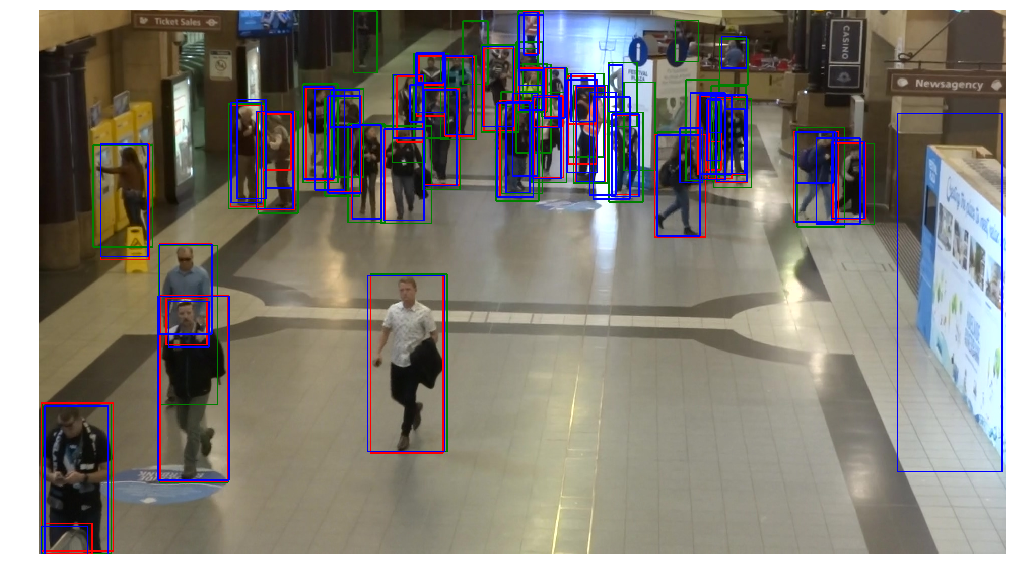

In [29]:
from visualize_all import plotFrame, plotImg

img = plotFrame('faster_rcnn', 'uma', 'MOT20', 'MOT20-02', 20)

plotImg(img)


## Usefull to check correlations

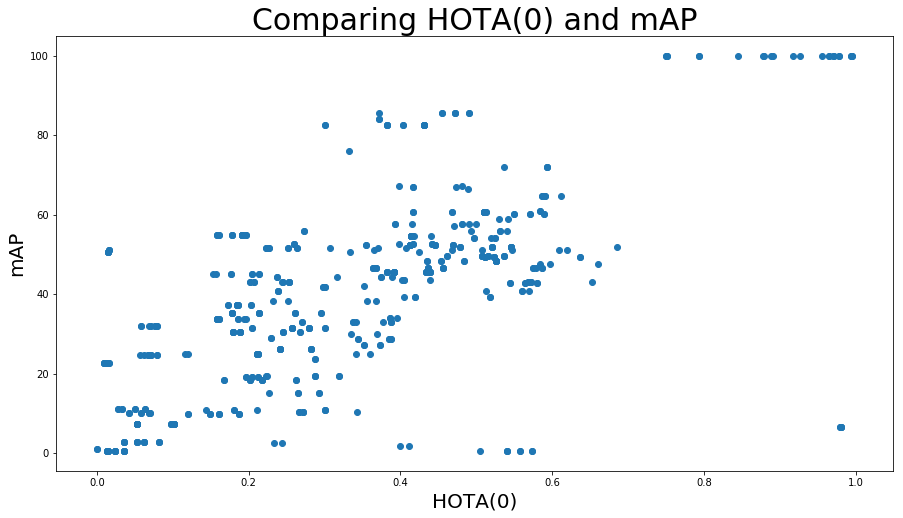

In [30]:
aux.dots_graph(accept, 'HOTA(0)', 'mAP', otype='all')

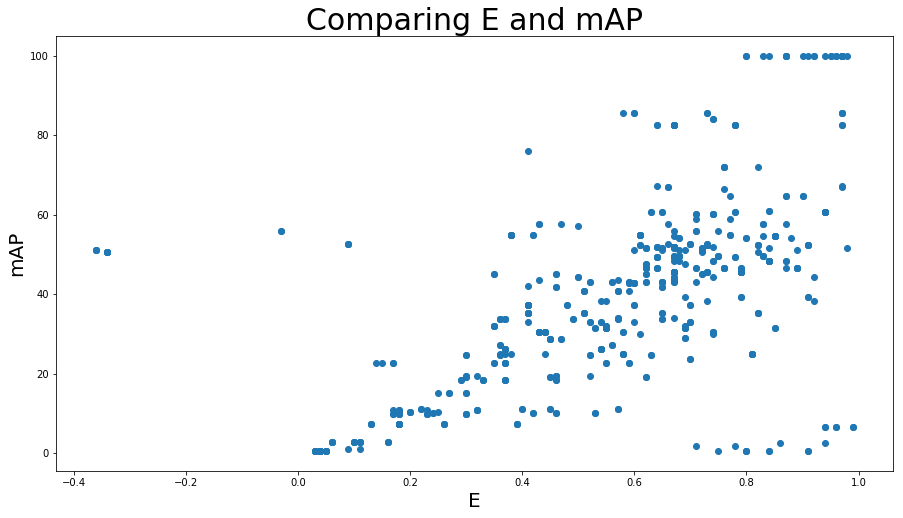

In [31]:
aux.dots_graph(accept, 'E', 'mAP', otype='all')

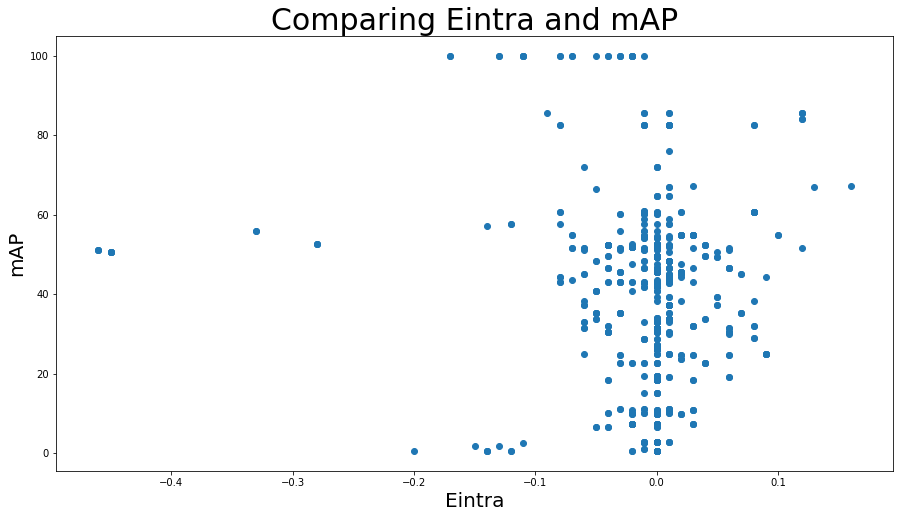

In [32]:
aux.dots_graph(accept, 'Eintra', 'mAP', otype='all')

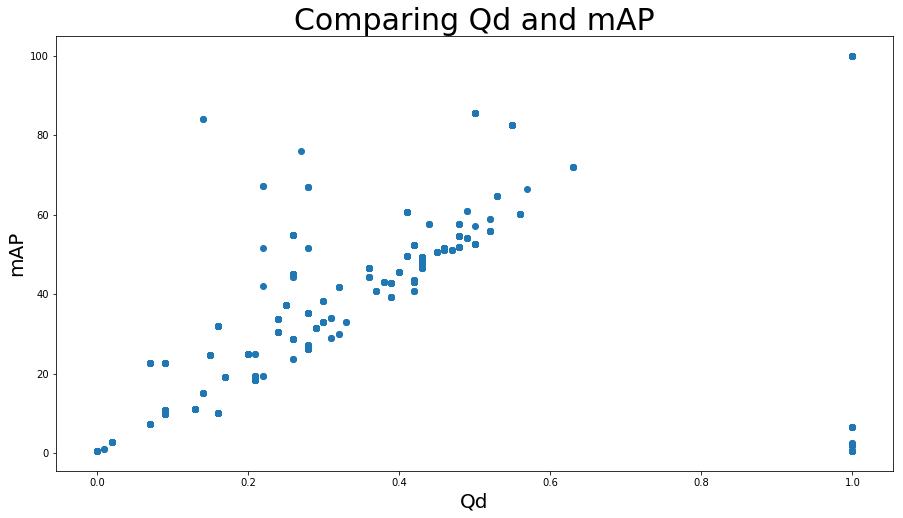

In [33]:
aux.dots_graph(accept, 'Qd', 'mAP', otype='all')

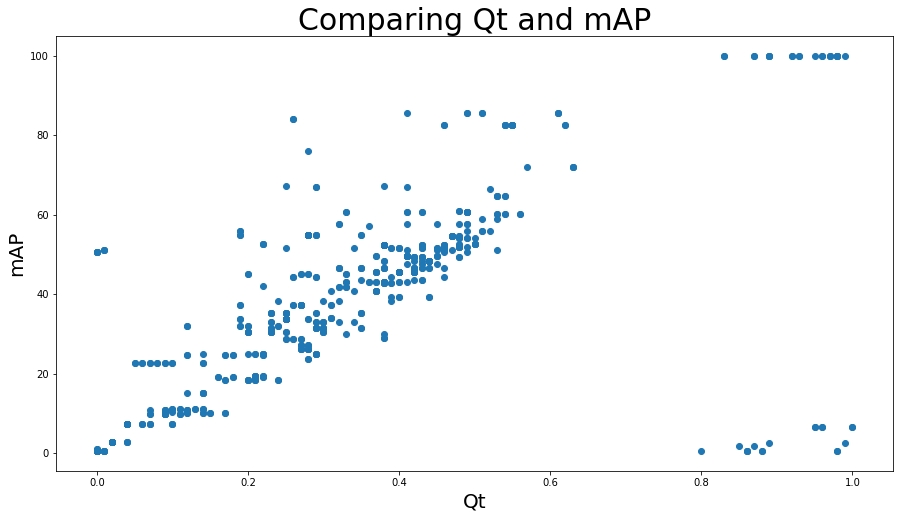

In [34]:
aux.dots_graph(accept, 'Qt', 'mAP', otype='all')

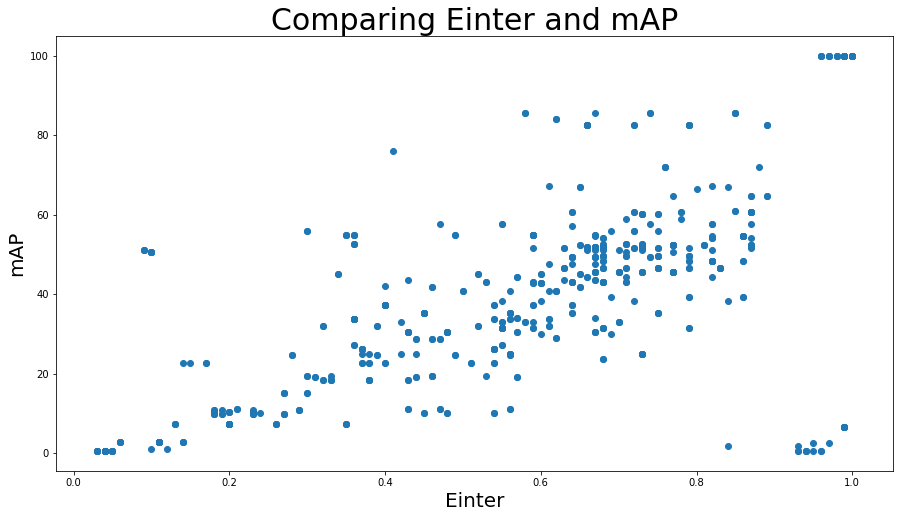

In [35]:
aux.dots_graph(accept, 'Einter', 'mAP', otype='all')

## Useful to study analysis of metrics.

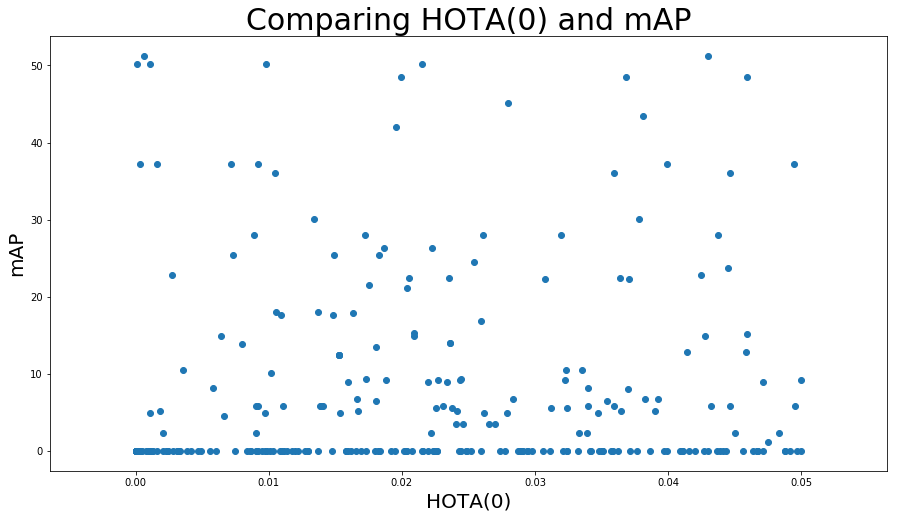

In [36]:
aux.dots_graph(accept, 'HOTA(0)', 'mAP', otype='diff')

## Histogram

Study of how the new metric performs.

In [37]:
# Some hyper parameters
n_bins = 20

# Update matplotlib fontsize
matplotlib.rcParams.update({'font.size': 16})

intra = anly.load_histogram('intra.csv')
Qd = anly.load_histogram('Qd.csv')
Qt = anly.load_histogram('Qt.csv')
Id = anly.load_histogram('Id.csv')
Nd = anly.load_histogram('Nd.csv')
It = anly.load_histogram('It.csv')
Nt = anly.load_histogram('Nt.csv')


inter = anly.load_histogram('inter.csv')
Y = anly.load_histogram('Y.csv')
C = anly.load_histogram('C.csv')
IDSW = anly.load_histogram('IDSW.csv')

### Intra-frame complexity

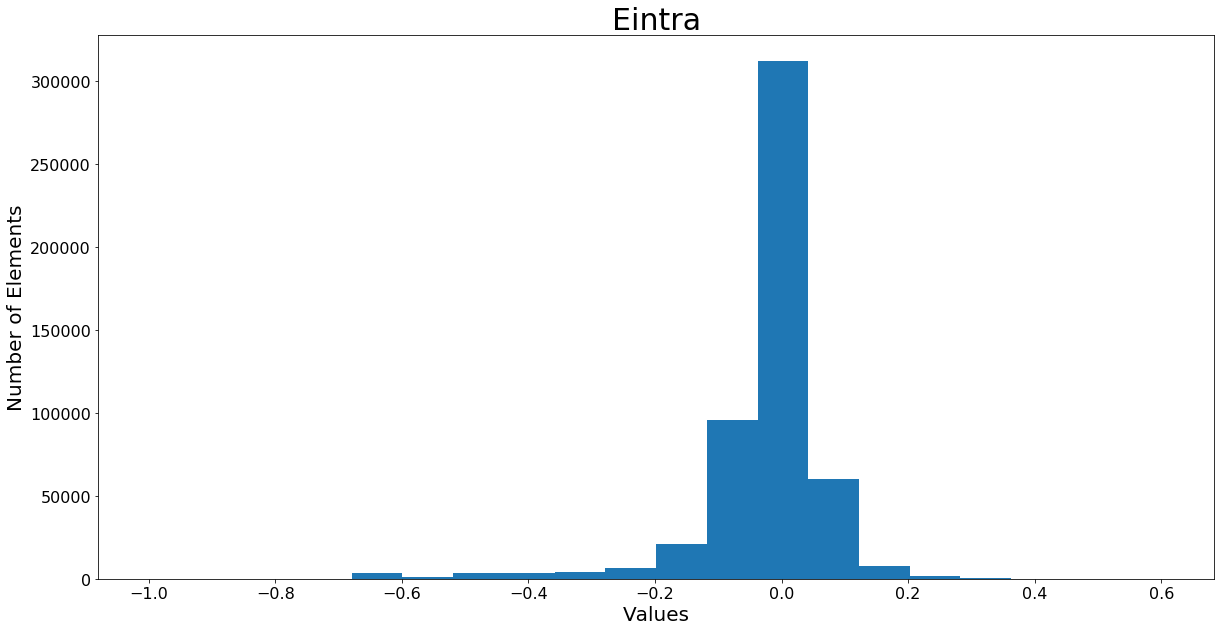

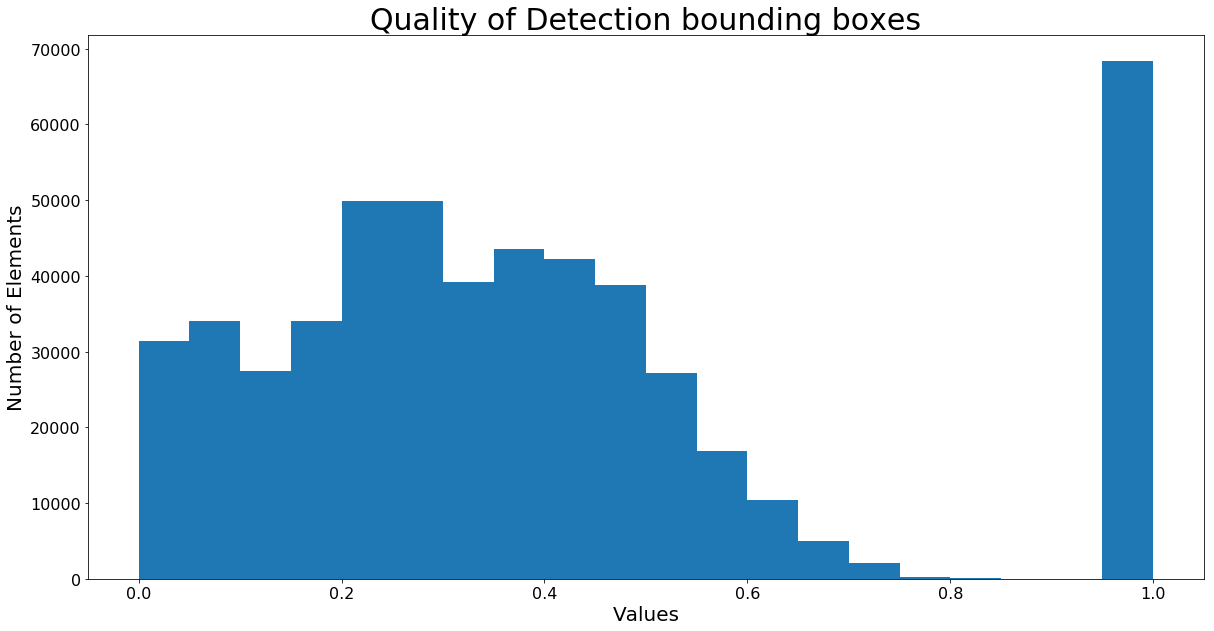

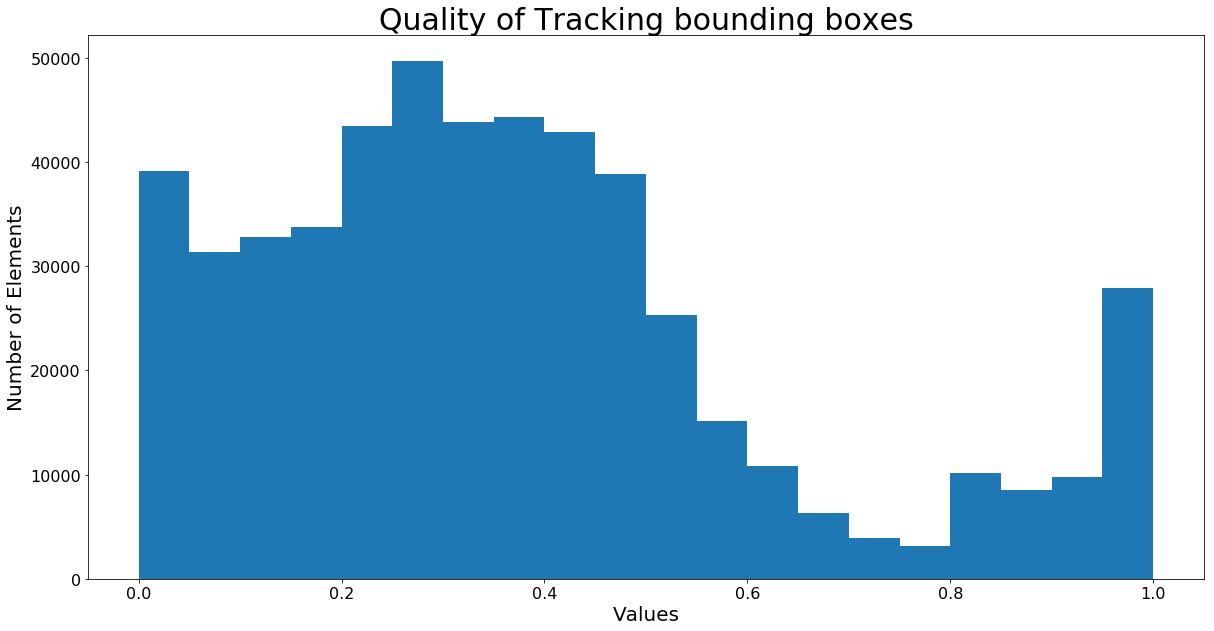

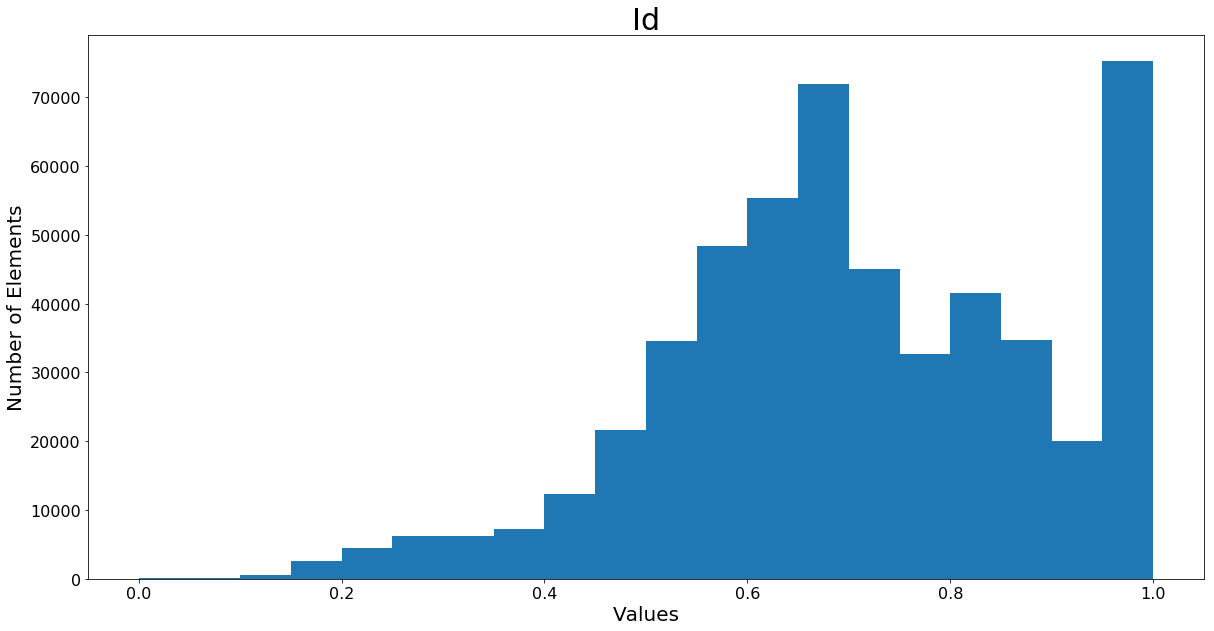

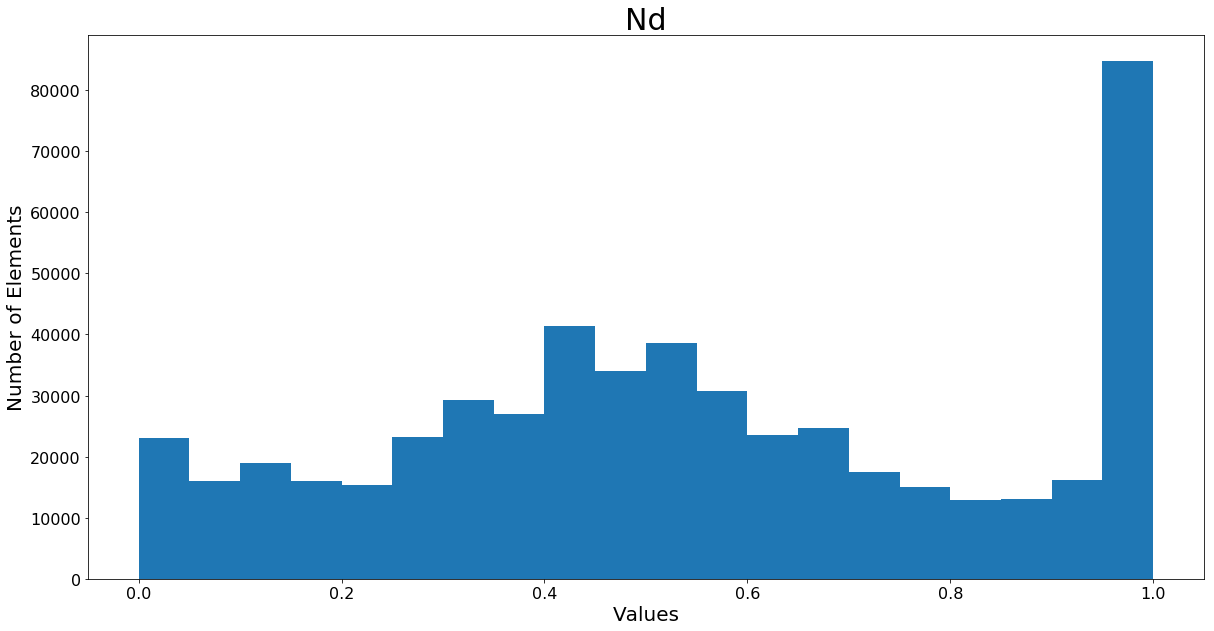

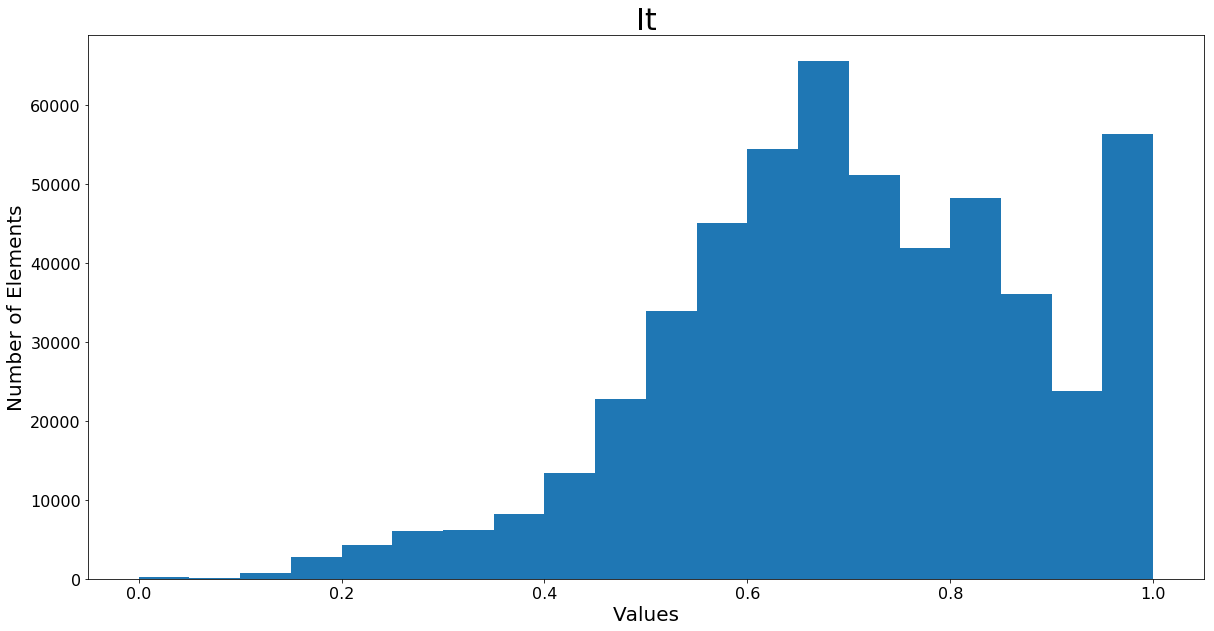

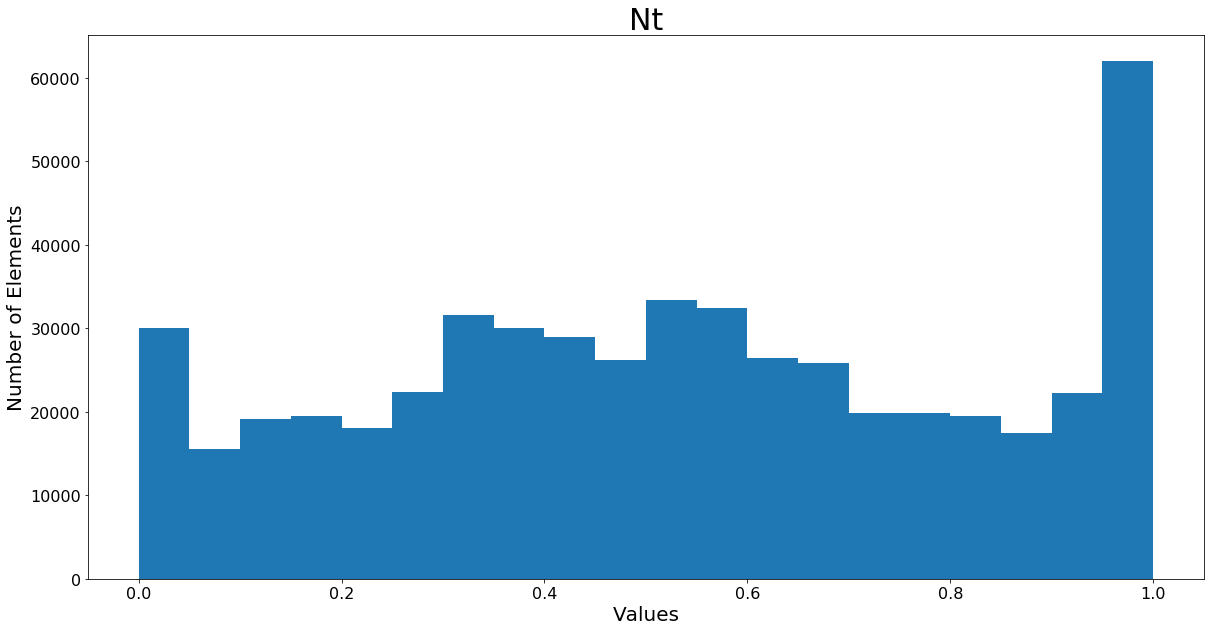

In [38]:
aux.plot_histogram(intra, n_bins, "Eintra")
aux.plot_histogram(Qd, n_bins, "Quality of Detection bounding boxes")
aux.plot_histogram(Qt, n_bins, "Quality of Tracking bounding boxes")
aux.plot_histogram(Id, n_bins, "Id")
aux.plot_histogram(Nd, n_bins, "Nd")
aux.plot_histogram(It, n_bins, "It")
aux.plot_histogram(Nt, n_bins, "Nt")

### Inter-frame complexity

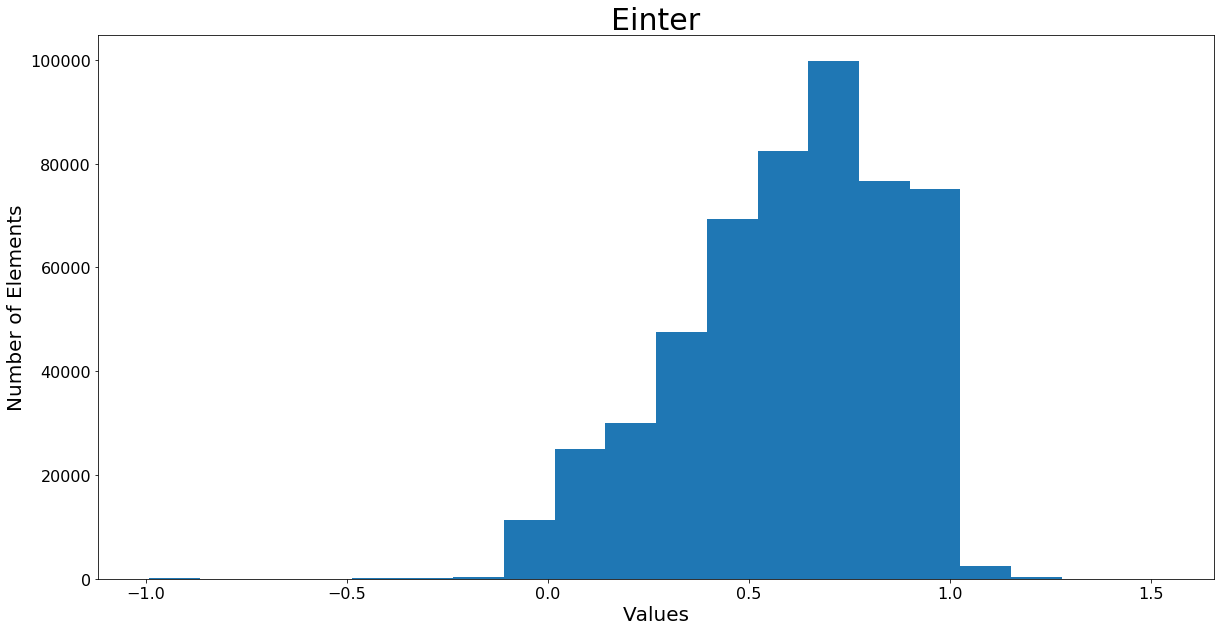

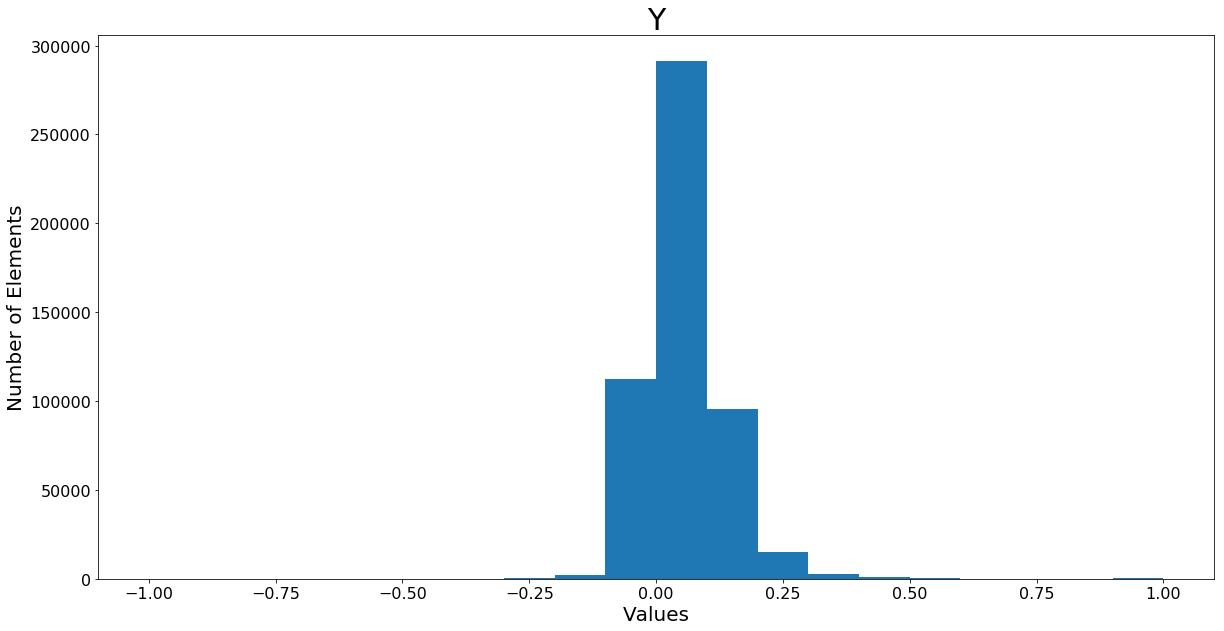

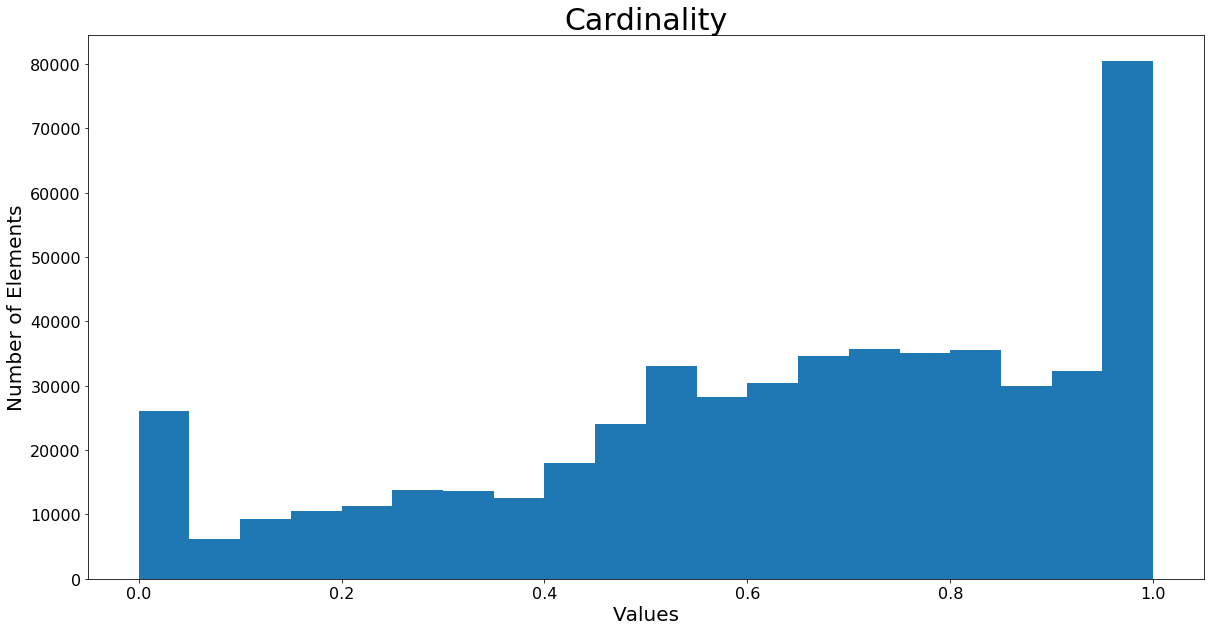

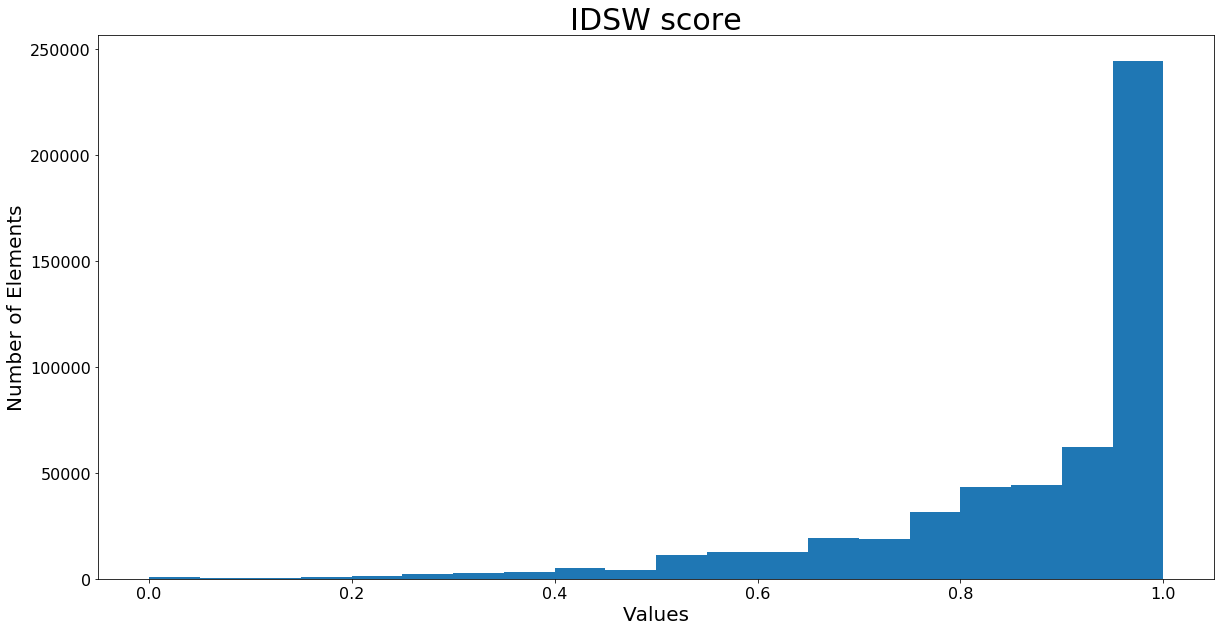

In [39]:
aux.plot_histogram(inter, n_bins, "Einter")
aux.plot_histogram(Y, n_bins, "Y")
aux.plot_histogram(C, n_bins, "Cardinality")
aux.plot_histogram(IDSW, n_bins, "IDSW score")